In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
auto = pd.read_csv('Automobile_data.csv')
auto.head(10)

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   
5          2                 ?         audi       gas        std          two   
6          1               158         audi       gas        std         four   
7          1                 ?         audi       gas        std         four   
8          1               158         audi       gas      turbo         four   
9          0                 ?         audi       gas      turbo          two   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   
5        sedan          fwd           front        99.8  ...          136   
6        sedan          fwd           front       105.8  ...          136   
7        wagon          fwd           front       105.8  ...          136   
8        sedan          fwd           front       105.8  ...          131   
9    hatchback          4wd           front        99.5  ...          131   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19     3.4              10.0        102      5500       24   
4         mpfi  3.19     3.4               8.0        115      5500       18   
5         mpfi  3.19     3.4               8.5        110      5500       19   
6         mpfi  3.19     3.4               8.5        110      5500       19   
7         mpfi  3.19     3.4               8.5        110      5500       19   
8         mpfi  3.13     3.4               8.3        140      5500       17   
9         mpfi  3.13     3.4               7.0        160      5500       16   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  
5          25  15250  
6          25  17710  
7          25  18920  
8          20  23875  
9          22      ?  

[10 rows x 26 columns]

In [3]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
auto.replace('?', np.nan, inplace =True)

In [5]:
auto.duplicated().sum()

0

In [6]:
auto.isnull().sum() - _

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [7]:
auto['price'] = auto['price'].apply(float)
auto['peak-rpm'] = auto['peak-rpm'].apply(float)
auto['horsepower'] = auto['horsepower'].apply(float)

In [8]:
print('Fuel Types       : ', auto['fuel-type'].unique())
print('Body Styles      : ', auto['body-style'].unique())
print('Drive Wheels     : ', auto['drive-wheels'].unique())
print('Fuel System      : ', auto['fuel-system'].unique())
print('Engine Type      : ', auto['engine-type'].unique())
print('Aspiration       : ', auto['aspiration'].unique())
print('No. of Cylinders : ', auto['num-of-cylinders'].unique())

Fuel Types       :  ['gas' 'diesel']
Body Styles      :  ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Drive Wheels     :  ['rwd' 'fwd' '4wd']
Fuel System      :  ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
Engine Type      :  ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Aspiration       :  ['std' 'turbo']
No. of Cylinders :  ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [9]:
# Creating a new column
auto['comb_mpg'] = (auto['city-mpg'] + auto['highway-mpg']) / 2
auto.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               NaN  alfa-romero       gas        std          two   
1          3               NaN  alfa-romero       gas        std          two   
2          1               NaN  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  fuel-system  \
0  convertible          rwd           front        88.6  ...         mpfi   
1  convertible          rwd           front        88.6  ...         mpfi   
2    hatchback          rwd           front        94.5  ...         mpfi   
3        sedan          fwd           front        99.8  ...         mpfi   
4        sedan          4wd           front        99.4  ...         mpfi   

   bore  stroke  compression-ratio horsepower peak-rpm  city-mpg highway-mpg  \
0  3.47    2.68                9.0      111.0   5000.0        21          27   
1  3.47    2.68                9.0      111.0   5000.0        21          27   
2  2.68    3.47                9.0      154.0   5000.0        19          26   
3  3.19     3.4               10.0      102.0   5500.0        24          30   
4  3.19     3.4                8.0      115.0   5500.0        18          22   

     price comb_mpg  
0  13495.0     24.0  
1  16500.0     24.0  
2  16500.0     22.5  
3  13950.0     27.0  
4  17450.0     20.0  

[5 rows x 27 columns]

------
------
## Creating a visualization using Seaborn

<AxesSubplot:xlabel='horsepower', ylabel='comb_mpg'>

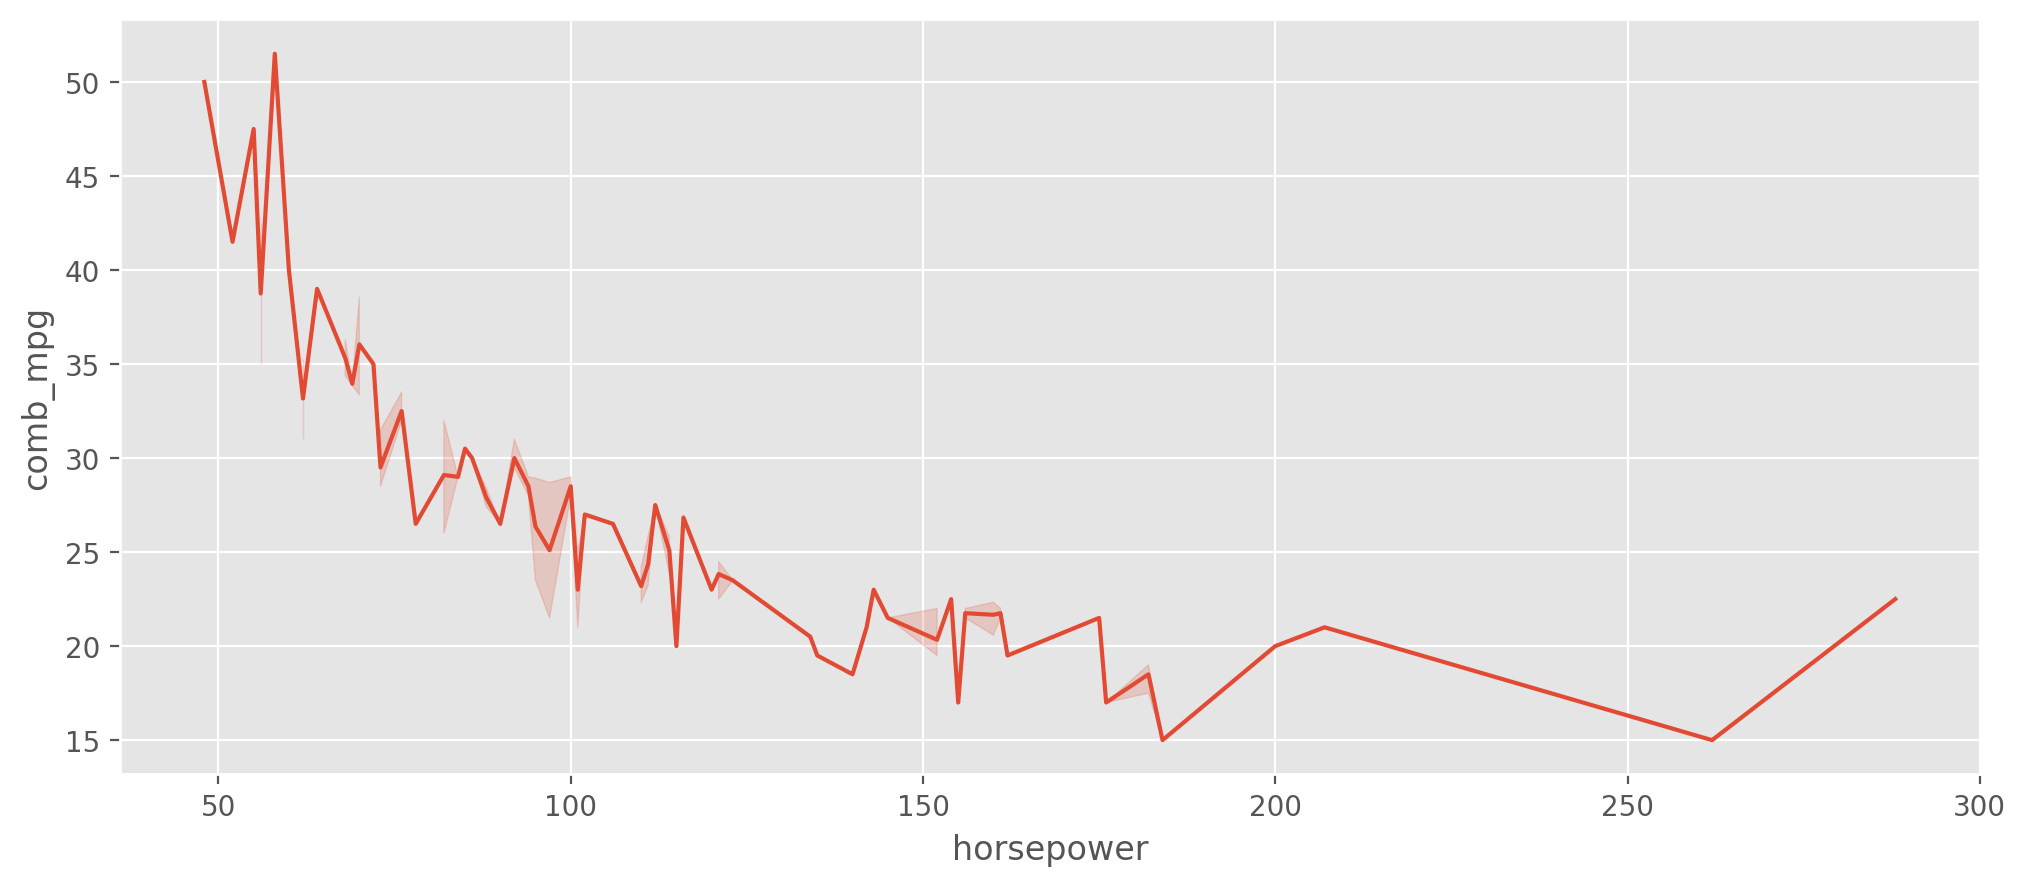

In [10]:
plt.figure(figsize = (12,5), dpi = 200)
sns.lineplot(auto['horsepower'], auto['comb_mpg'])

Text(0, 0.5, 'Mileadge (Combined in MPG)')

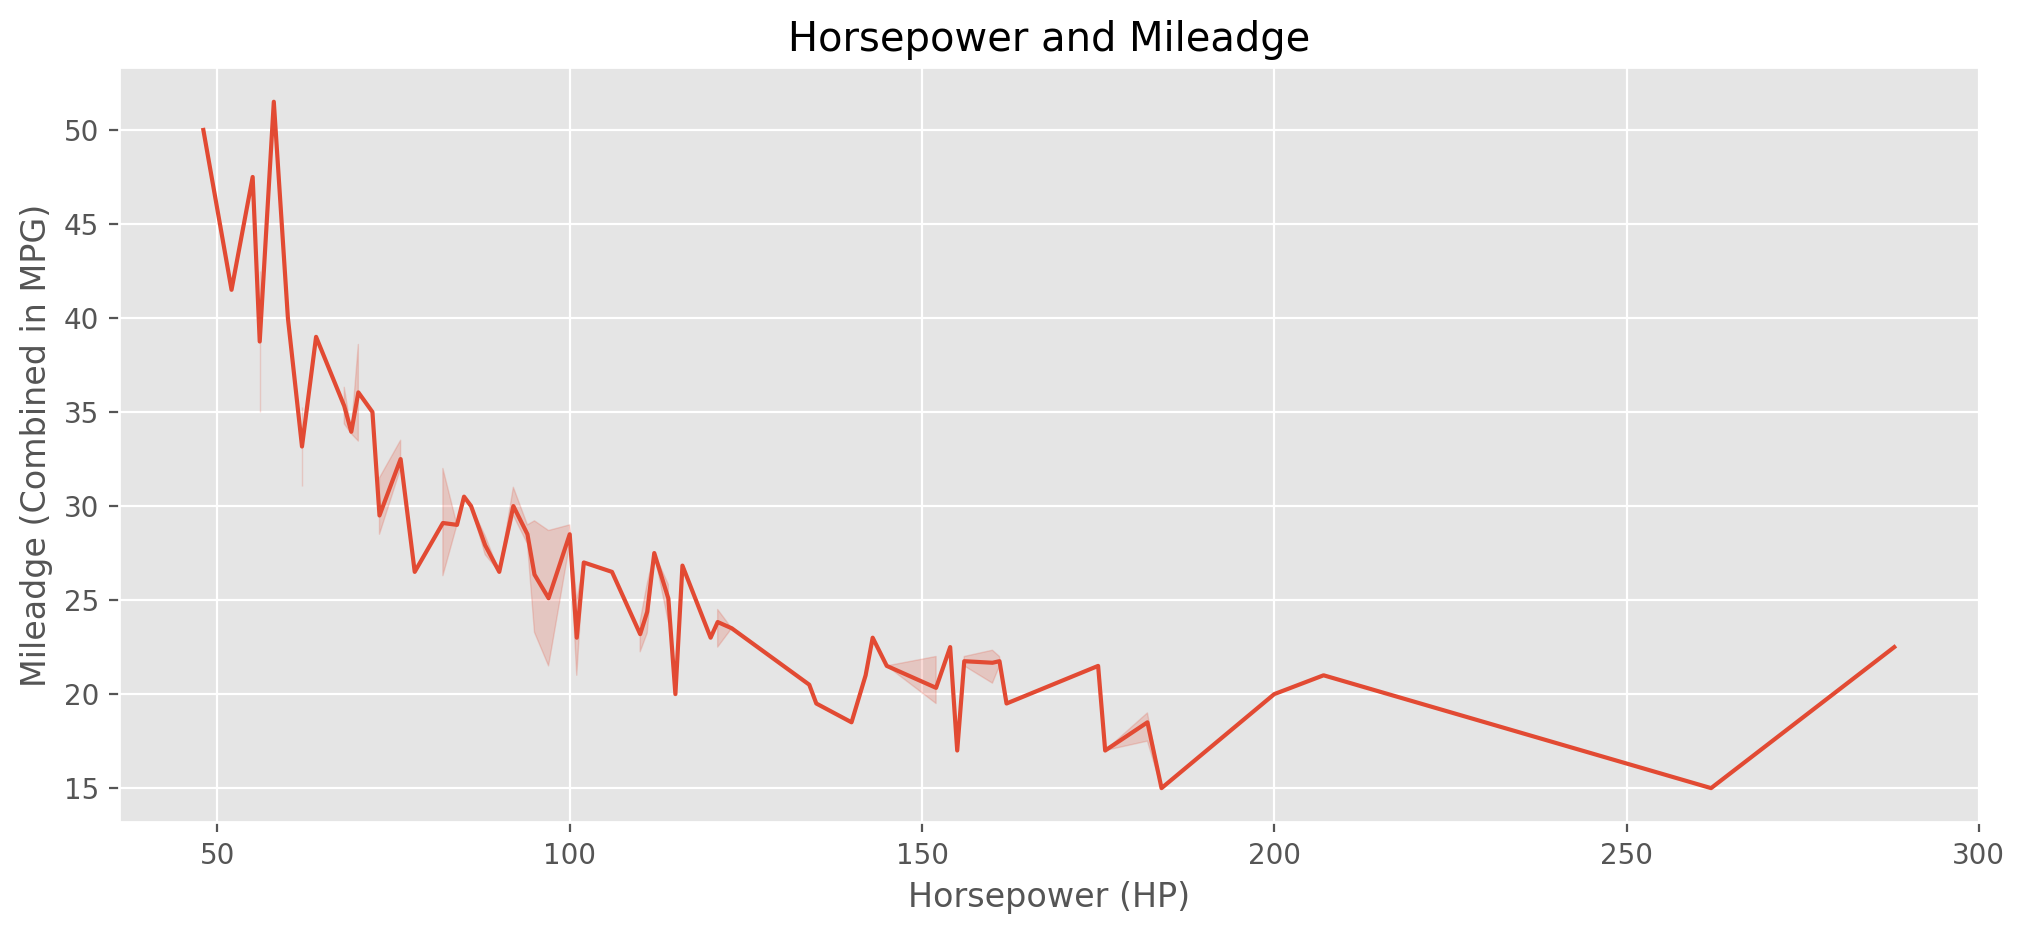

In [11]:
plt.figure(figsize = (12,5), dpi = 200)
sns.lineplot('horsepower', 'comb_mpg', data = auto)

plt.title('Horsepower and Mileadge')
plt.xlabel('Horsepower (HP)')
plt.ylabel('Mileadge (Combined in MPG)')

---
---

## lineplot
- Creates a linechart
- Used in case of two numerical features

<AxesSubplot:xlabel='horsepower', ylabel='comb_mpg'>

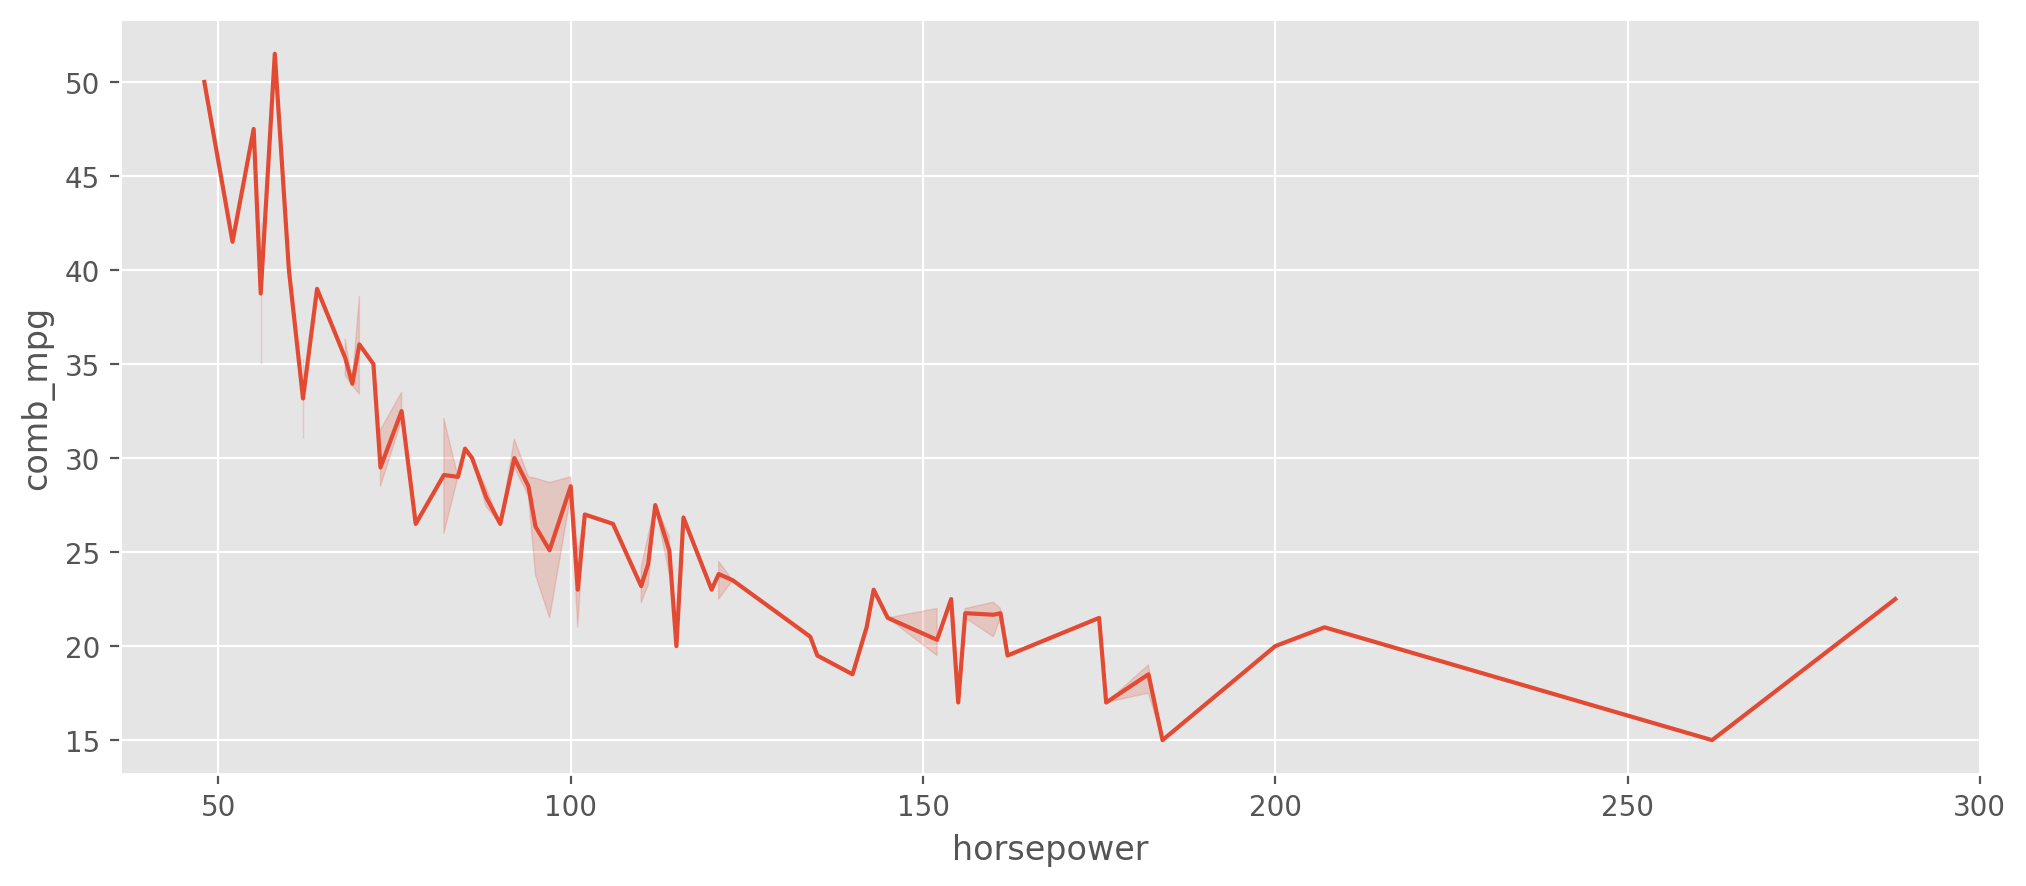

In [12]:
plt.figure(figsize = (12,5), dpi = 200)
sns.lineplot('horsepower', 'comb_mpg', data = auto)

<AxesSubplot:xlabel='curb-weight', ylabel='comb_mpg'>

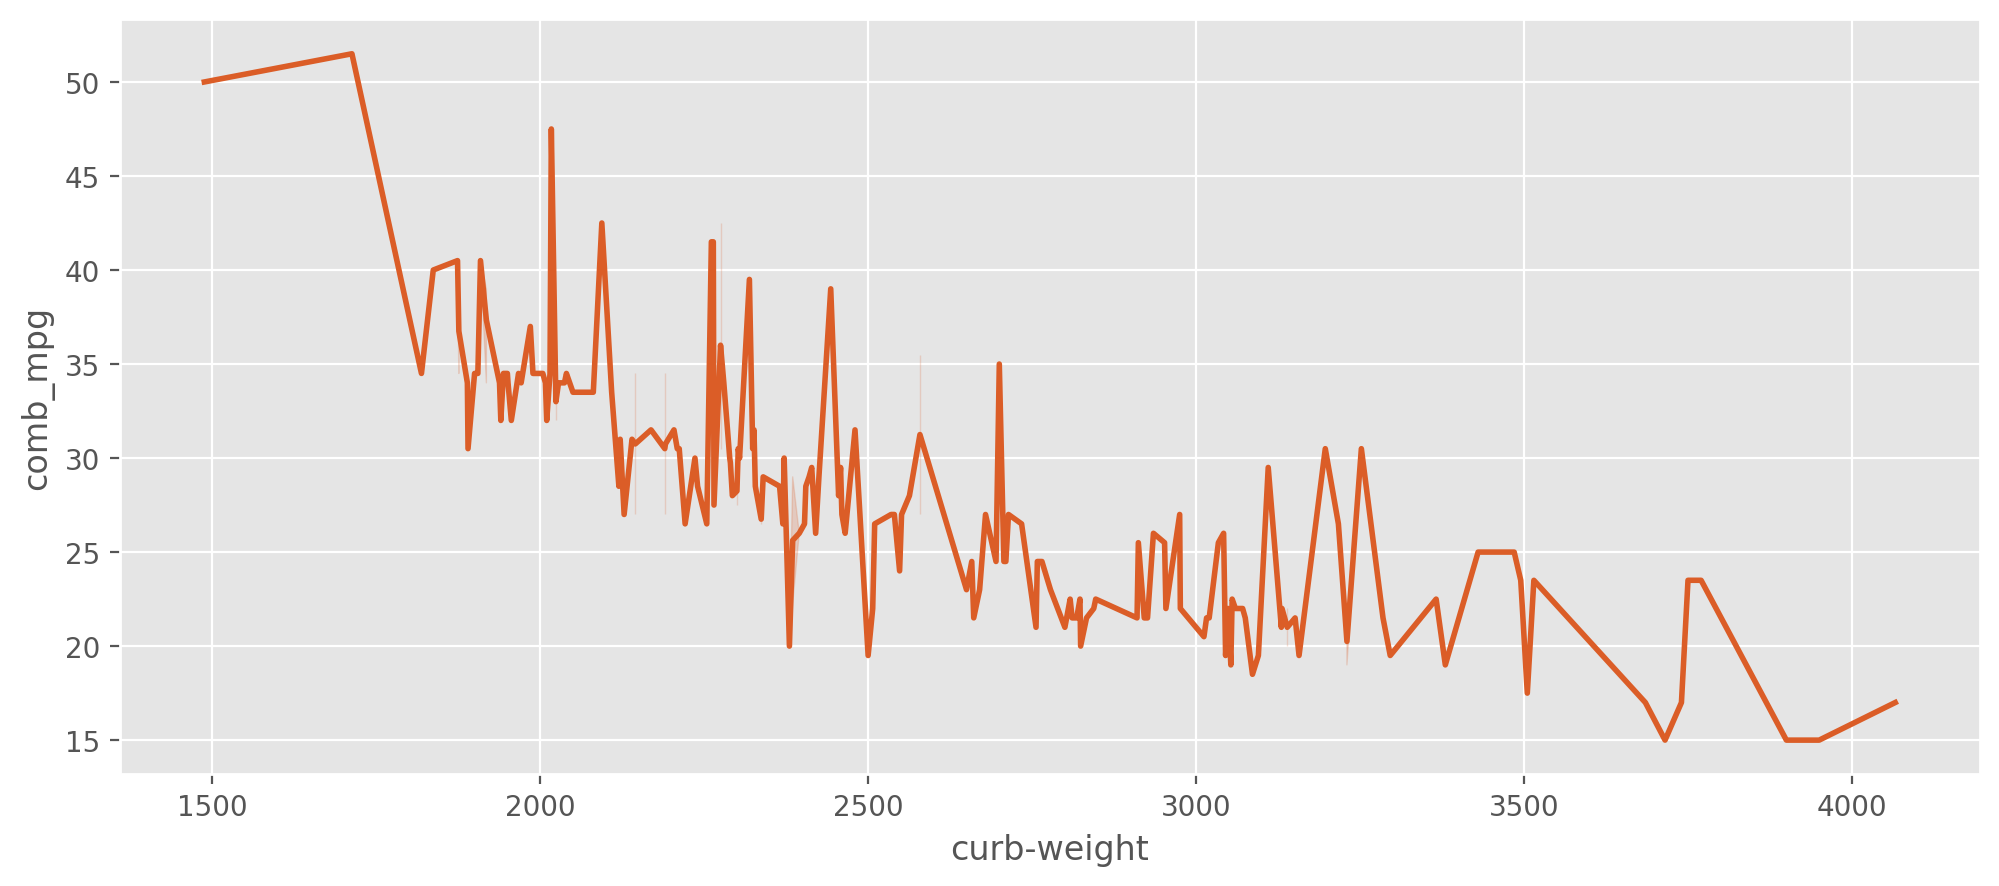

In [13]:
plt.figure(figsize = (12,5), dpi = 200)
sns.lineplot('curb-weight', 'comb_mpg', data = auto, linewidth = 2, color = '#db5d27')

<AxesSubplot:xlabel='curb-weight', ylabel='comb_mpg'>

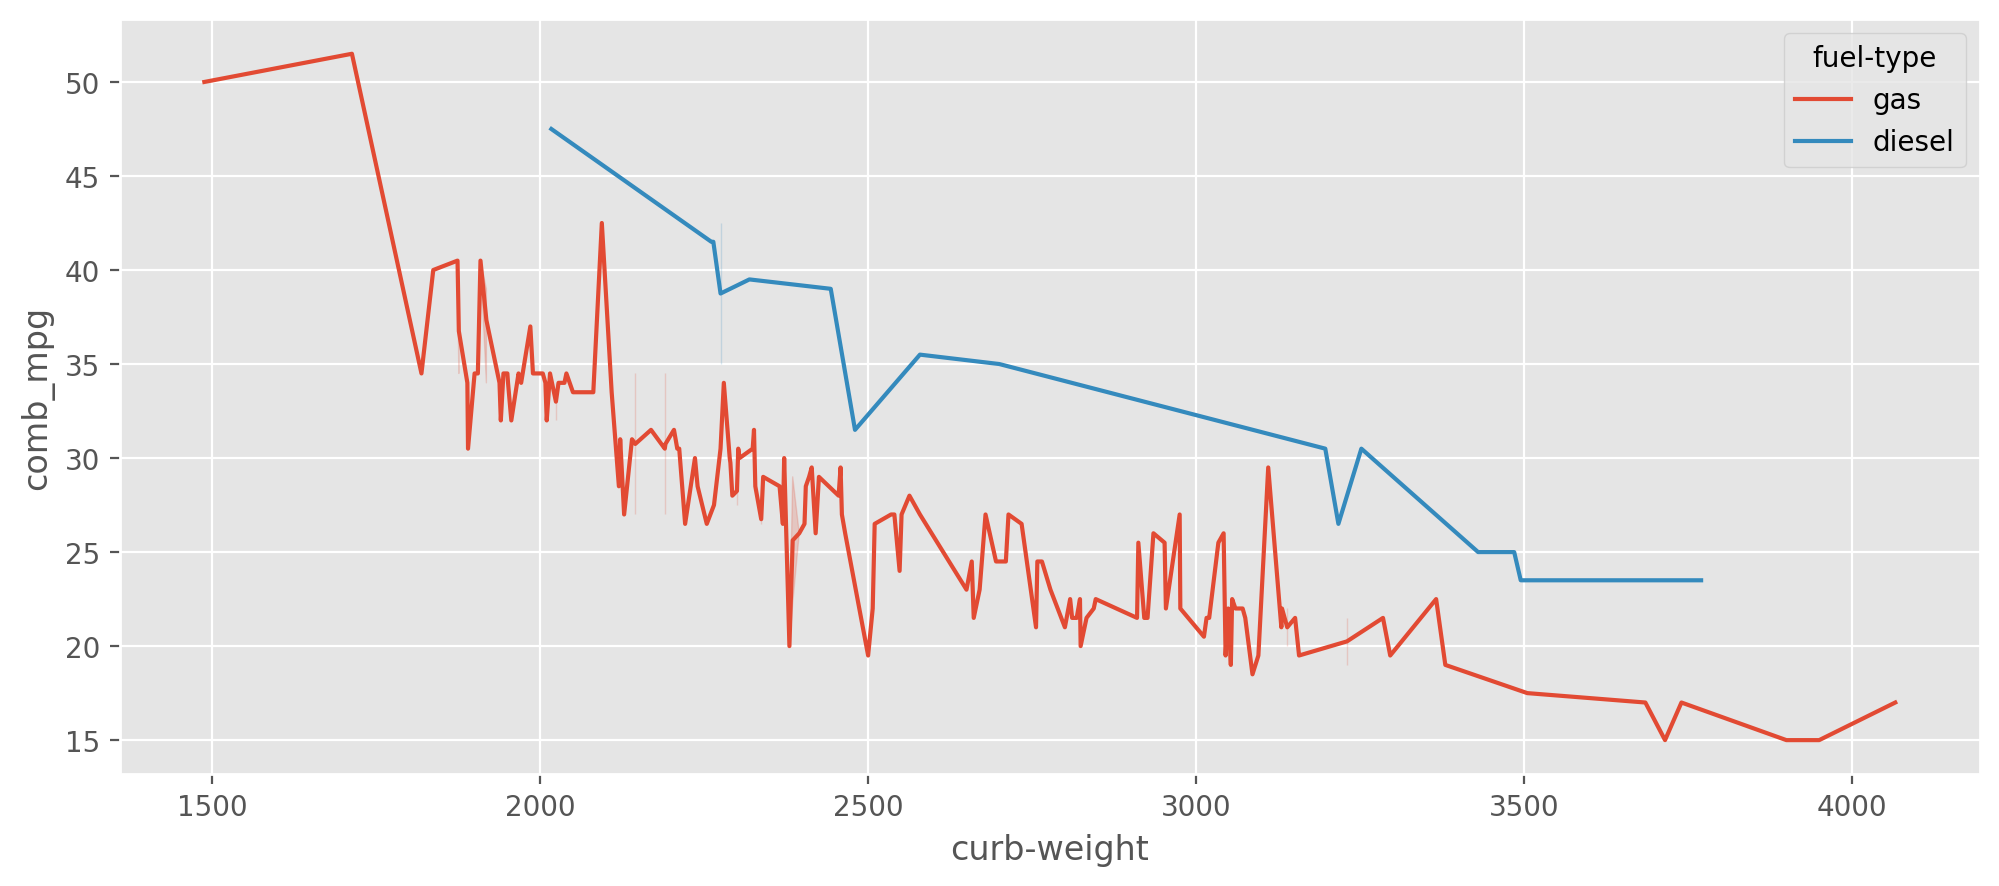

In [14]:
plt.figure(figsize = (12,5), dpi = 200)
sns.lineplot('curb-weight', 'comb_mpg', data = auto, hue = 'fuel-type')  # hue : separate categories based on color

<AxesSubplot:xlabel='curb-weight', ylabel='comb_mpg'>

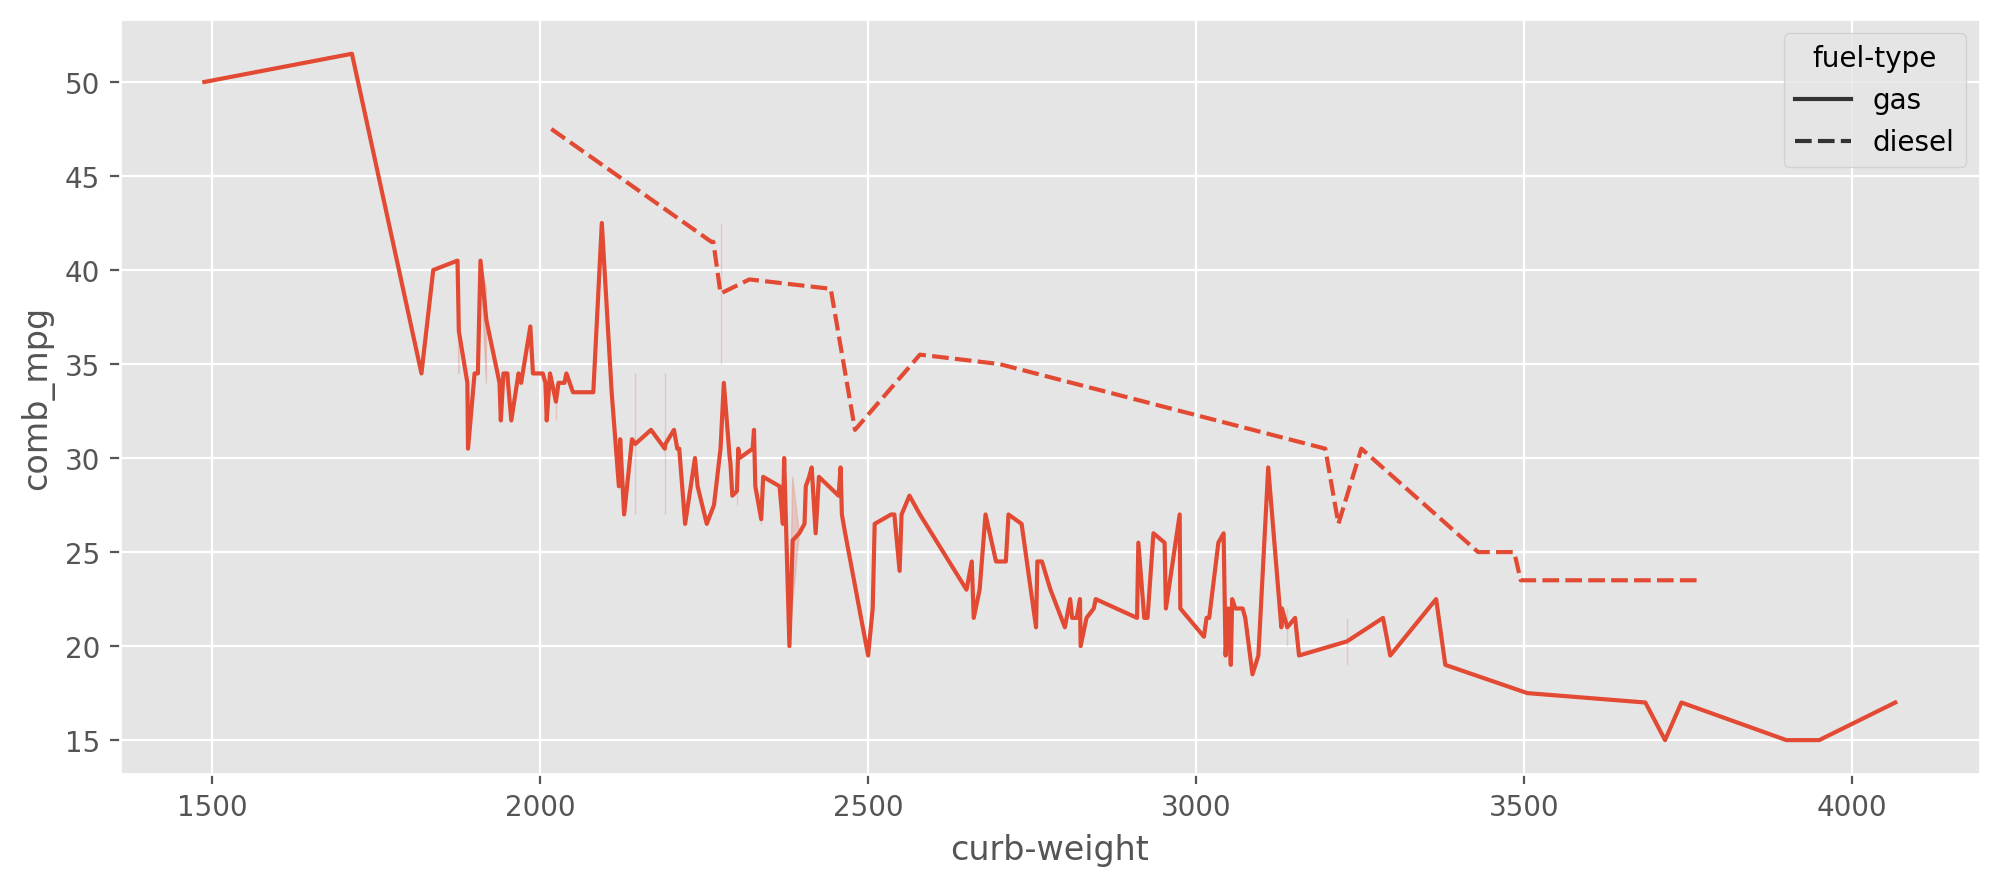

In [15]:
plt.figure(figsize = (12,5), dpi = 200)
sns.lineplot('curb-weight', 'comb_mpg', data = auto, style = 'fuel-type')  # style : separate categories based on style/pattern

<AxesSubplot:xlabel='curb-weight', ylabel='comb_mpg'>

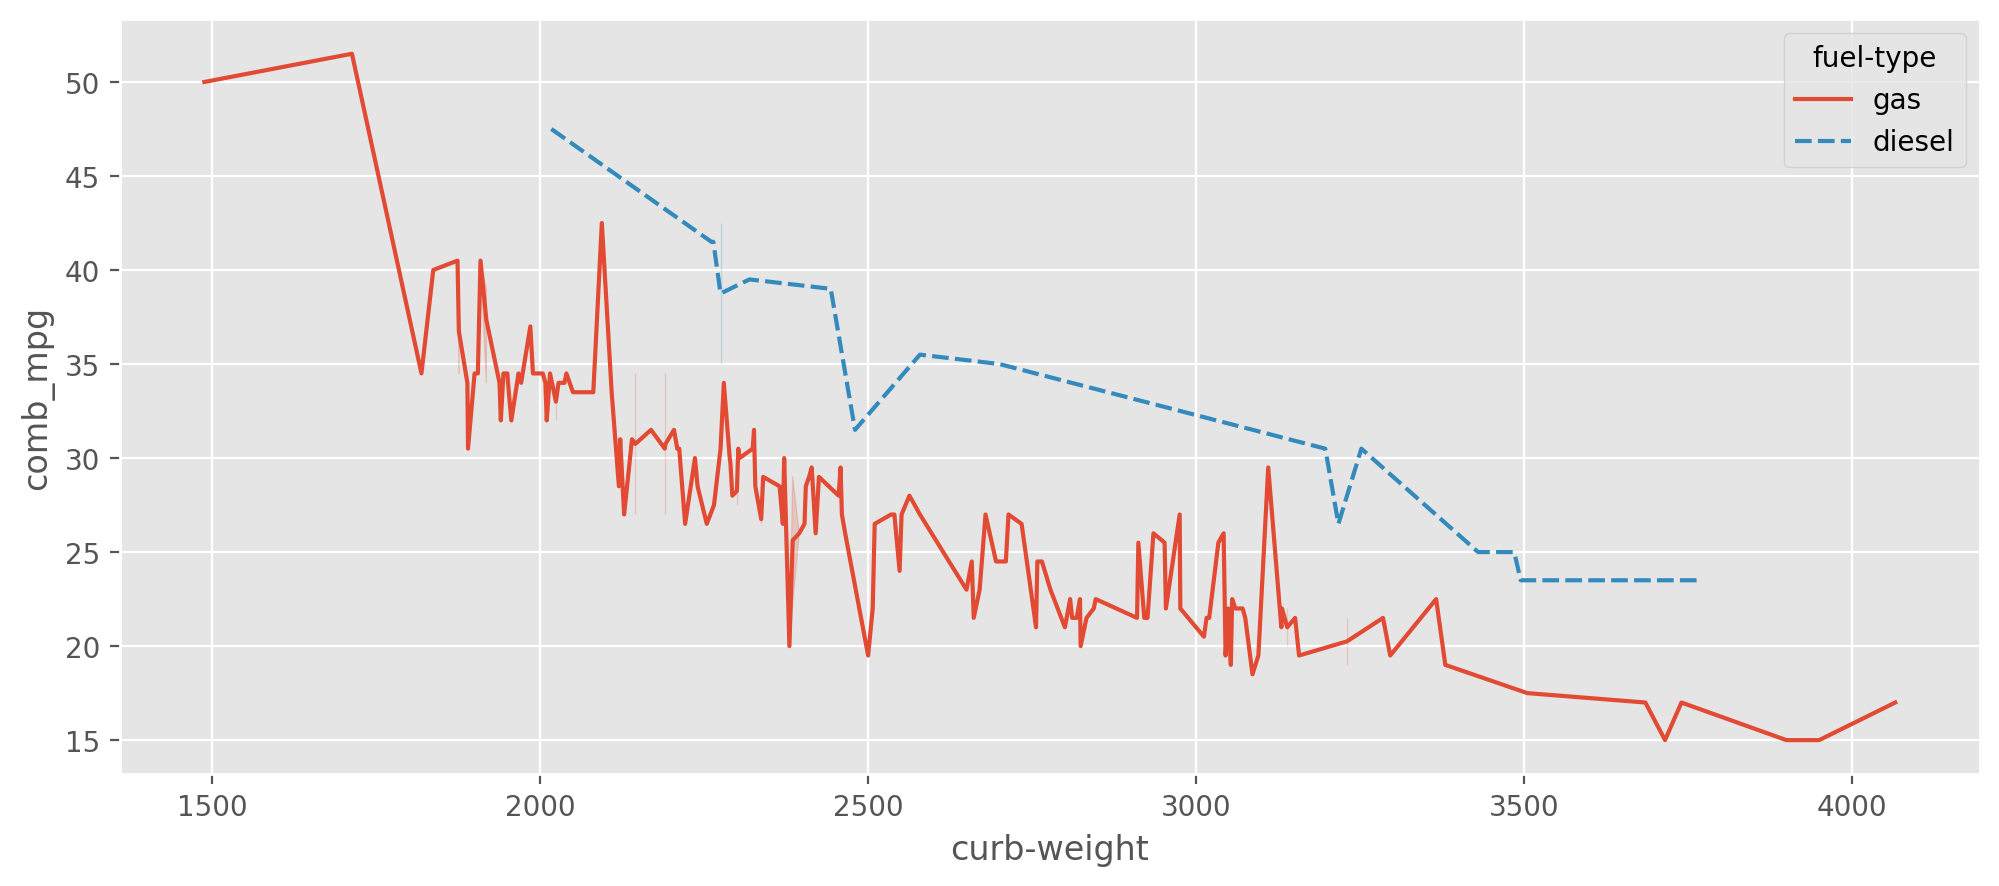

In [16]:
plt.figure(figsize = (12,5), dpi = 200)
sns.lineplot('curb-weight', 'comb_mpg', data = auto, hue = 'fuel-type', style = 'fuel-type')

<AxesSubplot:xlabel='curb-weight', ylabel='comb_mpg'>

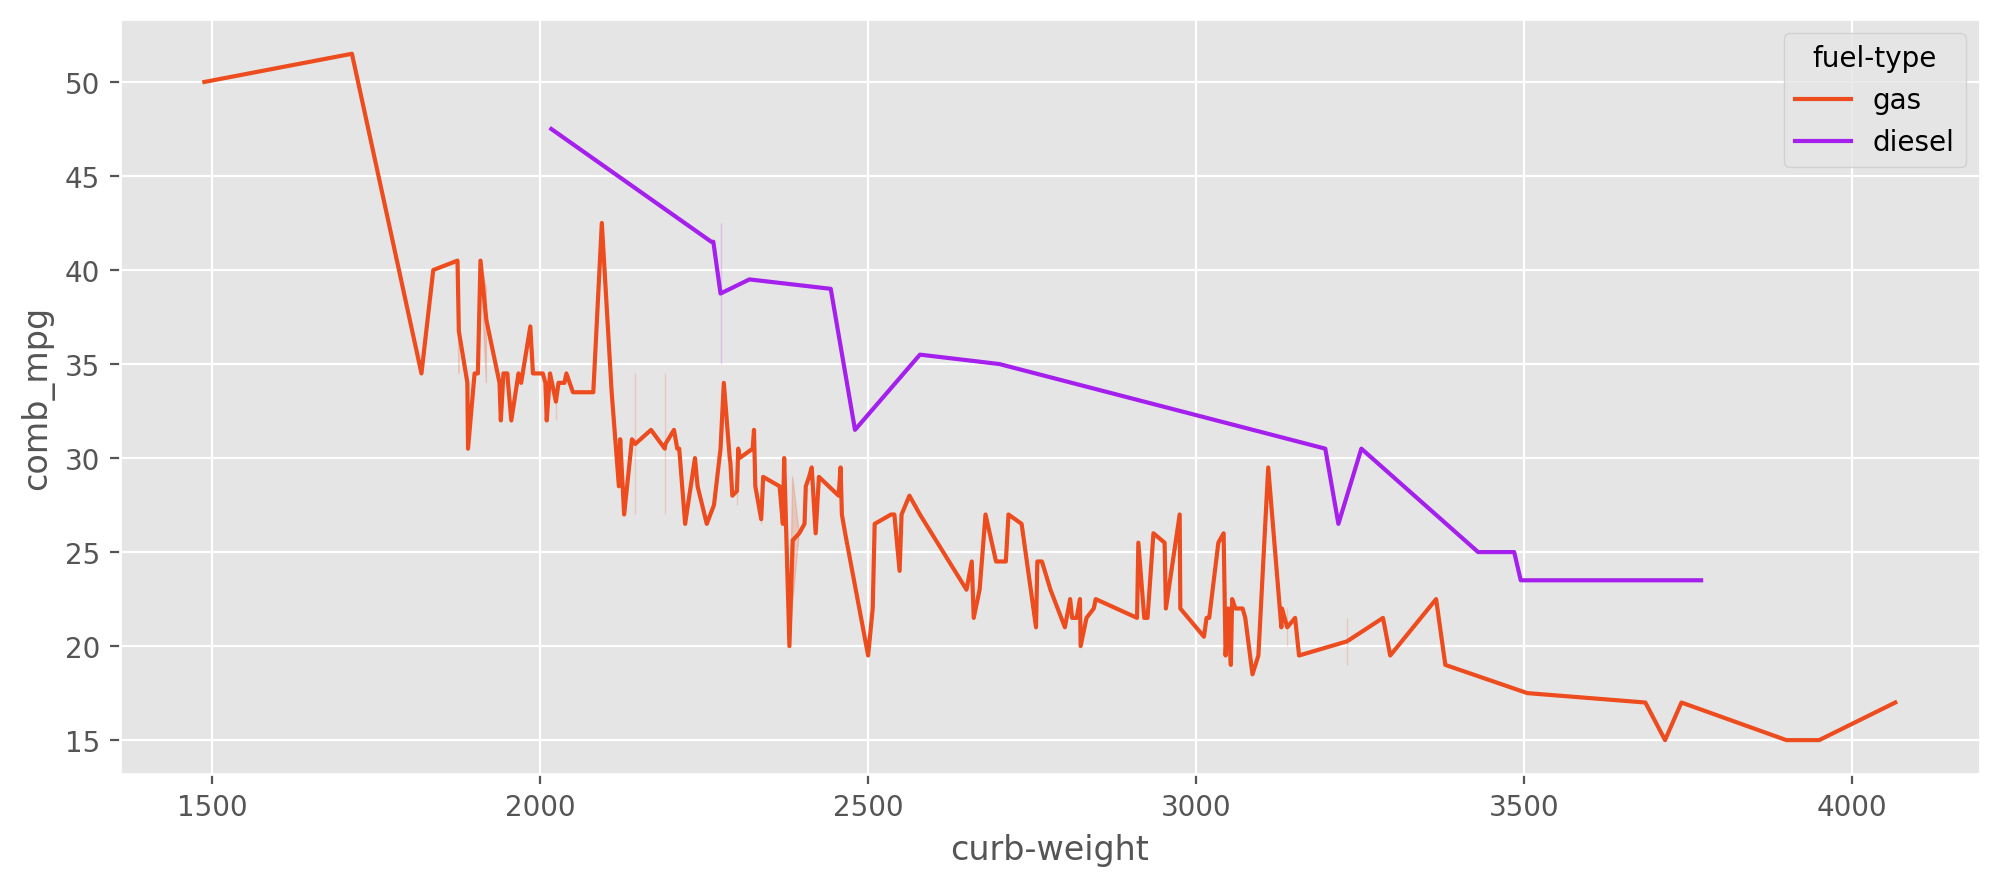

In [17]:
plt.figure(figsize = (12,5), dpi = 200)
sns.lineplot('curb-weight', 'comb_mpg', data = auto, hue = 'fuel-type', palette = ['#ed4c1f', '#a51fed'])

---
## scatterplot
- Creates a scatterplot
- Used in case of two numerical features

<AxesSubplot:xlabel='horsepower', ylabel='comb_mpg'>

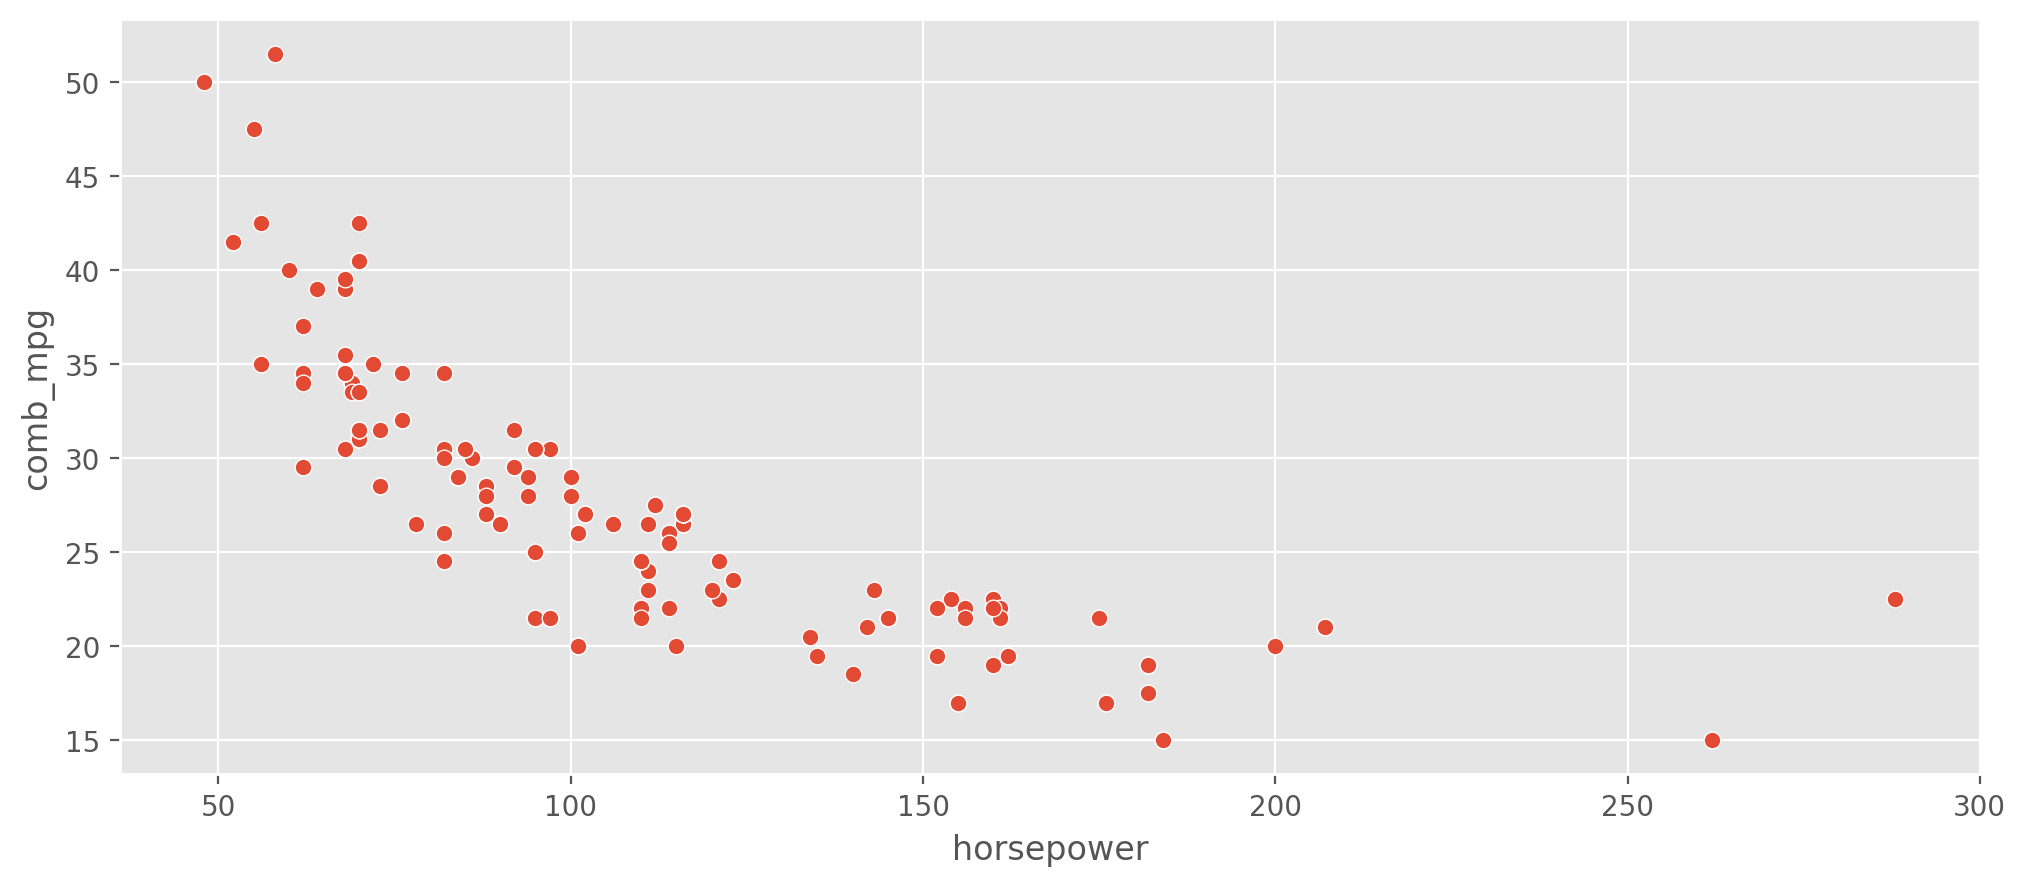

In [18]:
plt.figure(figsize = (12,5), dpi = 200)
sns.scatterplot('horsepower', 'comb_mpg', data = auto)

<AxesSubplot:xlabel='horsepower', ylabel='comb_mpg'>

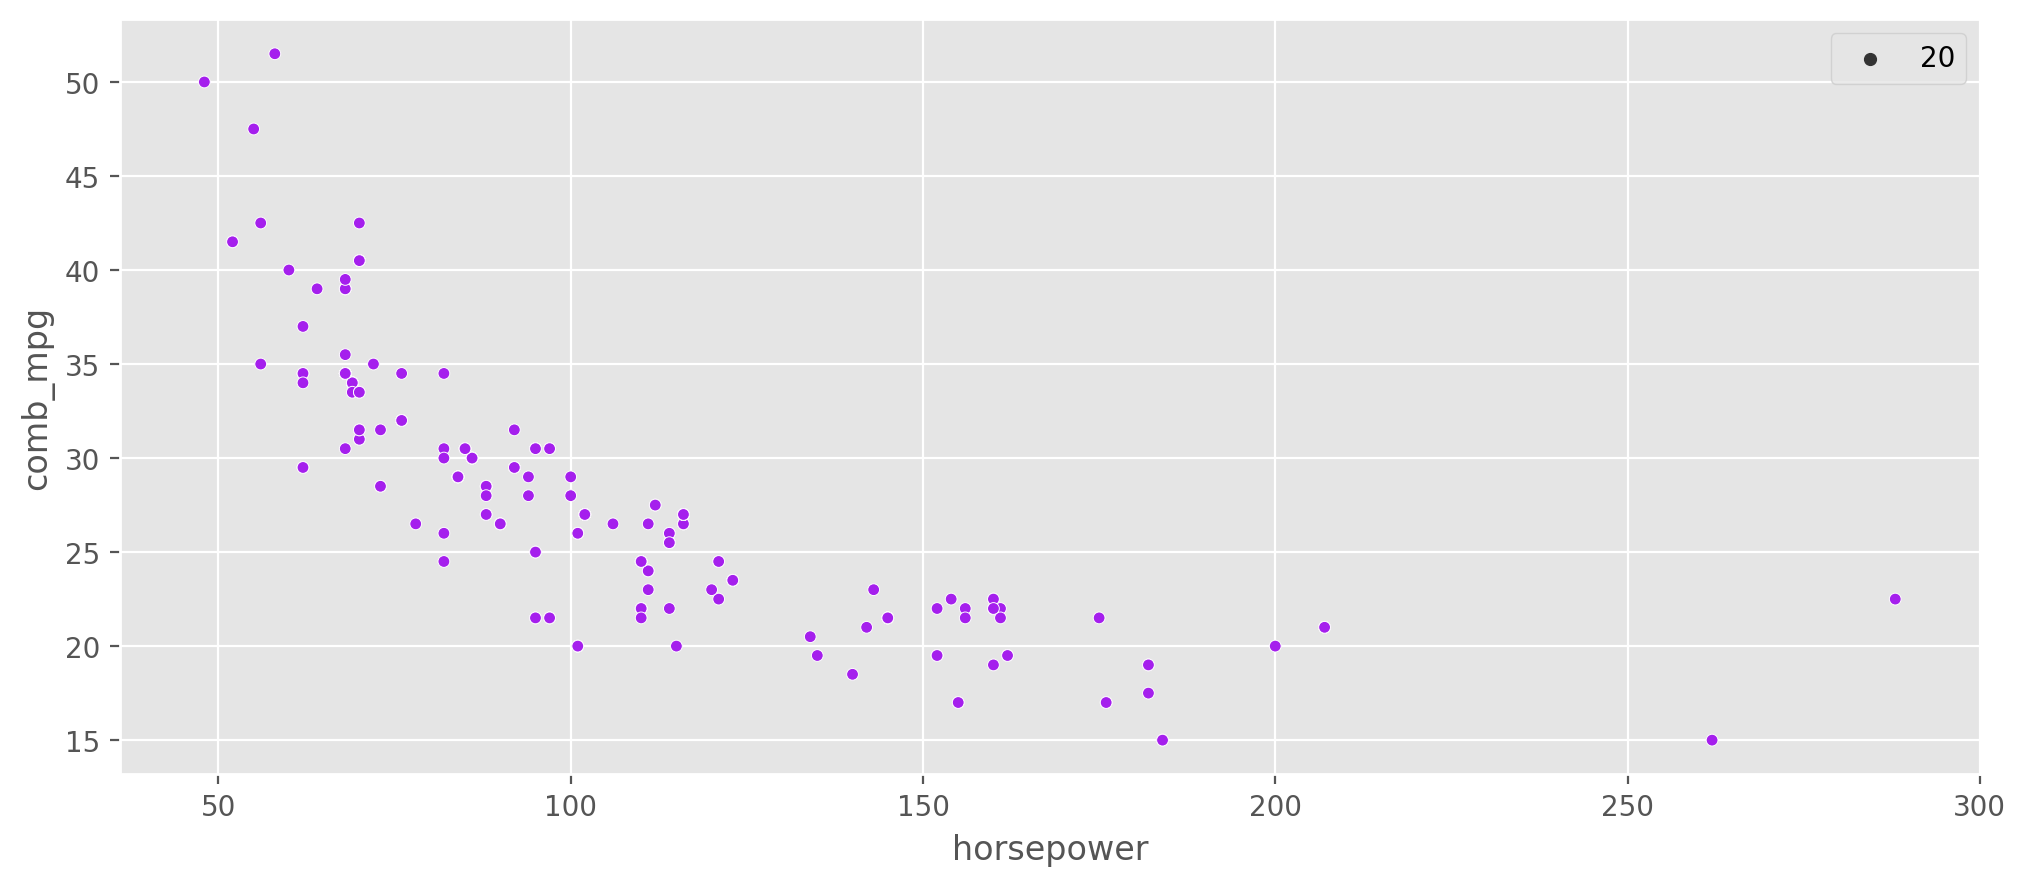

In [19]:
plt.figure(figsize = (12,5), dpi = 200)
sns.scatterplot('horsepower', 'comb_mpg', data = auto, color = '#a51fed', size = 20)

<AxesSubplot:xlabel='horsepower', ylabel='comb_mpg'>

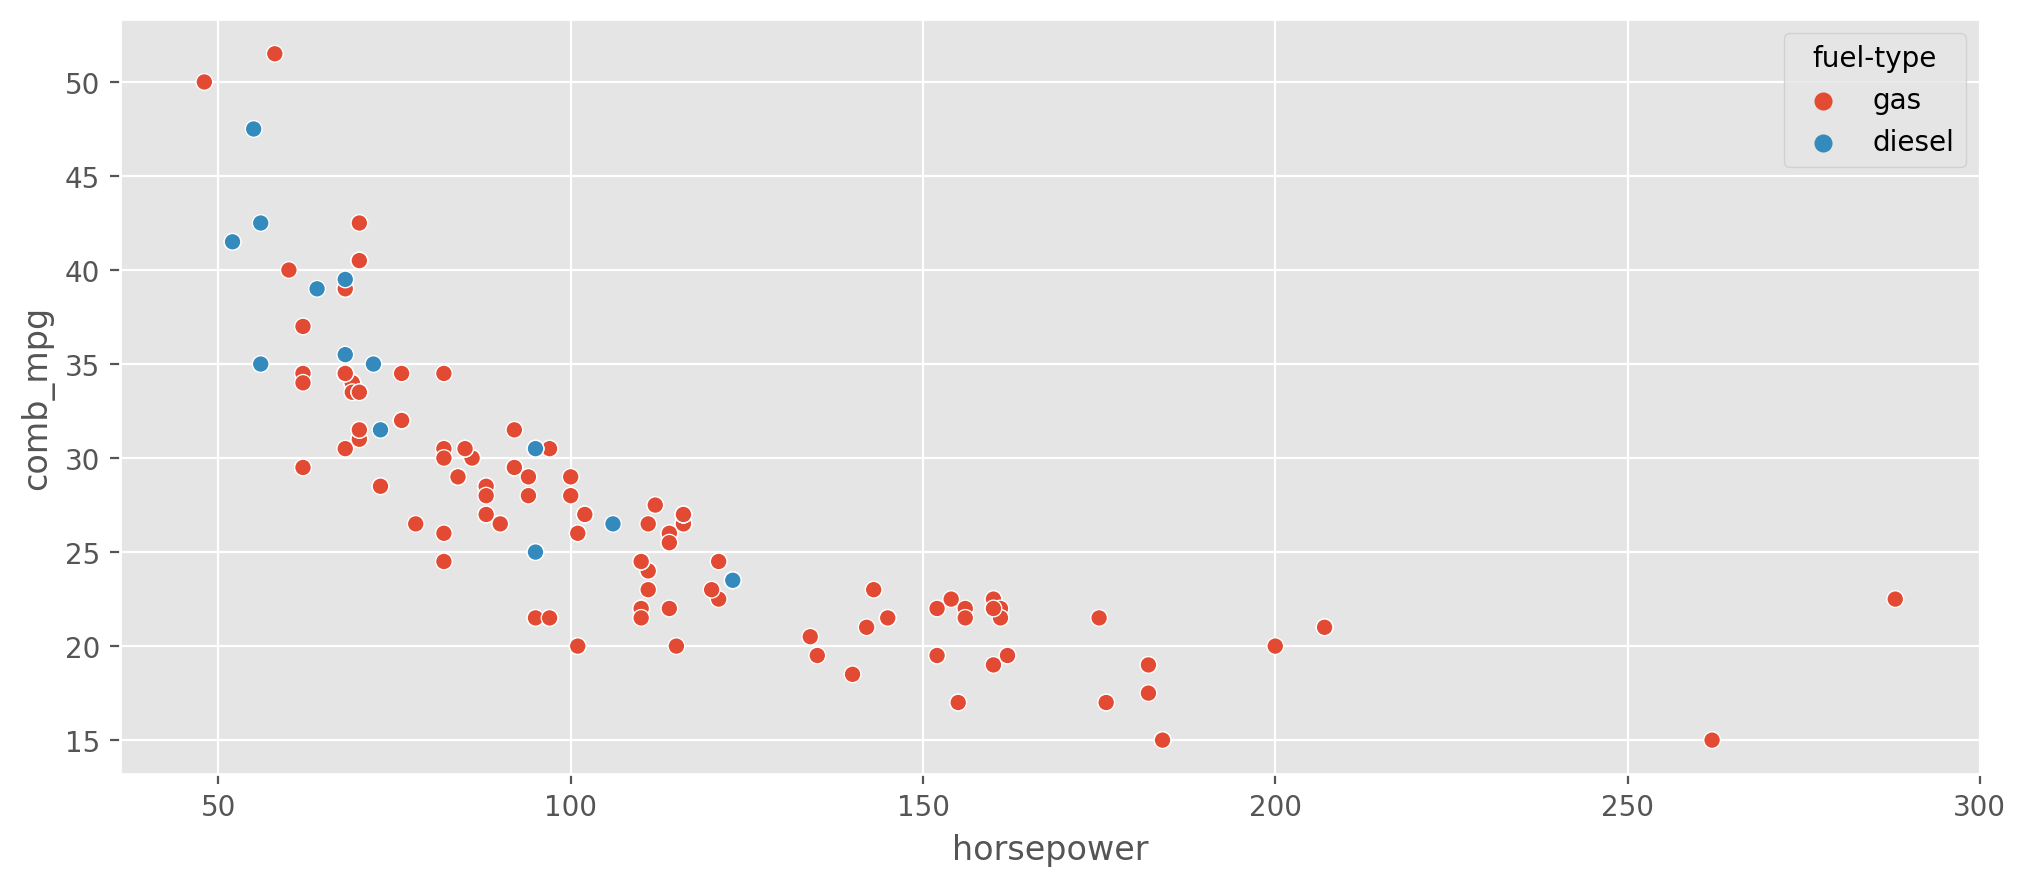

In [20]:
plt.figure(figsize = (12,5), dpi = 200)
sns.scatterplot('horsepower', 'comb_mpg', data = auto, hue = 'fuel-type')

<AxesSubplot:xlabel='horsepower', ylabel='comb_mpg'>

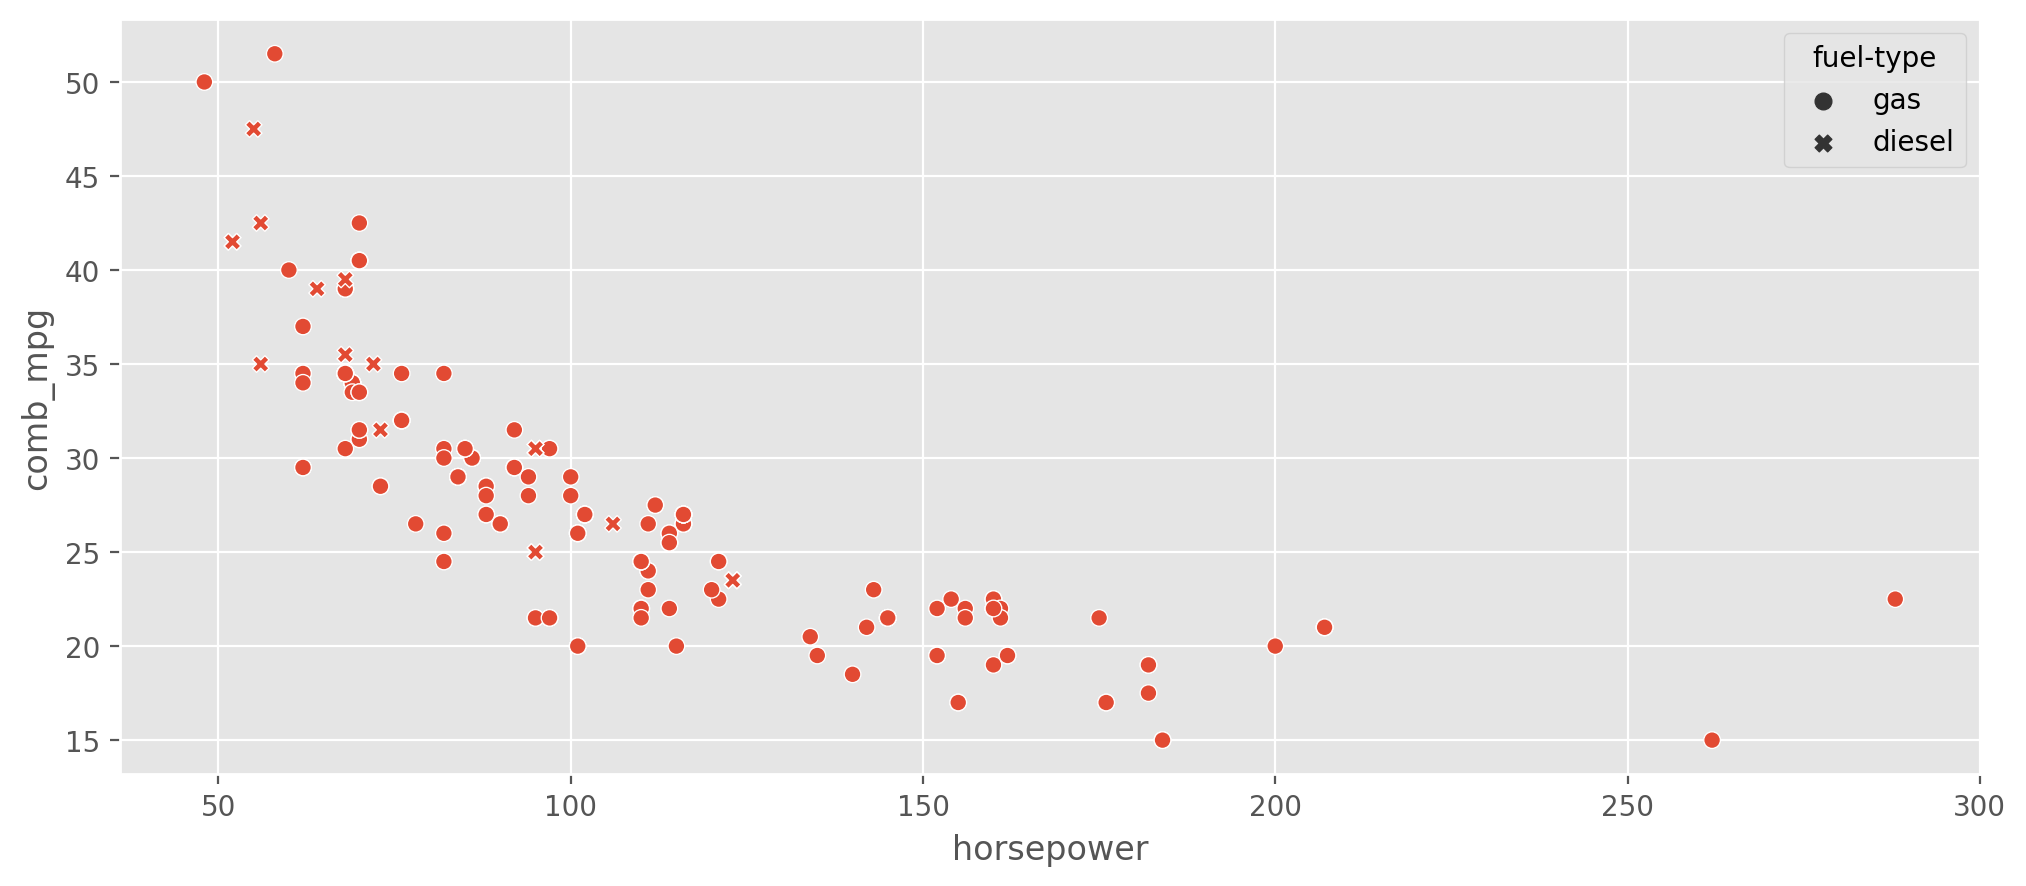

In [21]:
plt.figure(figsize = (12,5), dpi = 200)
sns.scatterplot('horsepower', 'comb_mpg', data = auto, style = 'fuel-type')

<AxesSubplot:xlabel='horsepower', ylabel='comb_mpg'>

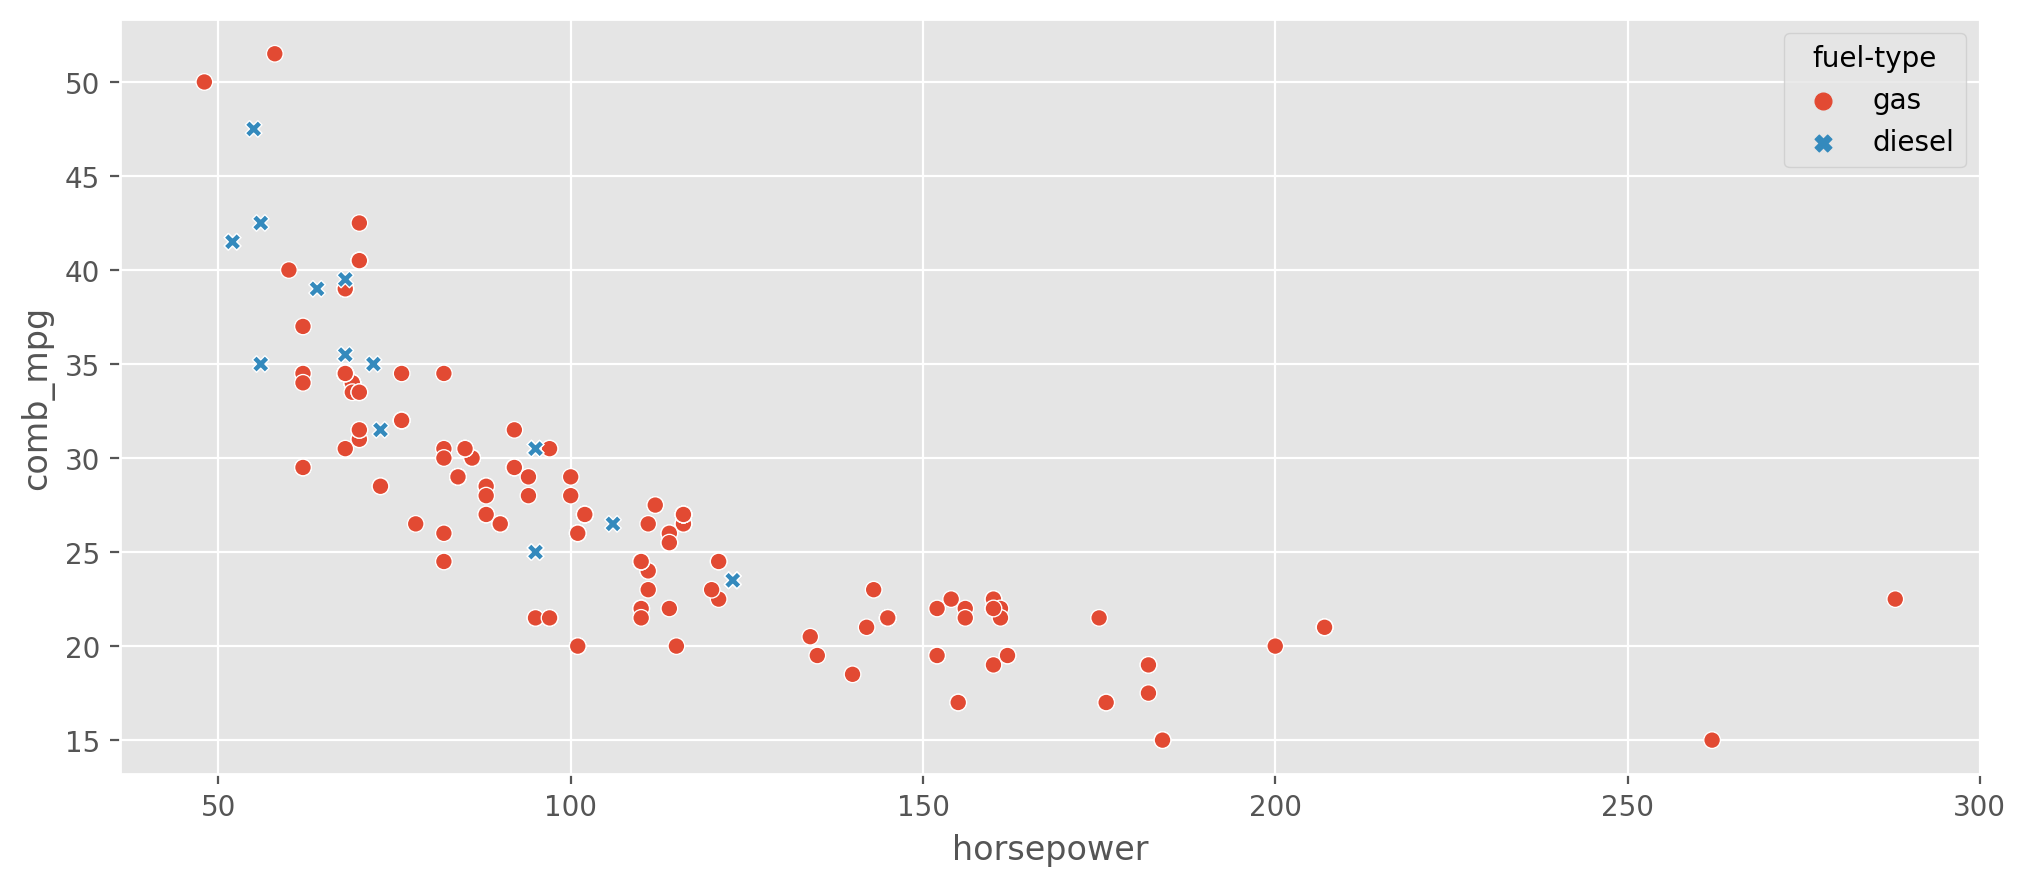

In [22]:
plt.figure(figsize = (12,5), dpi = 200)
sns.scatterplot('horsepower', 'comb_mpg', data = auto, style = 'fuel-type', hue = 'fuel-type')

---
## barplot
- Creates a barchart
- Used in case of categorical-numerical features

<AxesSubplot:xlabel='fuel-type', ylabel='comb_mpg'>

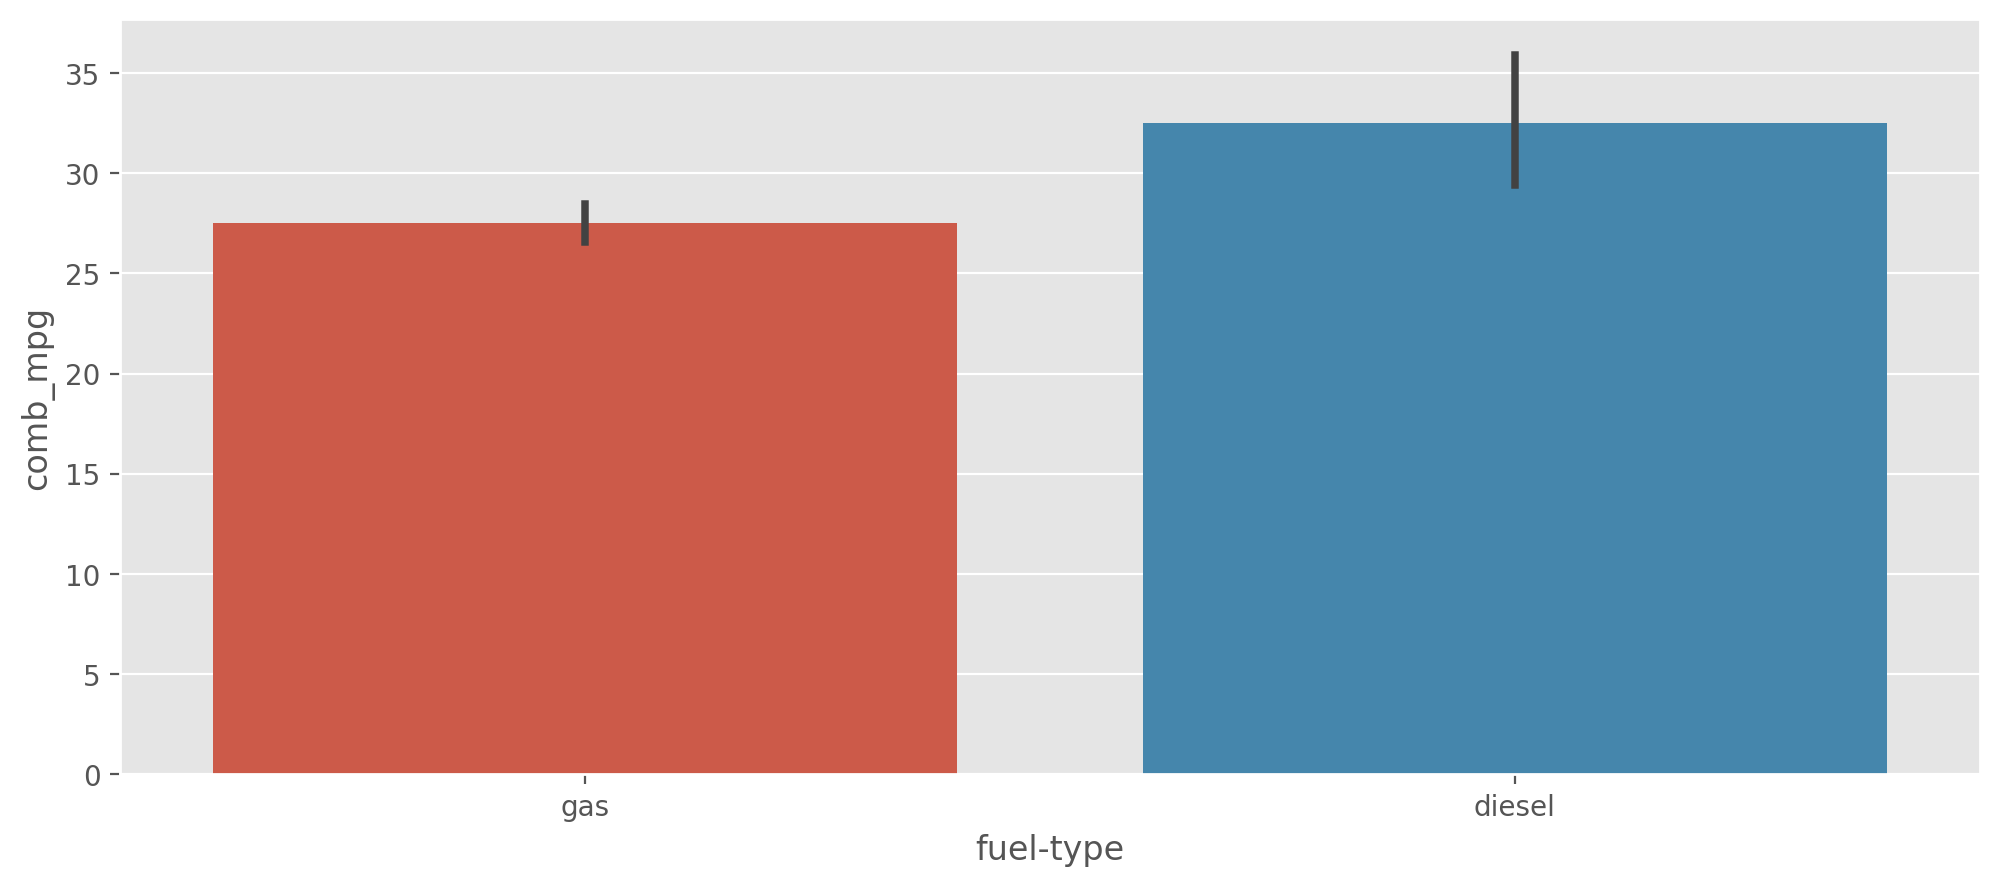

In [23]:
plt.figure(figsize = (12,5), dpi = 200)
sns.barplot('fuel-type', 'comb_mpg', data = auto)

In [24]:
auto.groupby('fuel-type')['comb_mpg'].mean()

fuel-type
diesel    32.525000
gas       27.494595
Name: comb_mpg, dtype: float64

<AxesSubplot:xlabel='body-style', ylabel='comb_mpg'>

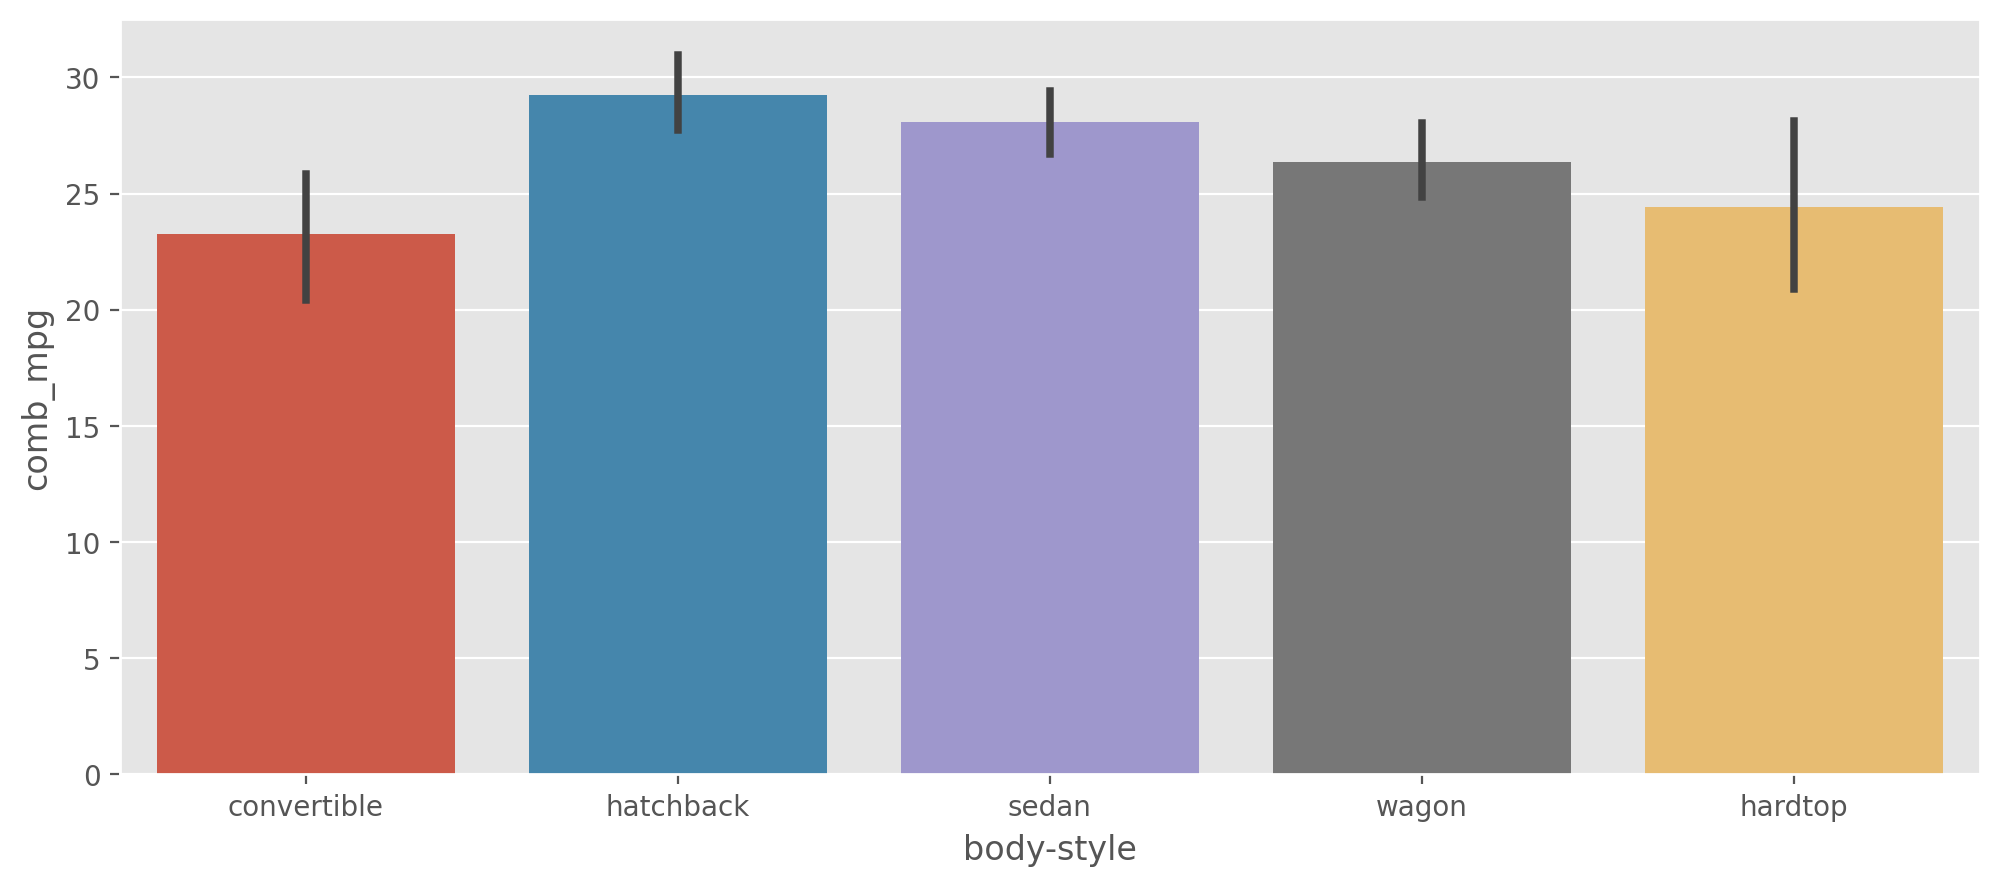

In [25]:
plt.figure(figsize = (12,5), dpi = 200)
sns.barplot('body-style', 'comb_mpg', data = auto)

<AxesSubplot:xlabel='body-style', ylabel='comb_mpg'>

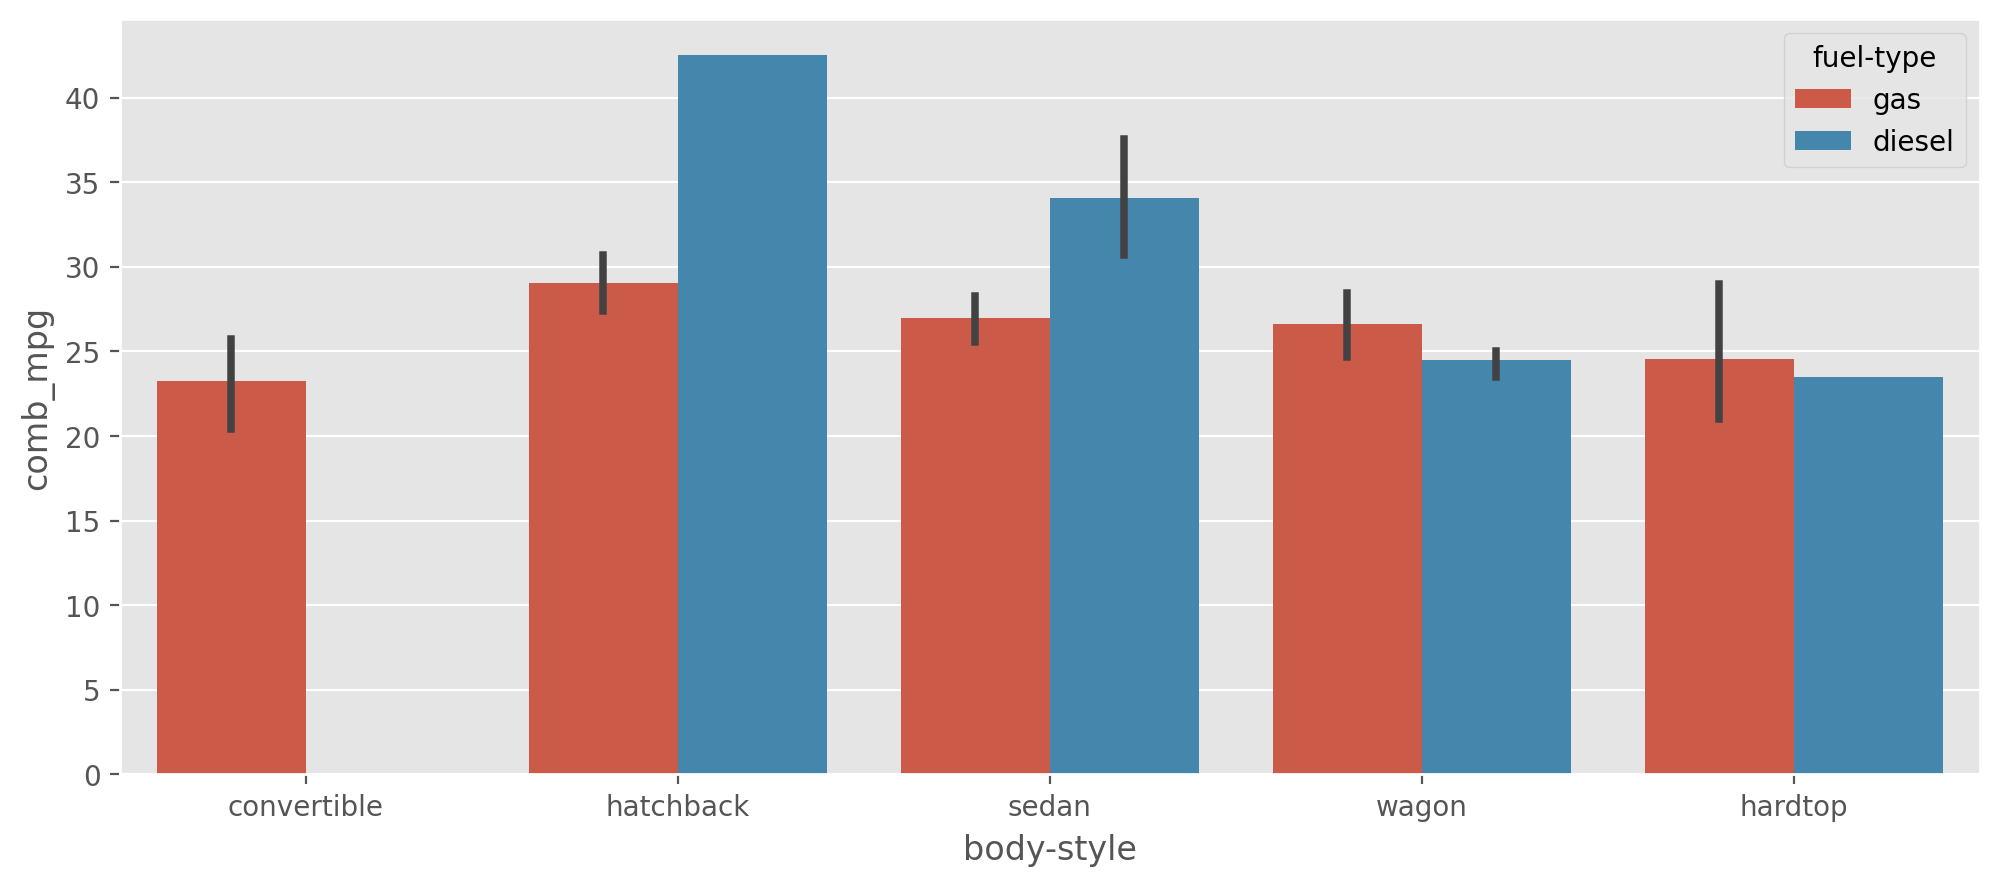

In [26]:
plt.figure(figsize = (12,5), dpi = 200)
sns.barplot('body-style', 'comb_mpg', data = auto, hue = 'fuel-type')

<AxesSubplot:xlabel='body-style', ylabel='comb_mpg'>

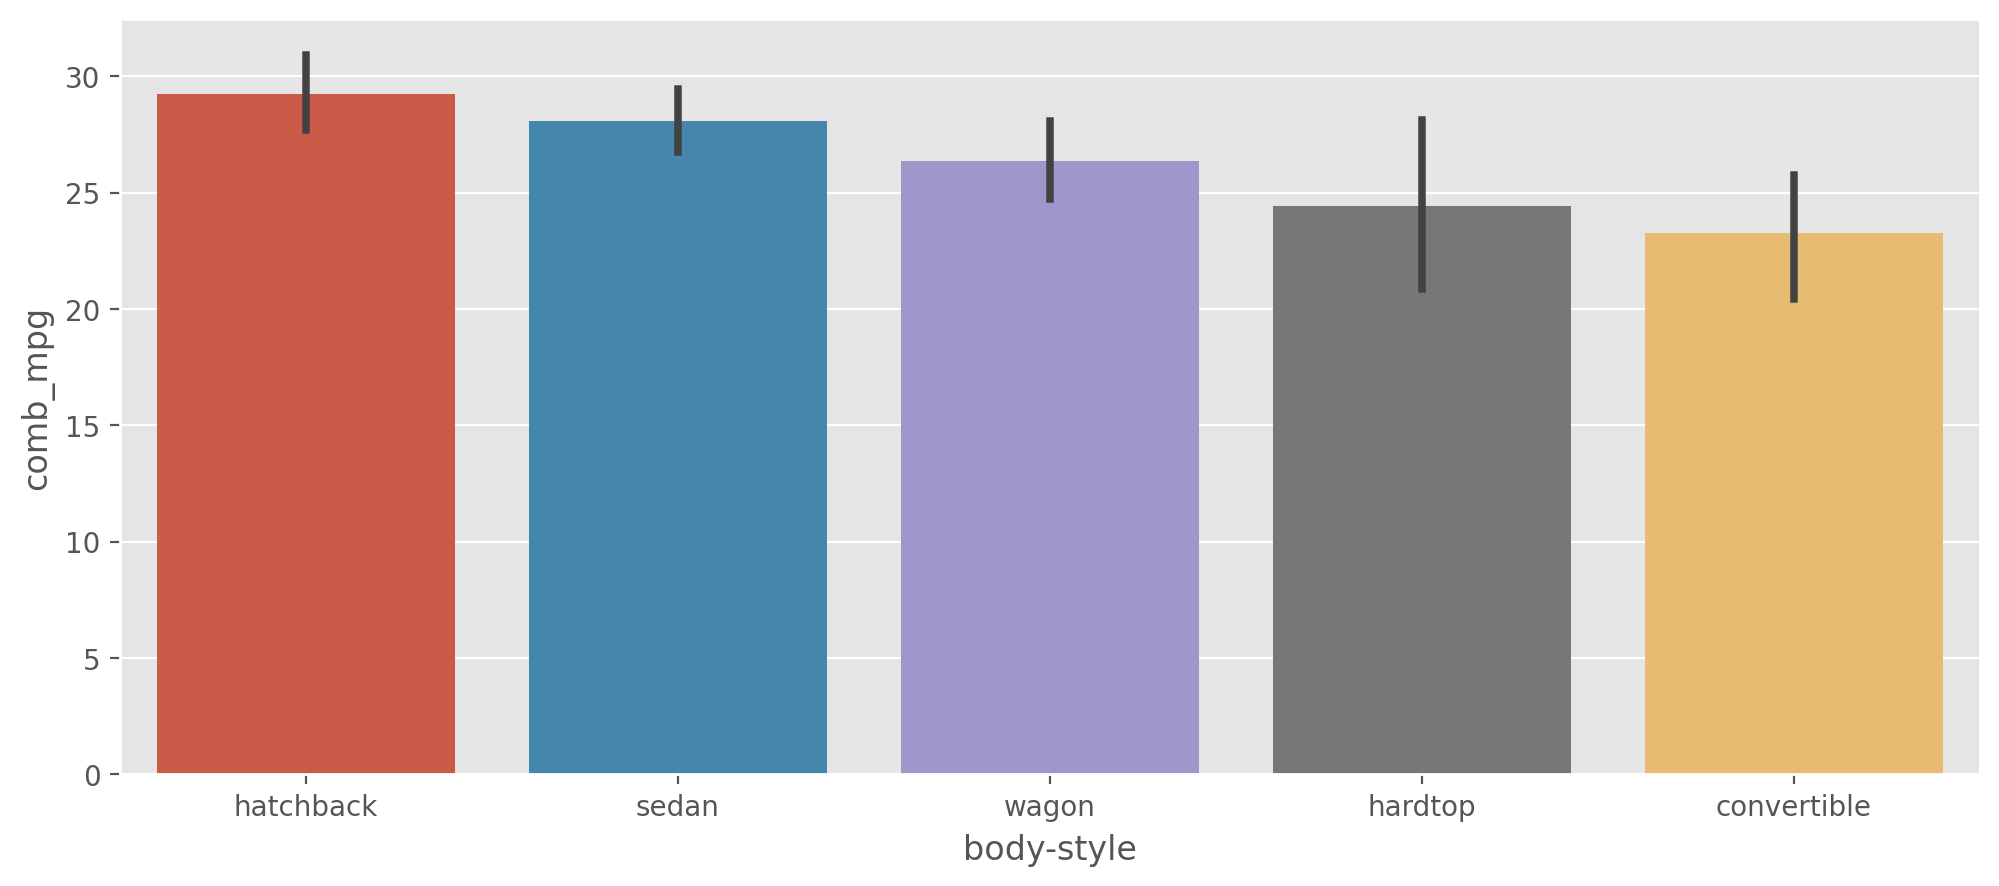

In [27]:
plt.figure(figsize = (12,5), dpi = 200)
sns.barplot('body-style', 'comb_mpg', data = auto, order = ['hatchback', 'sedan', 'wagon', 'hardtop', 'convertible'])

<AxesSubplot:xlabel='body-style', ylabel='comb_mpg'>

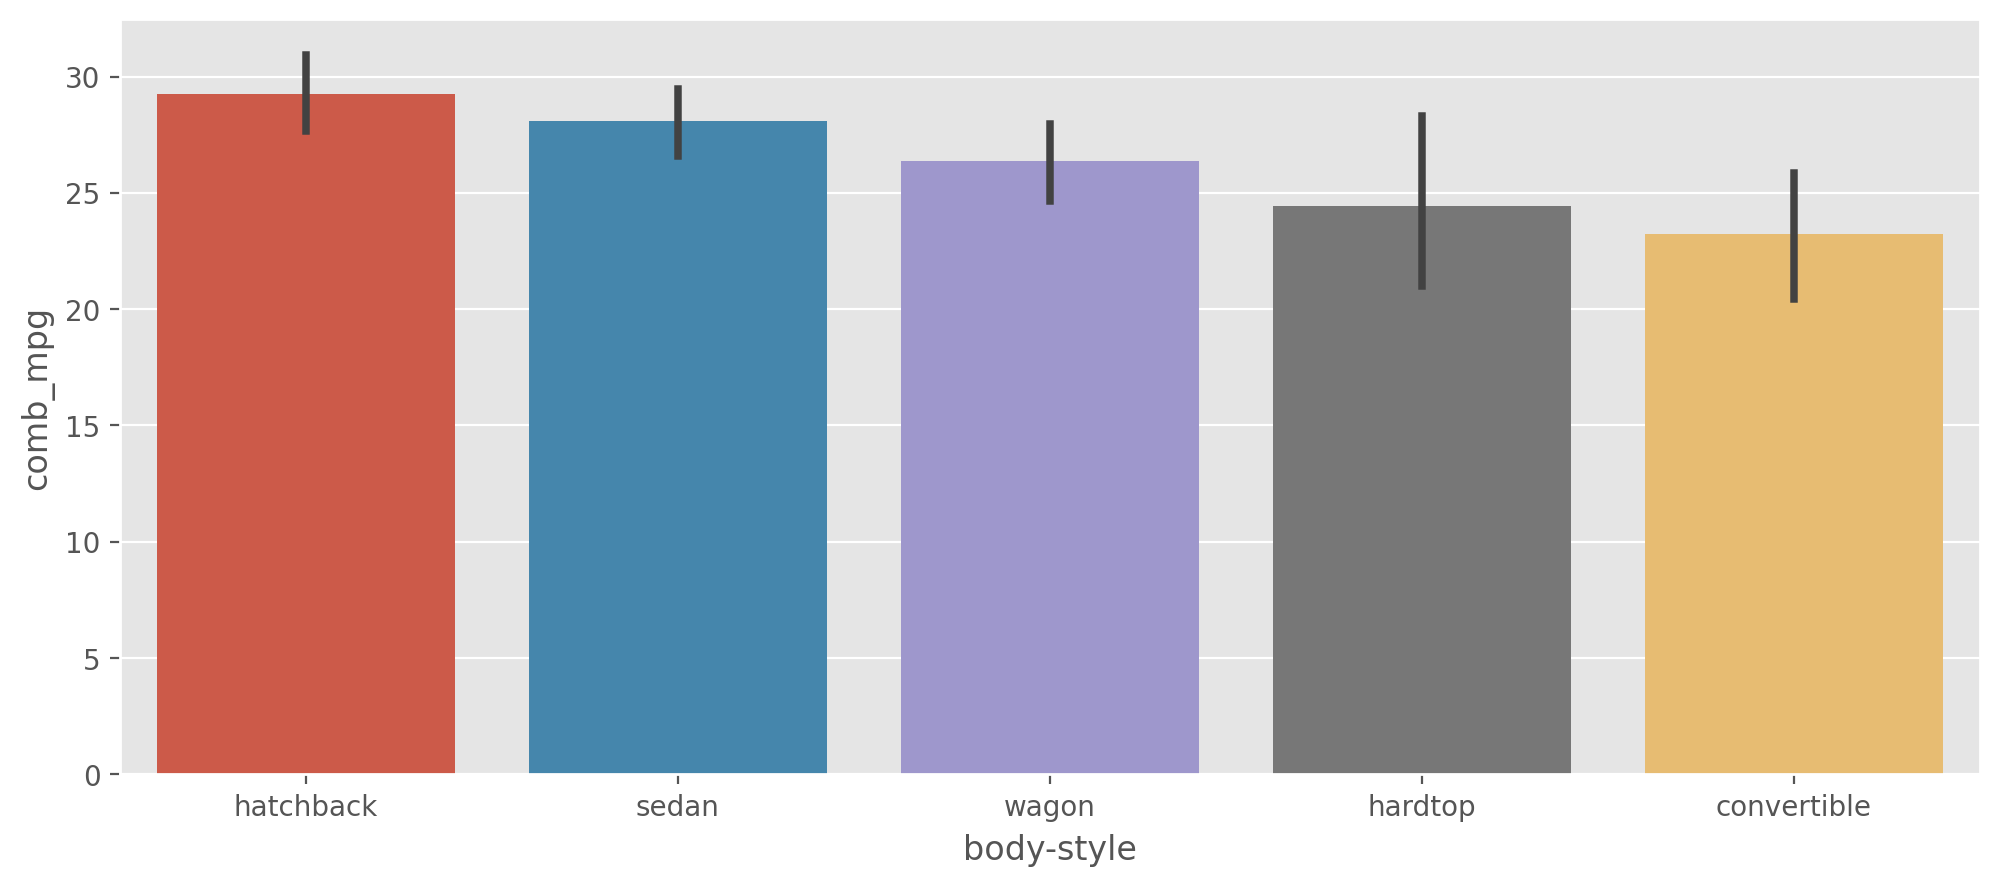

In [28]:
desc_order = auto.groupby('body-style')['comb_mpg'].mean().sort_values(ascending = False).index
plt.figure(figsize = (12,5), dpi = 200)
sns.barplot('body-style', 'comb_mpg', data = auto, order = desc_order)

<AxesSubplot:xlabel='make', ylabel='price'>

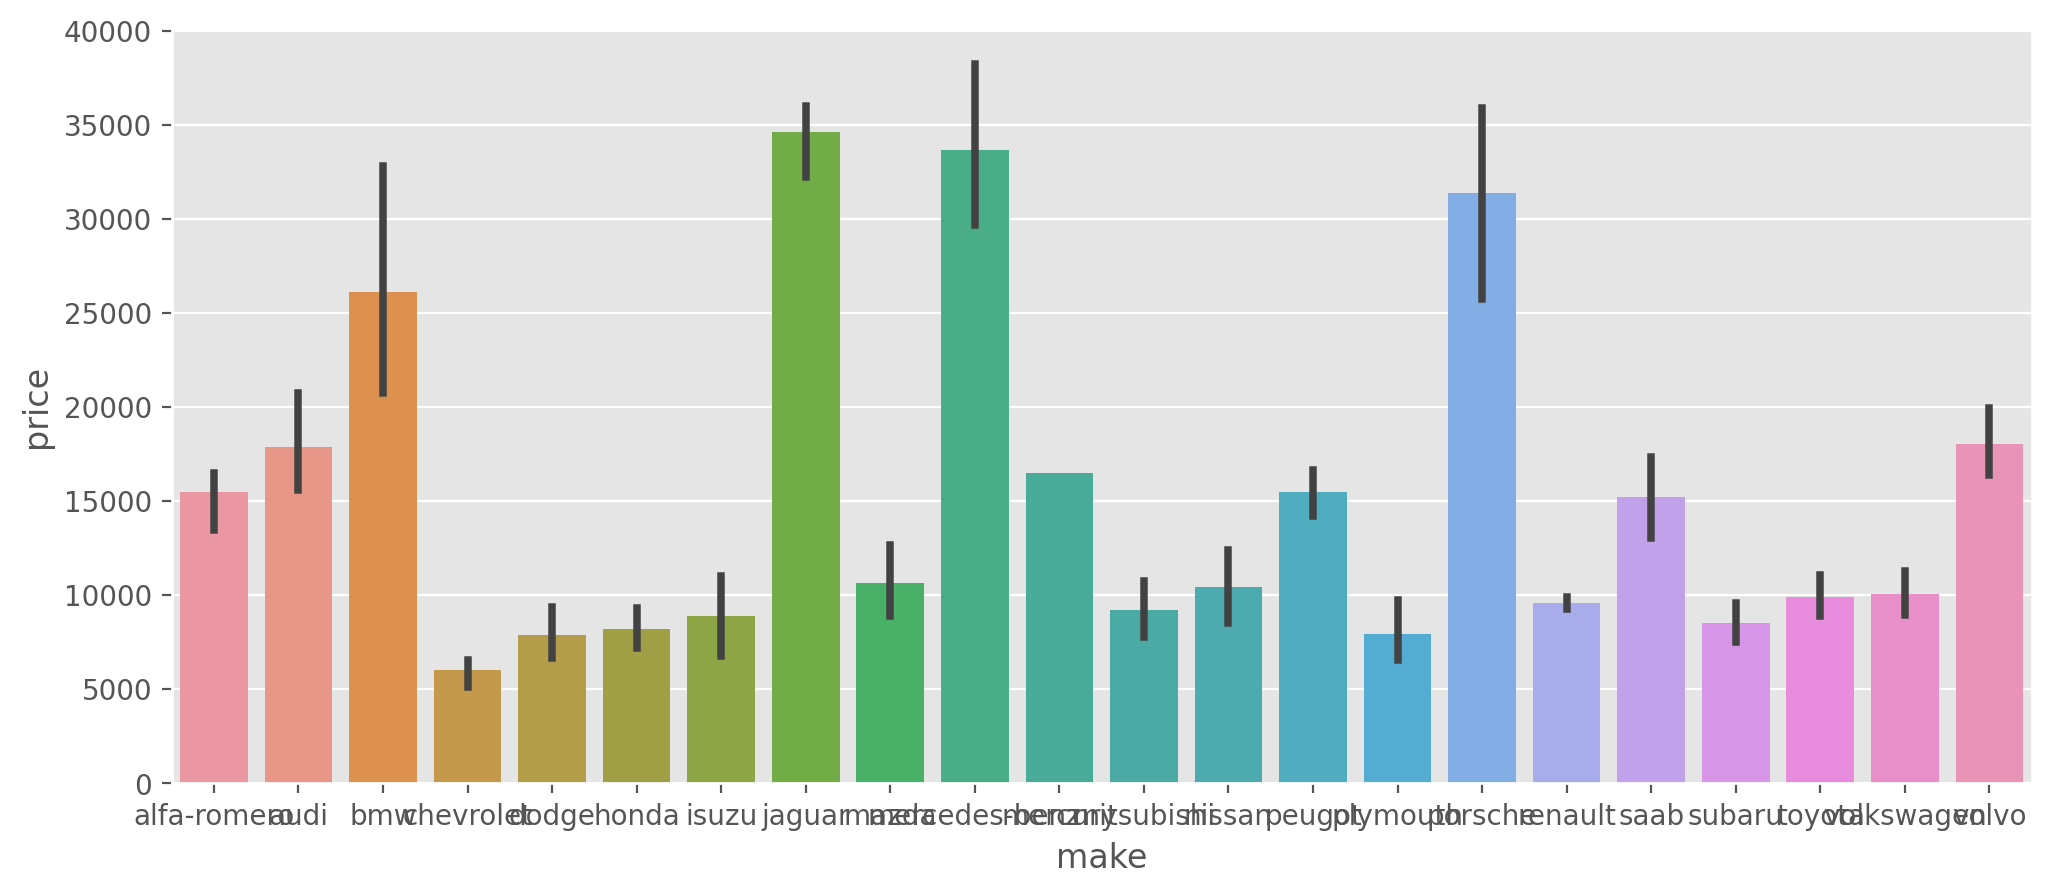

In [29]:
plt.figure(figsize = (12,5), dpi = 200)
sns.barplot('make', 'price', data = auto)

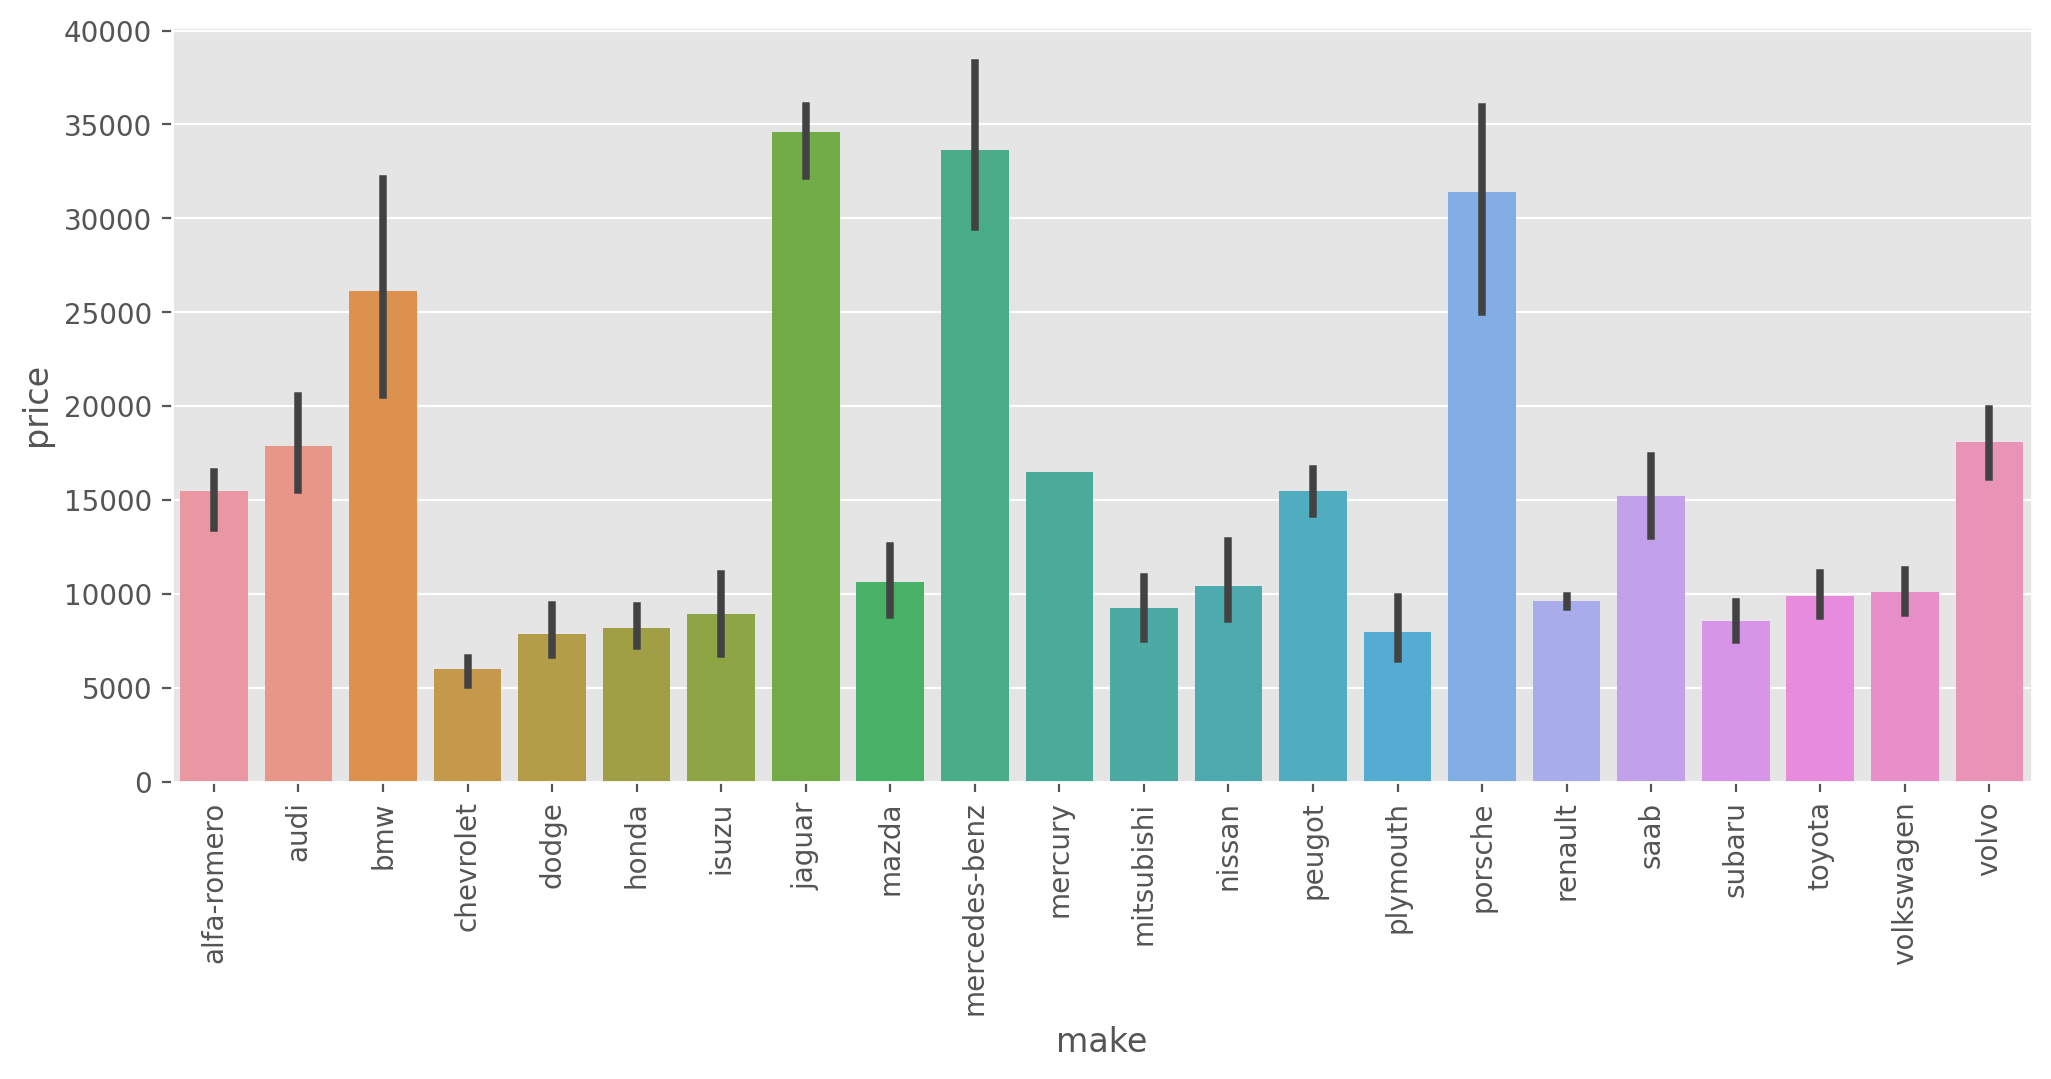

In [30]:
plt.figure(figsize = (12,5), dpi = 200)
sns.barplot('make', 'price', data = auto)

plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='price', ylabel='make'>

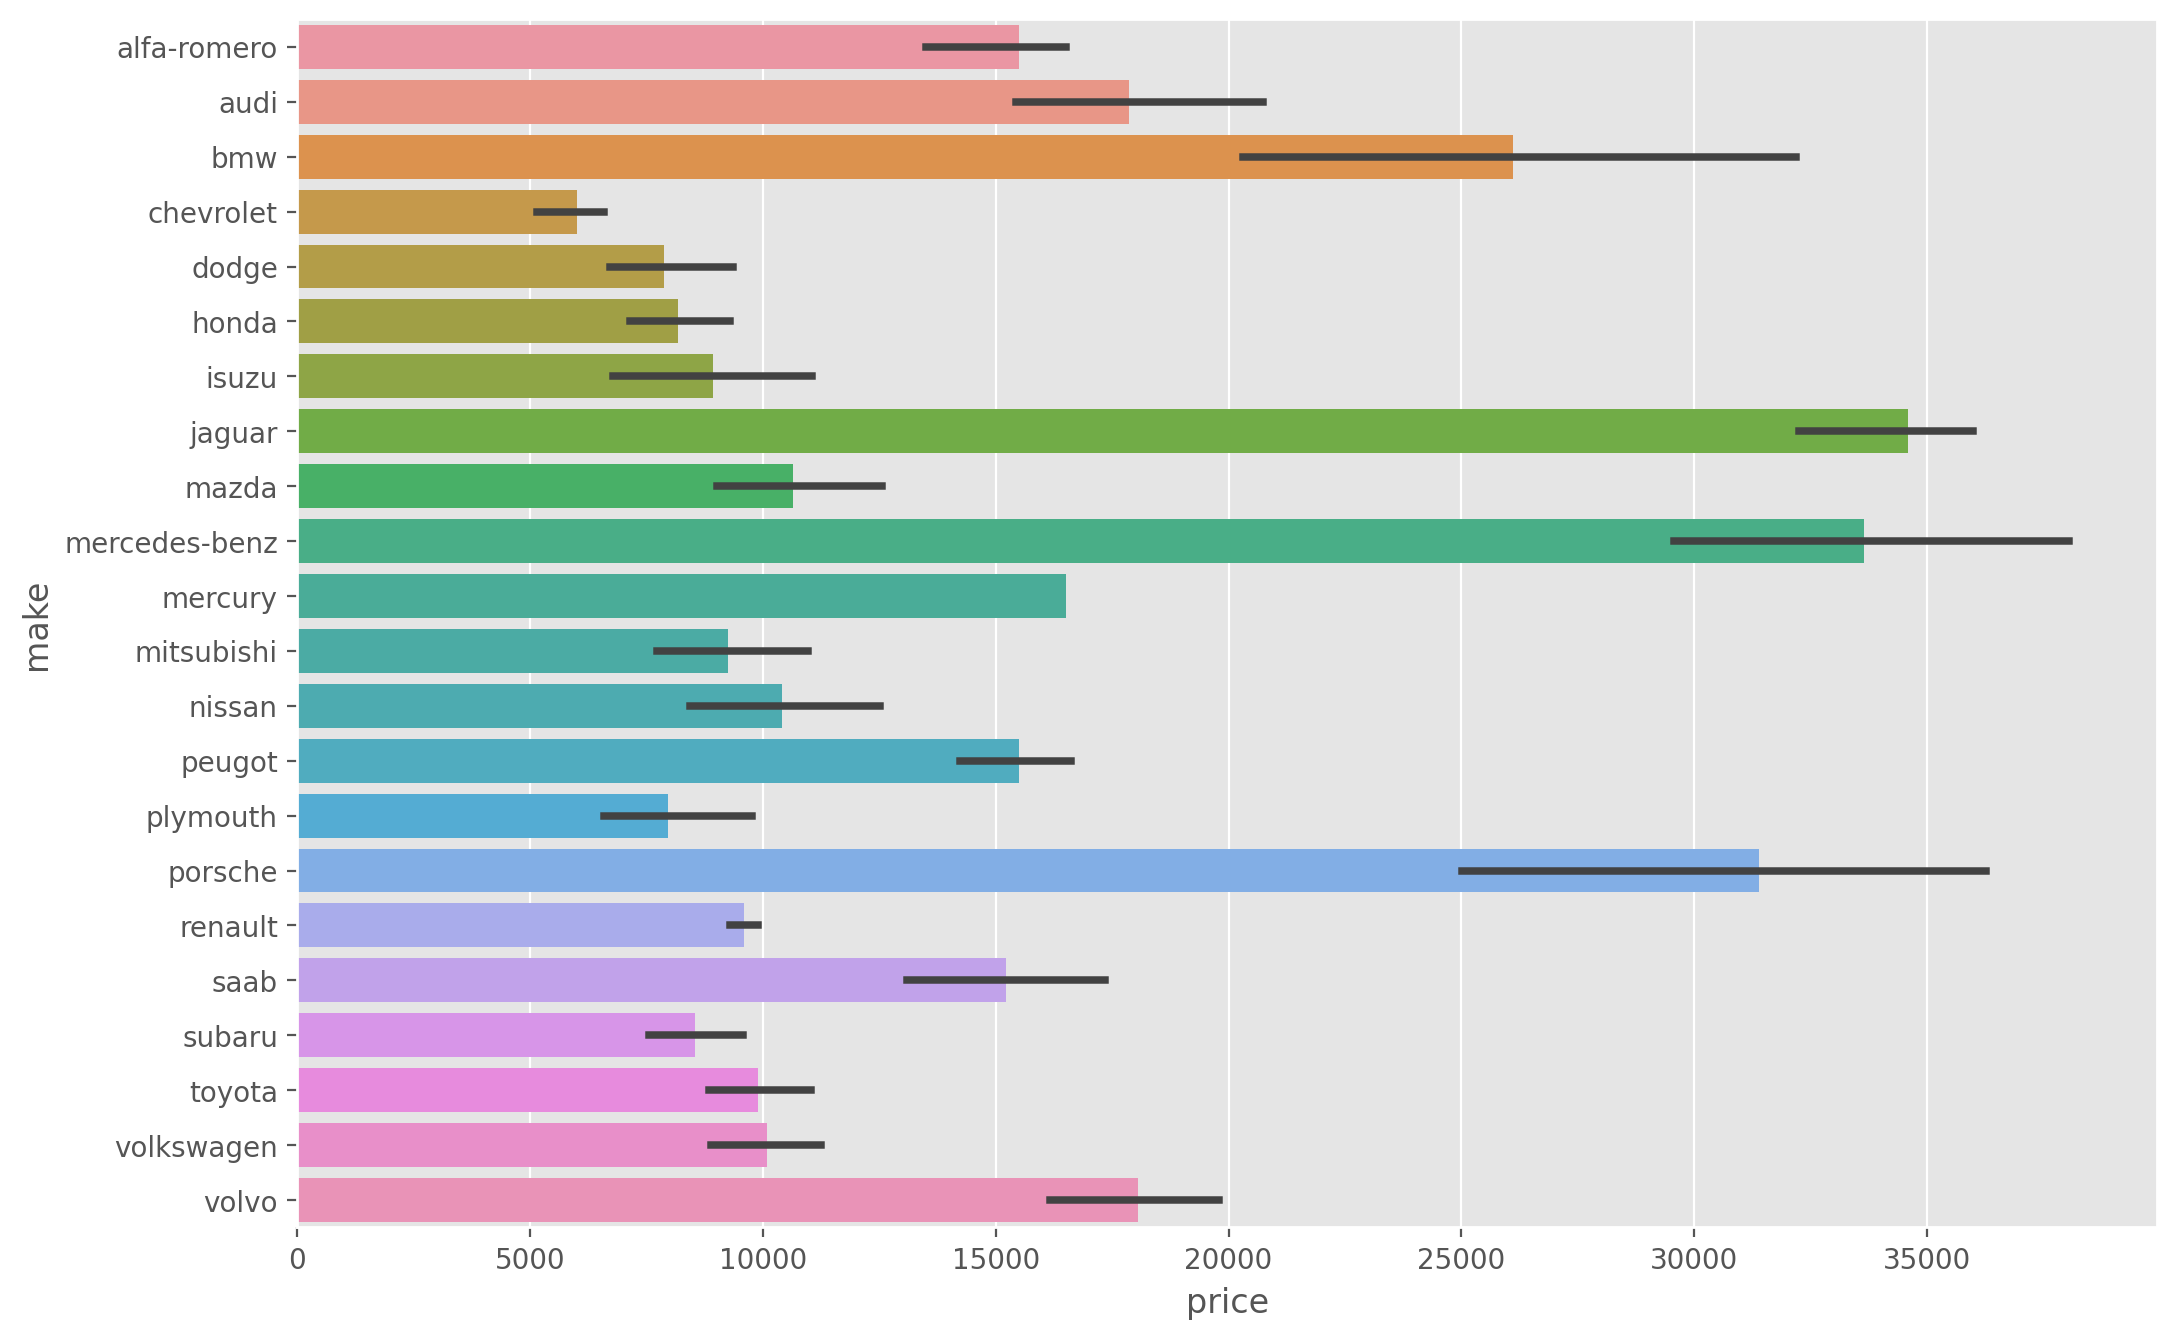

In [31]:
plt.figure(figsize = (12,8), dpi = 200)
sns.barplot('price', 'make', data = auto)

<AxesSubplot:xlabel='price', ylabel='make'>

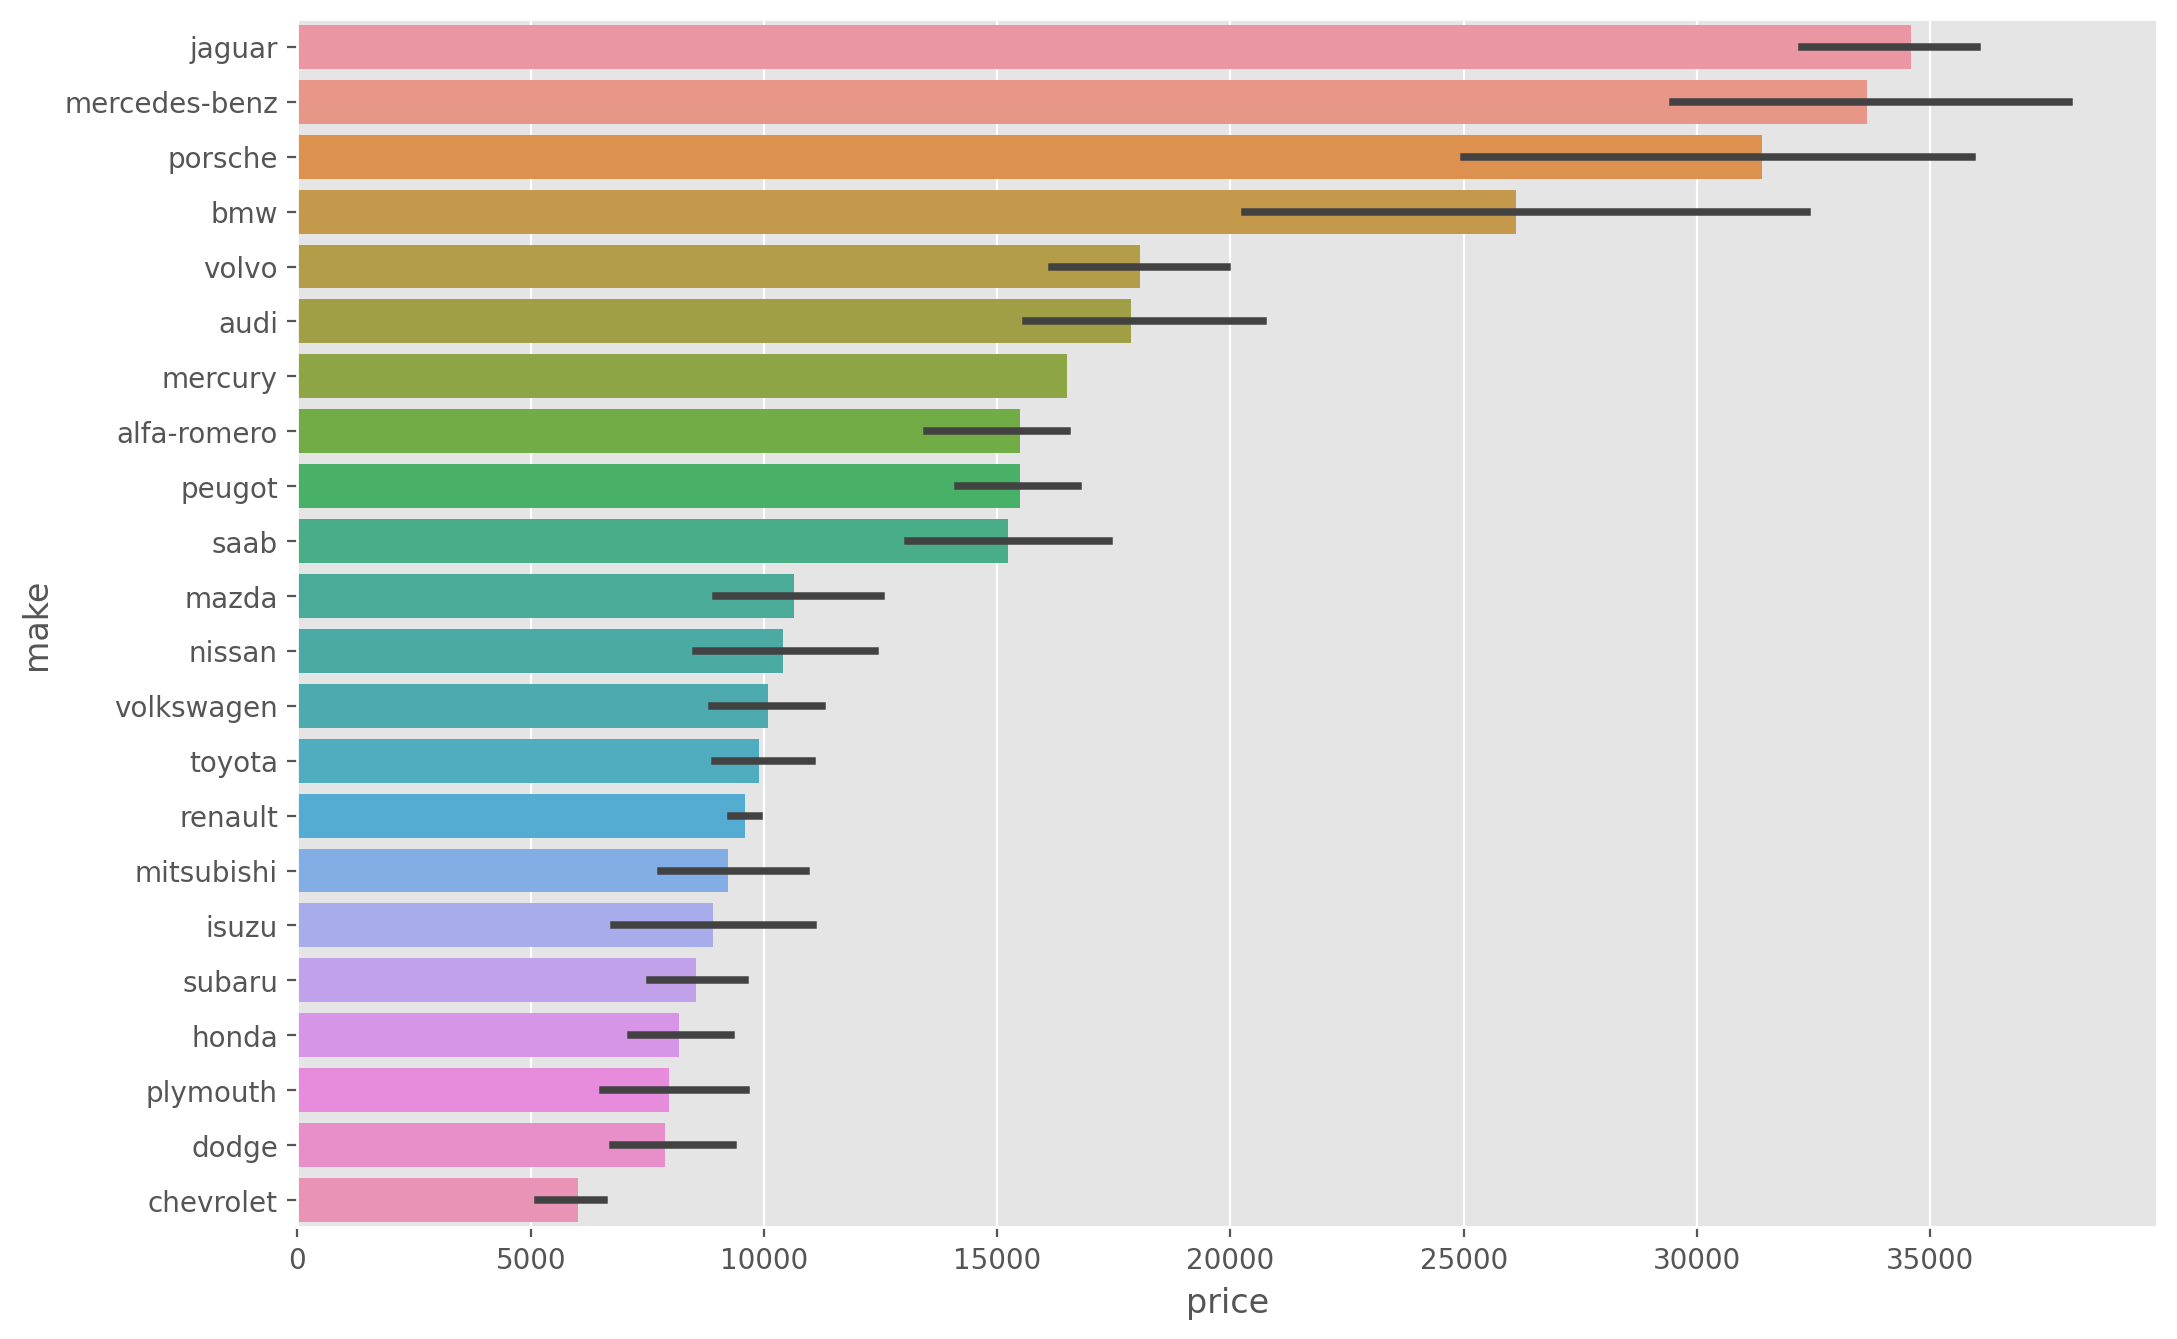

In [32]:
desc_order = auto.groupby('make')['price'].mean().sort_values(ascending = False).index
plt.figure(figsize = (12,8), dpi = 200)
sns.barplot('price', 'make', data = auto, order = desc_order)

---
## countplot
- Used to create a chart showing number of each category in a categorical column
- Used in case of a categorical column

<AxesSubplot:xlabel='fuel-type', ylabel='count'>

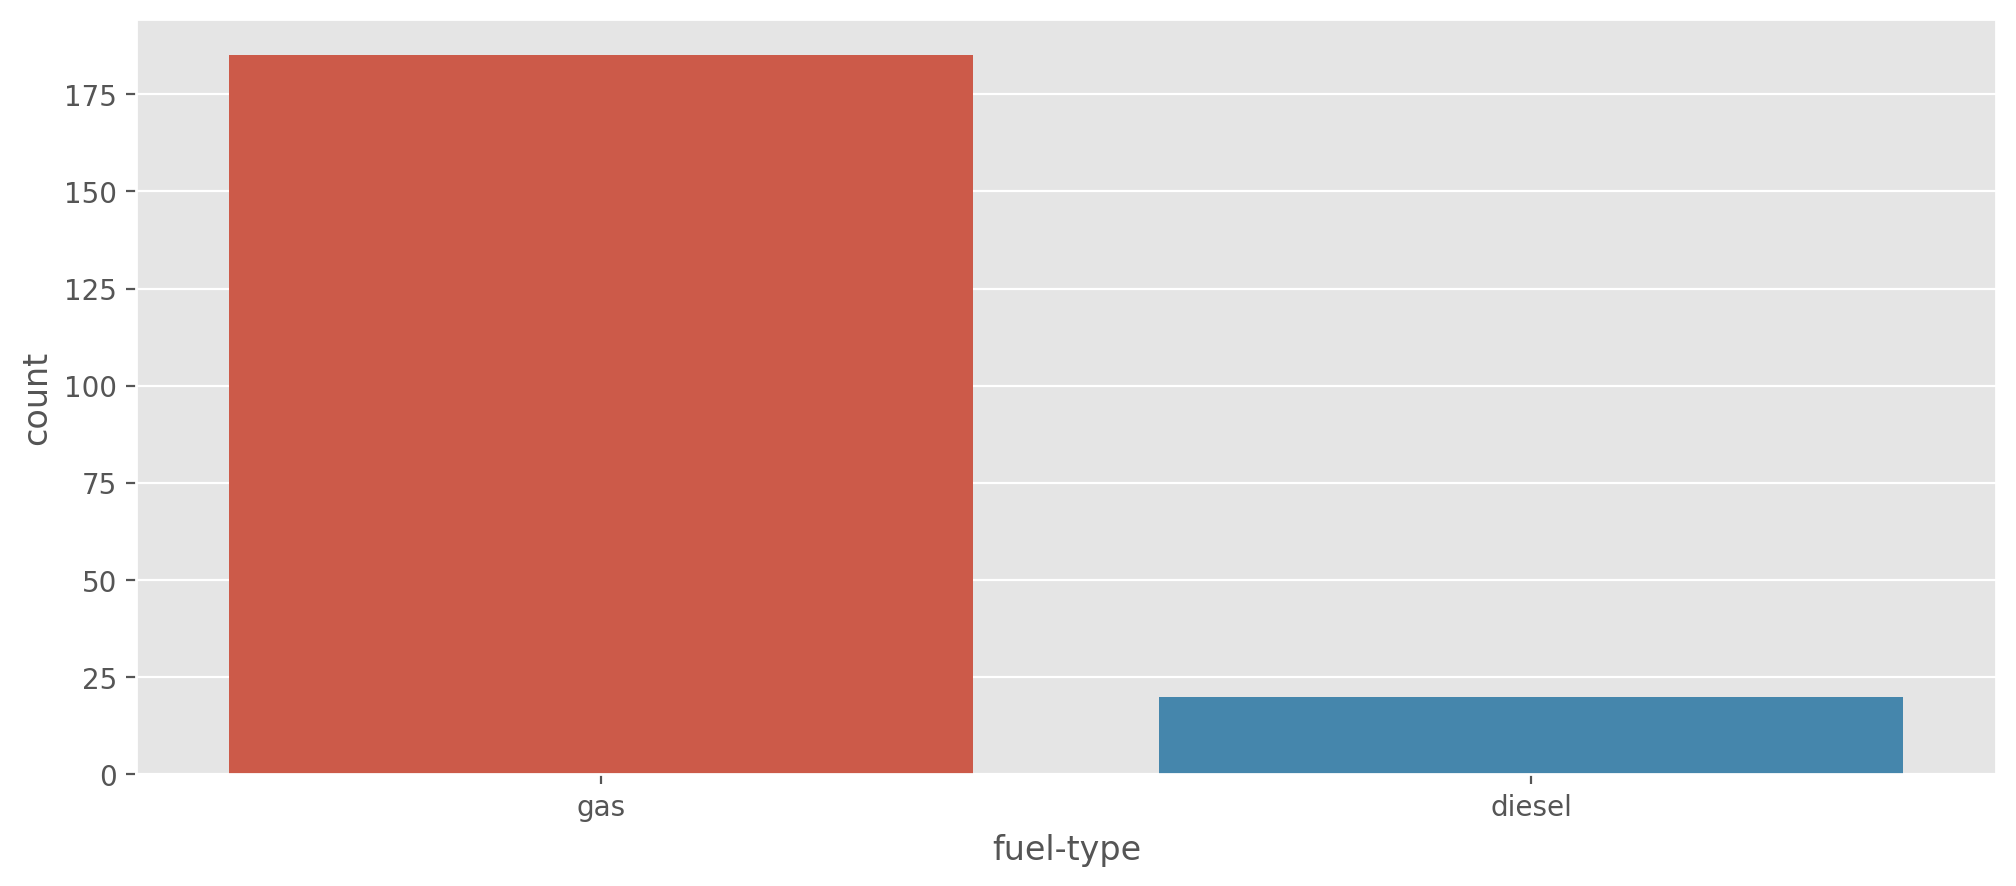

In [33]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot('fuel-type', data = auto)

In [34]:
auto['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

<AxesSubplot:xlabel='body-style', ylabel='count'>

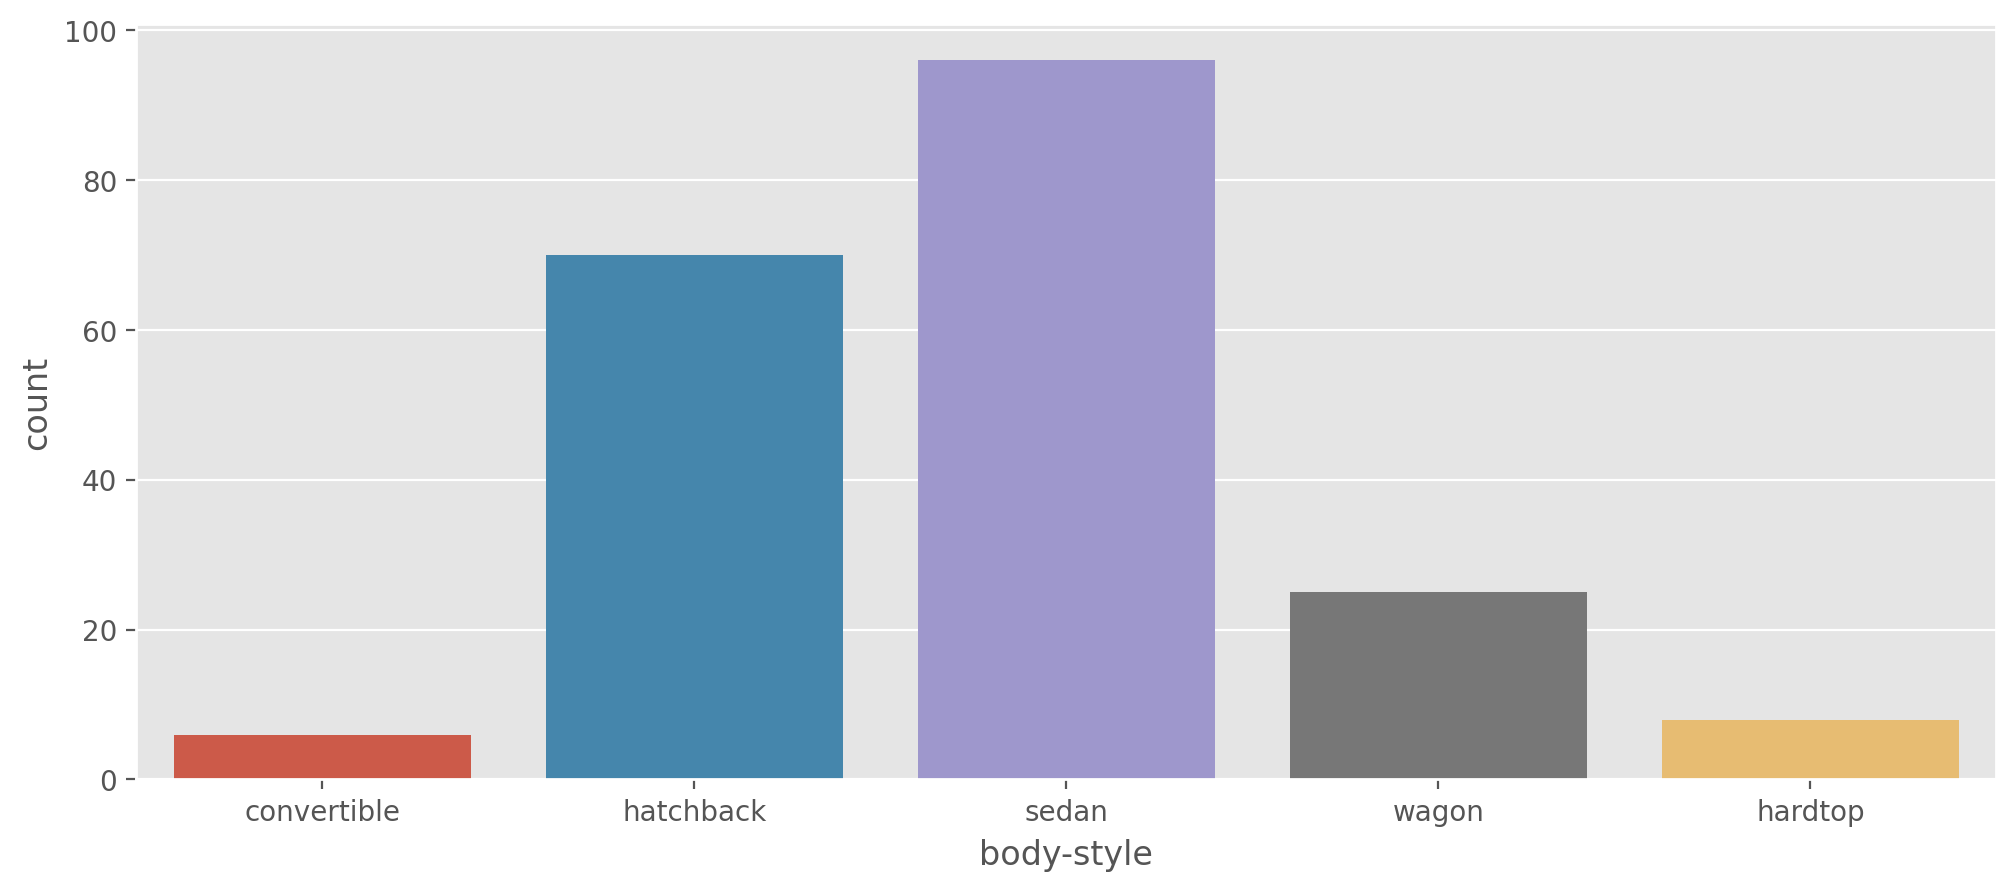

In [35]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot('body-style', data = auto)

In [36]:
auto['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

<AxesSubplot:xlabel='body-style', ylabel='count'>

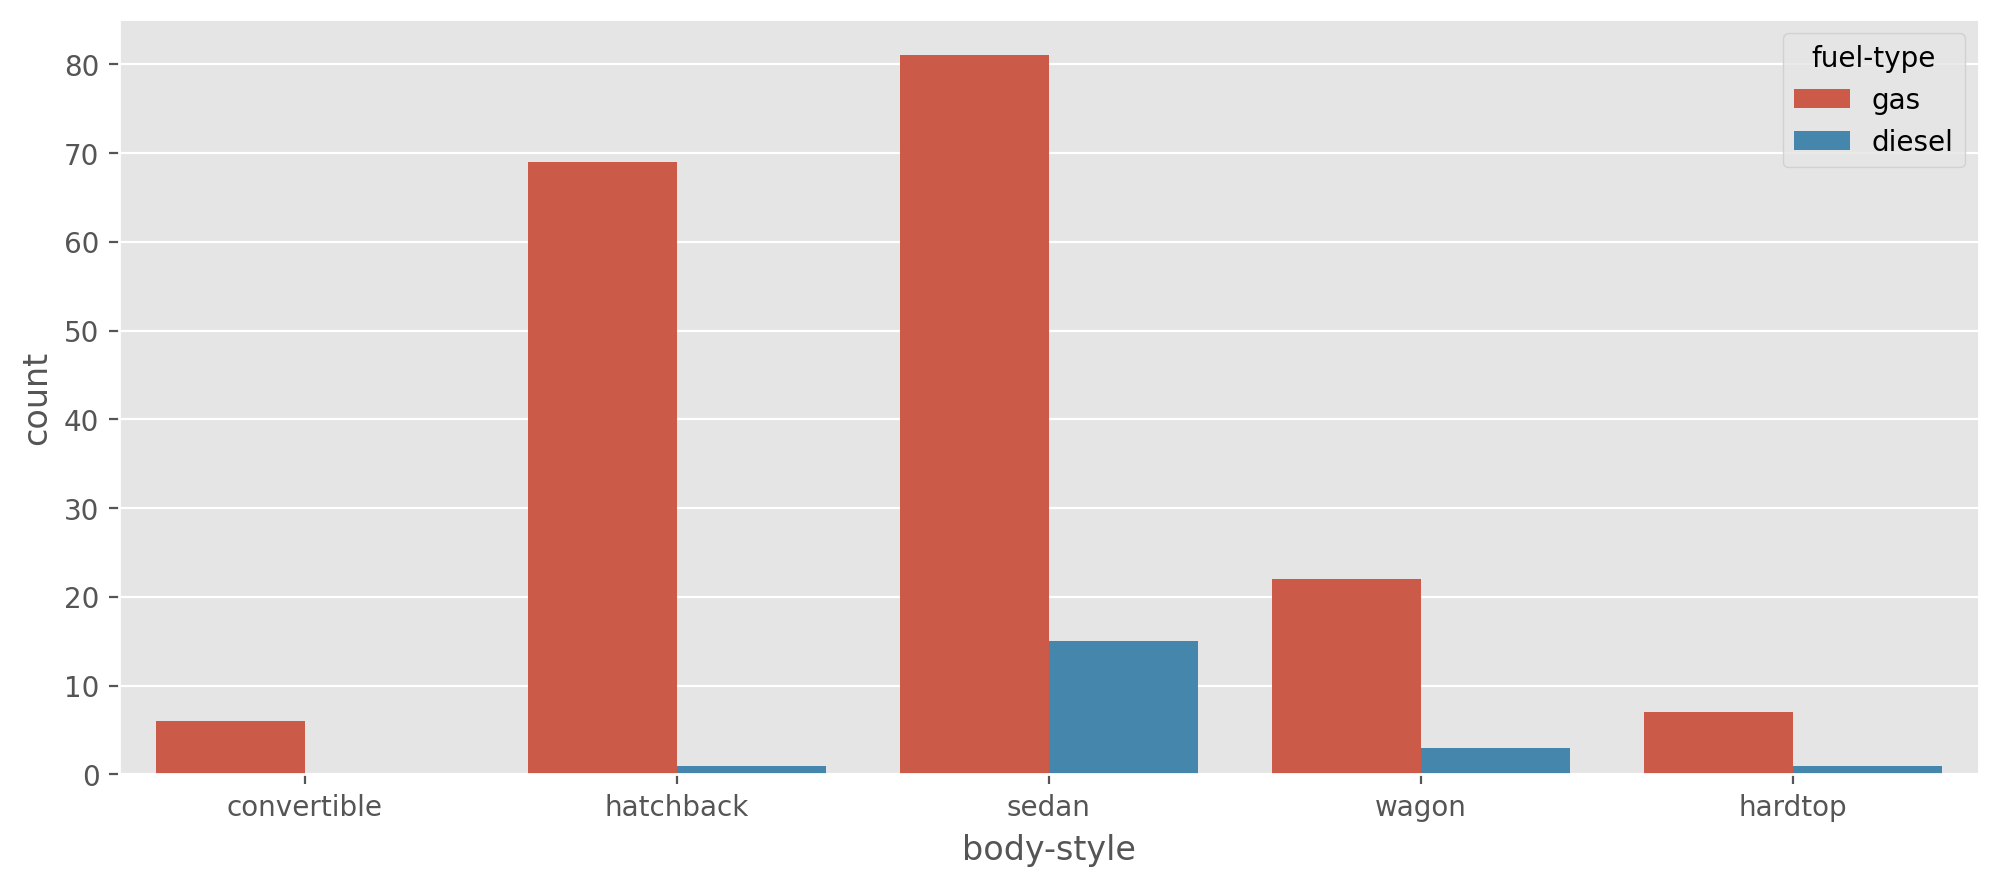

In [37]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot('body-style', data = auto, hue = 'fuel-type')

## boxplot

<AxesSubplot:ylabel='price'>

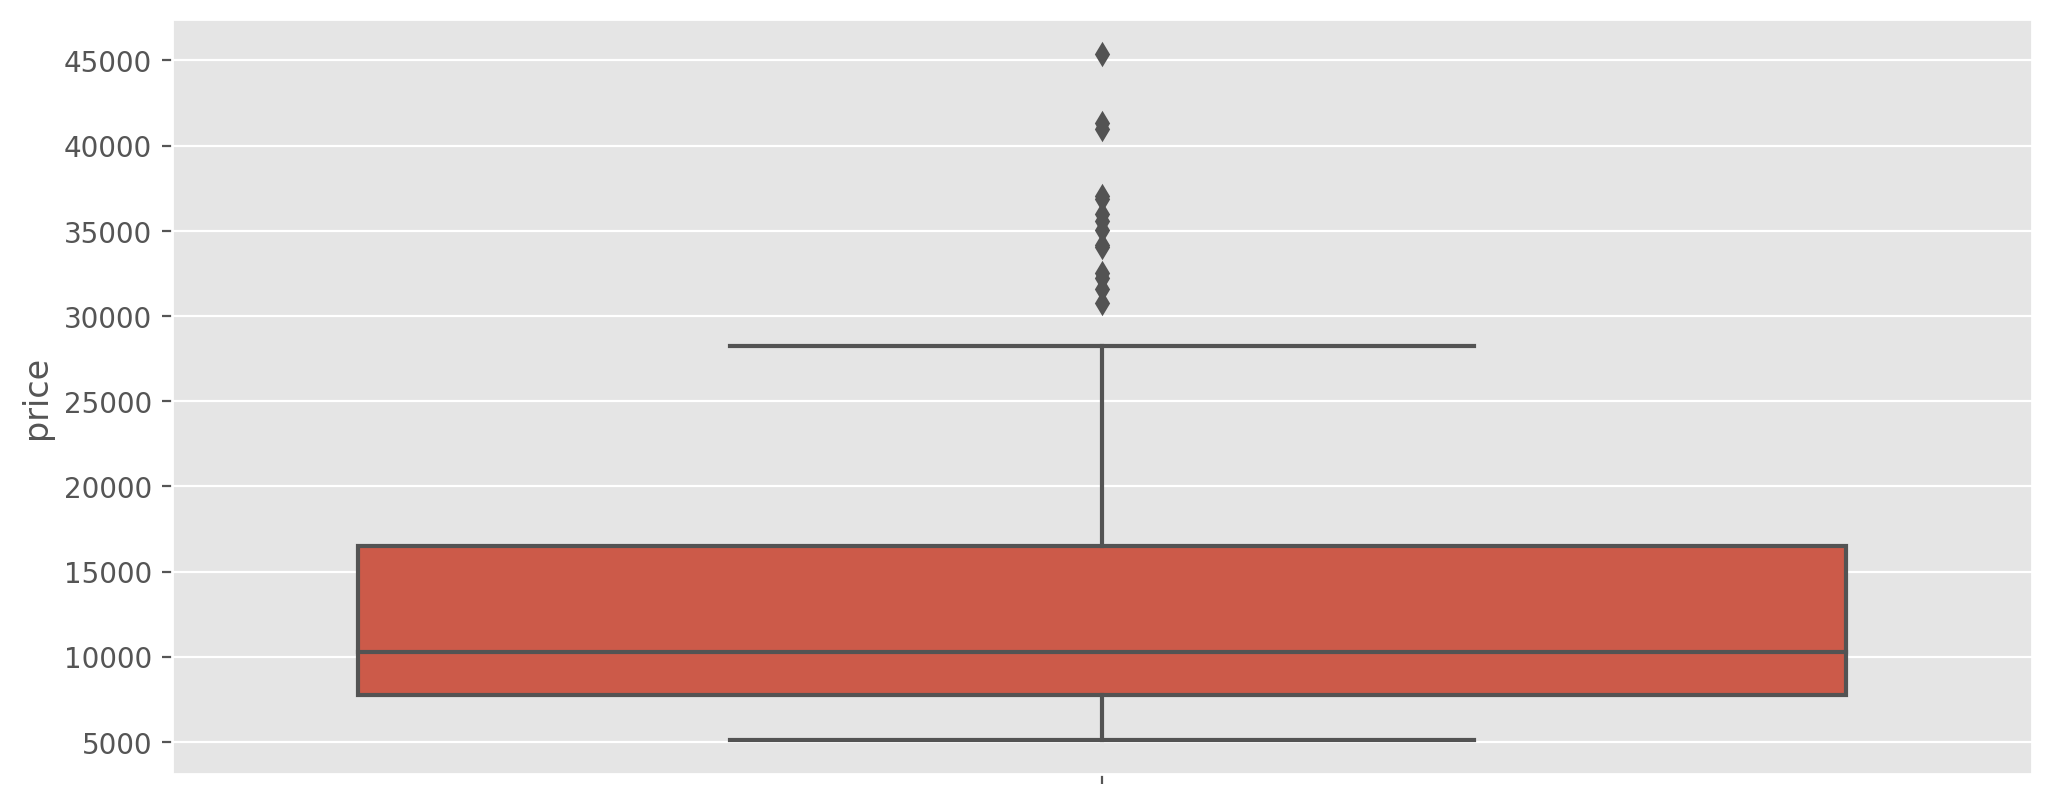

In [38]:
plt.figure(figsize = (12,5), dpi = 200)
sns.boxplot(y = 'price', data = auto)

In [39]:
q1 = auto.price.quantile(0.25)
q2 = auto.price.quantile(0.50)
q3 = auto.price.quantile(0.75)
iqr = q3 - q1
print(q1, q2, q3, iqr, sep = '\n')

7775.0
10295.0
16500.0
8725.0


<AxesSubplot:xlabel='fuel-type', ylabel='comb_mpg'>

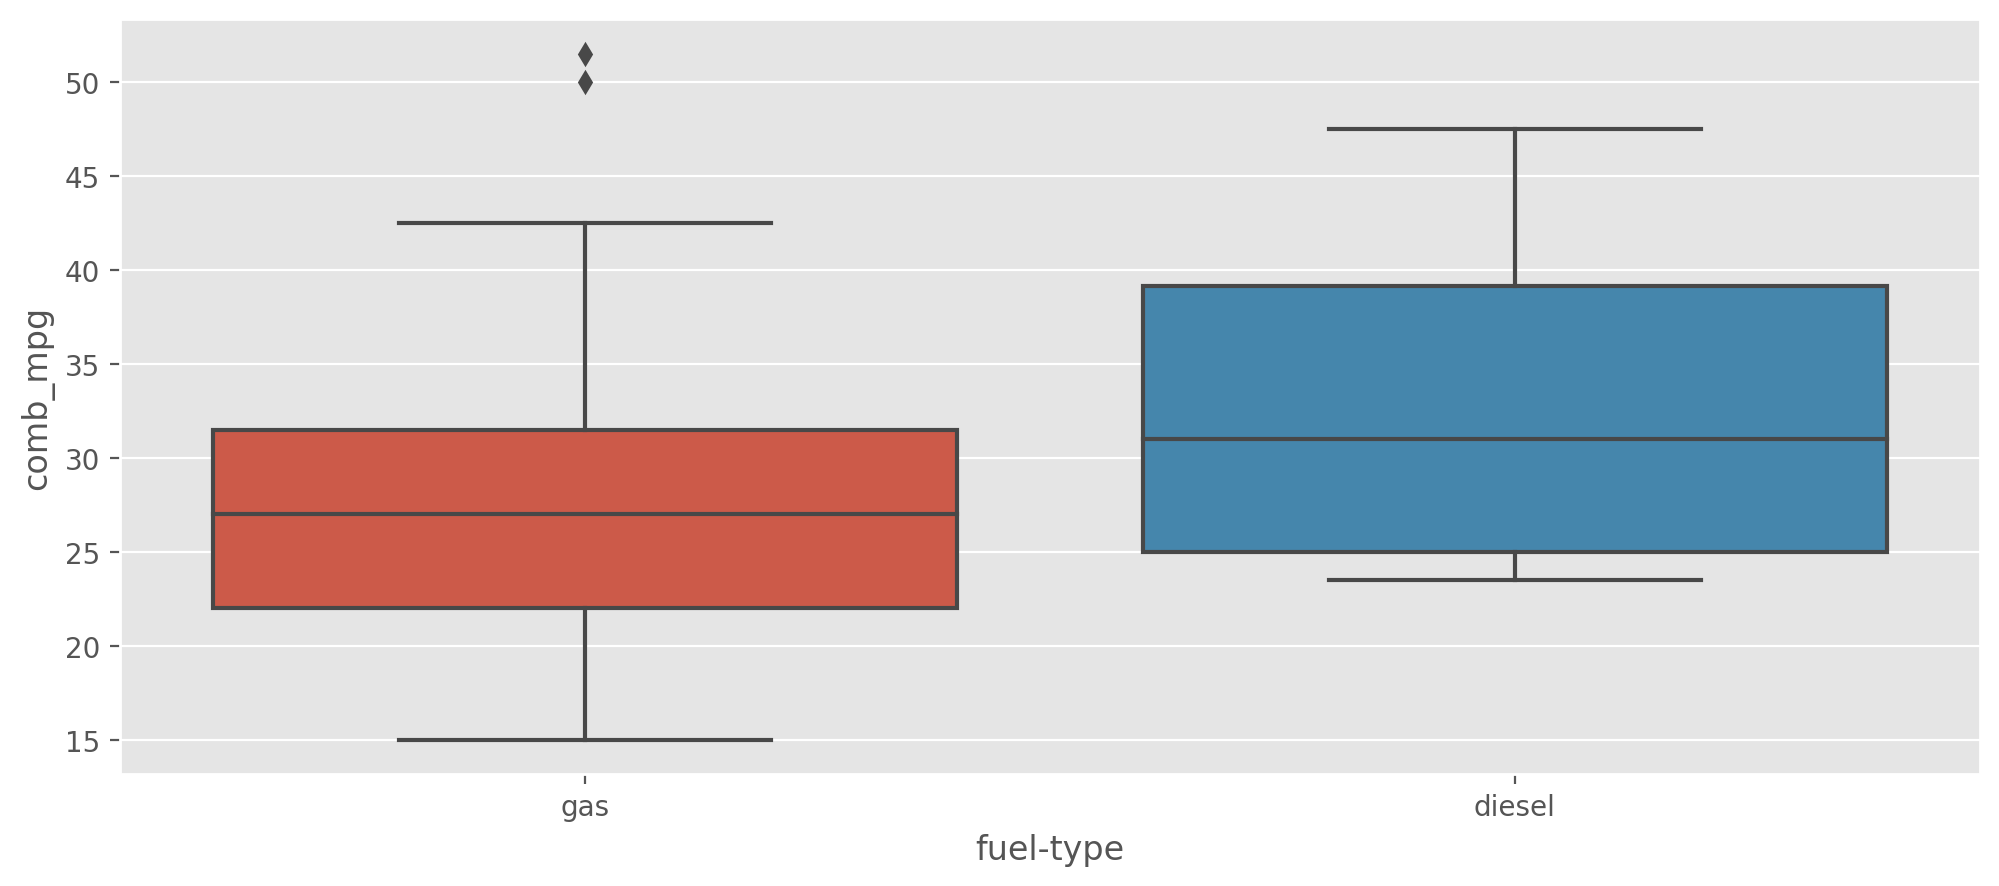

In [40]:
plt.figure(figsize = (12,5), dpi = 200)
sns.boxplot('fuel-type','comb_mpg', data = auto)

<AxesSubplot:xlabel='body-style', ylabel='price'>

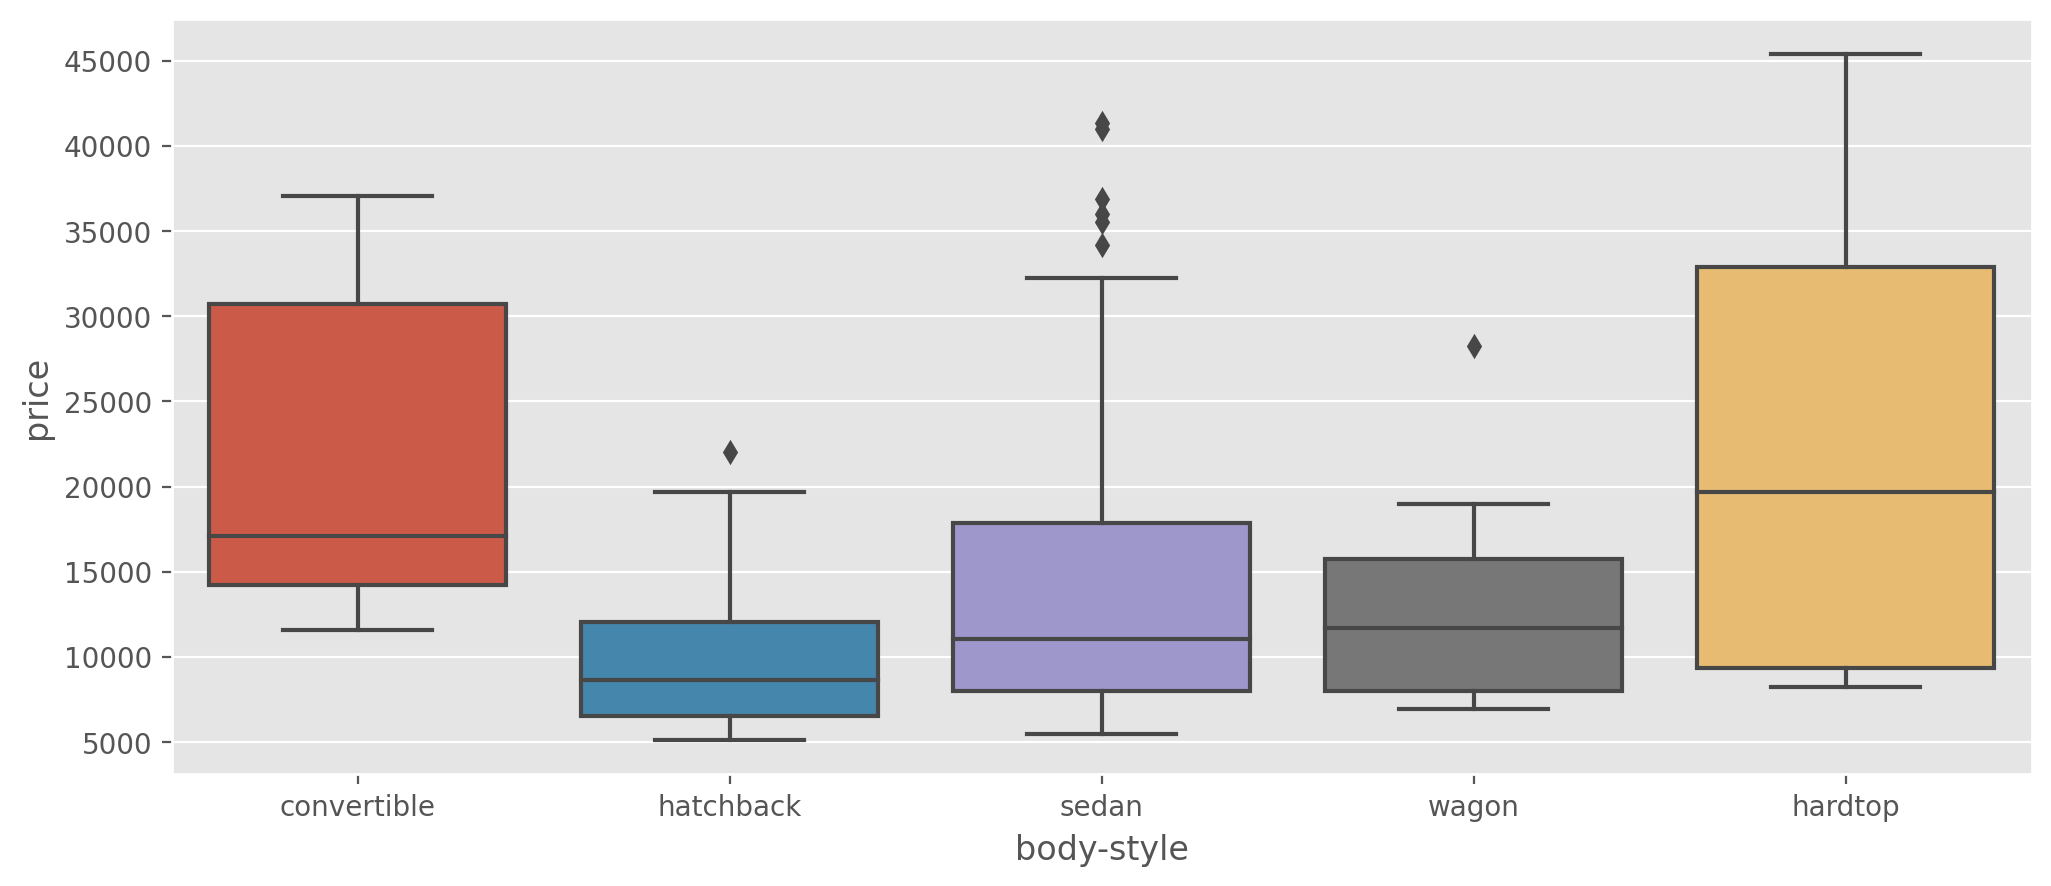

In [41]:
plt.figure(figsize = (12,5), dpi = 200)
sns.boxplot('body-style','price', data = auto)

---
## violinplot

<AxesSubplot:ylabel='price'>

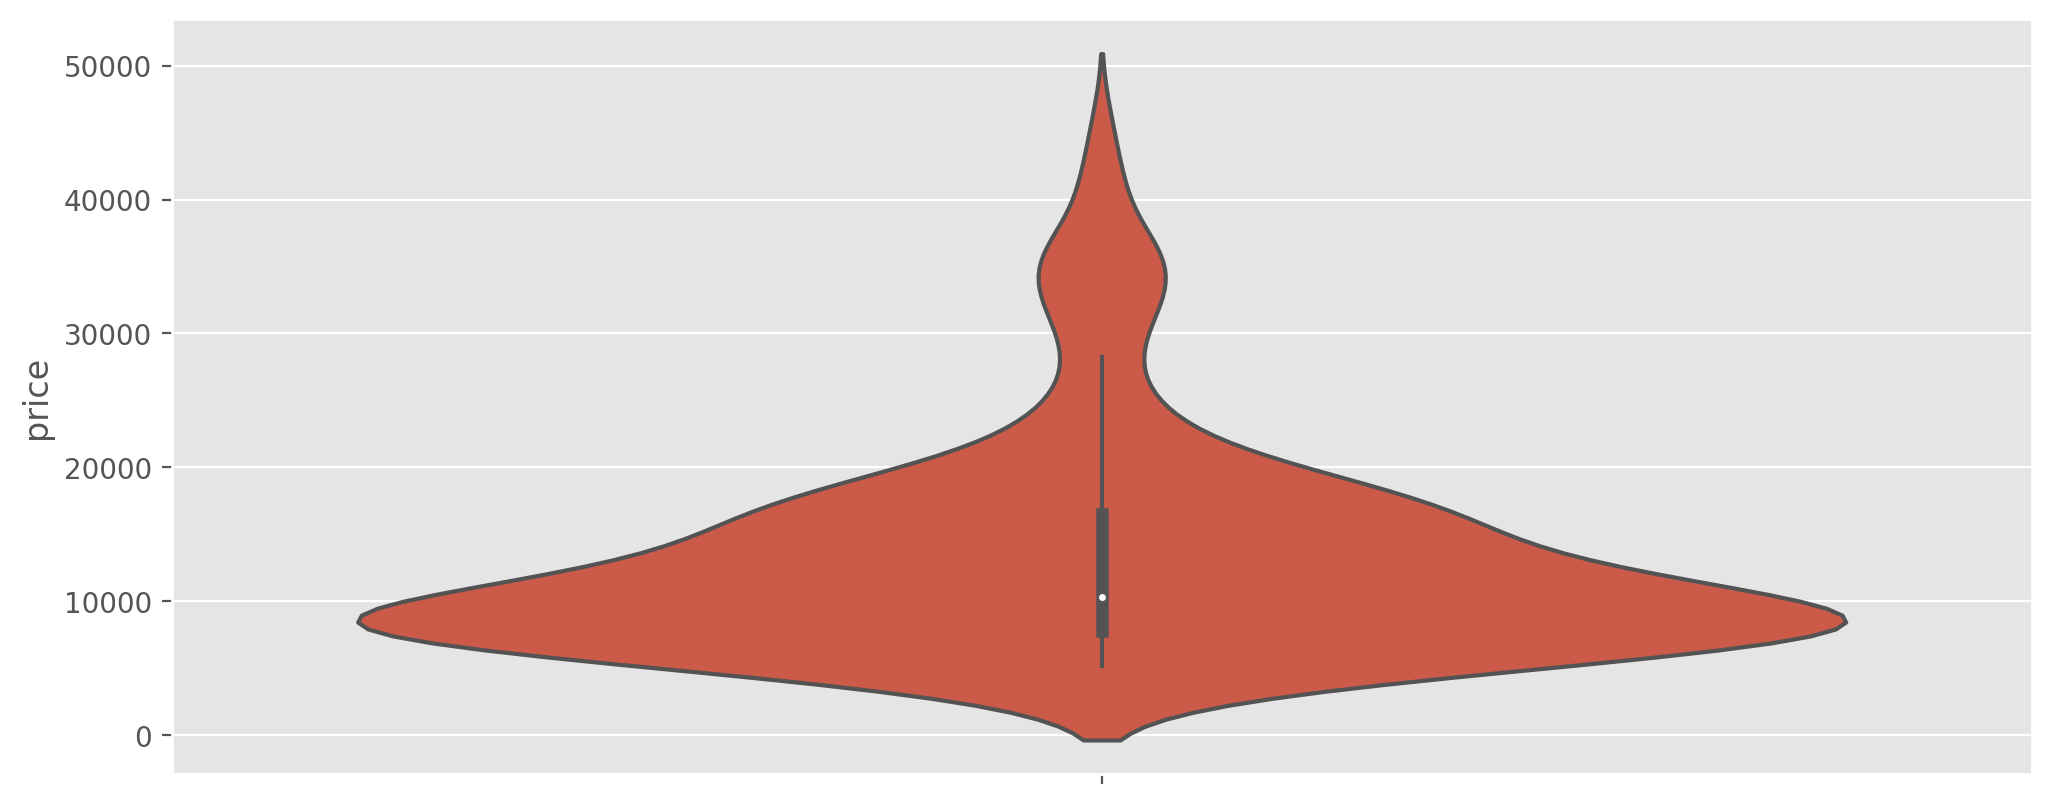

In [42]:
plt.figure(figsize = (12,5), dpi = 200)
sns.violinplot(y = 'price', data = auto)

<AxesSubplot:xlabel='fuel-type', ylabel='comb_mpg'>

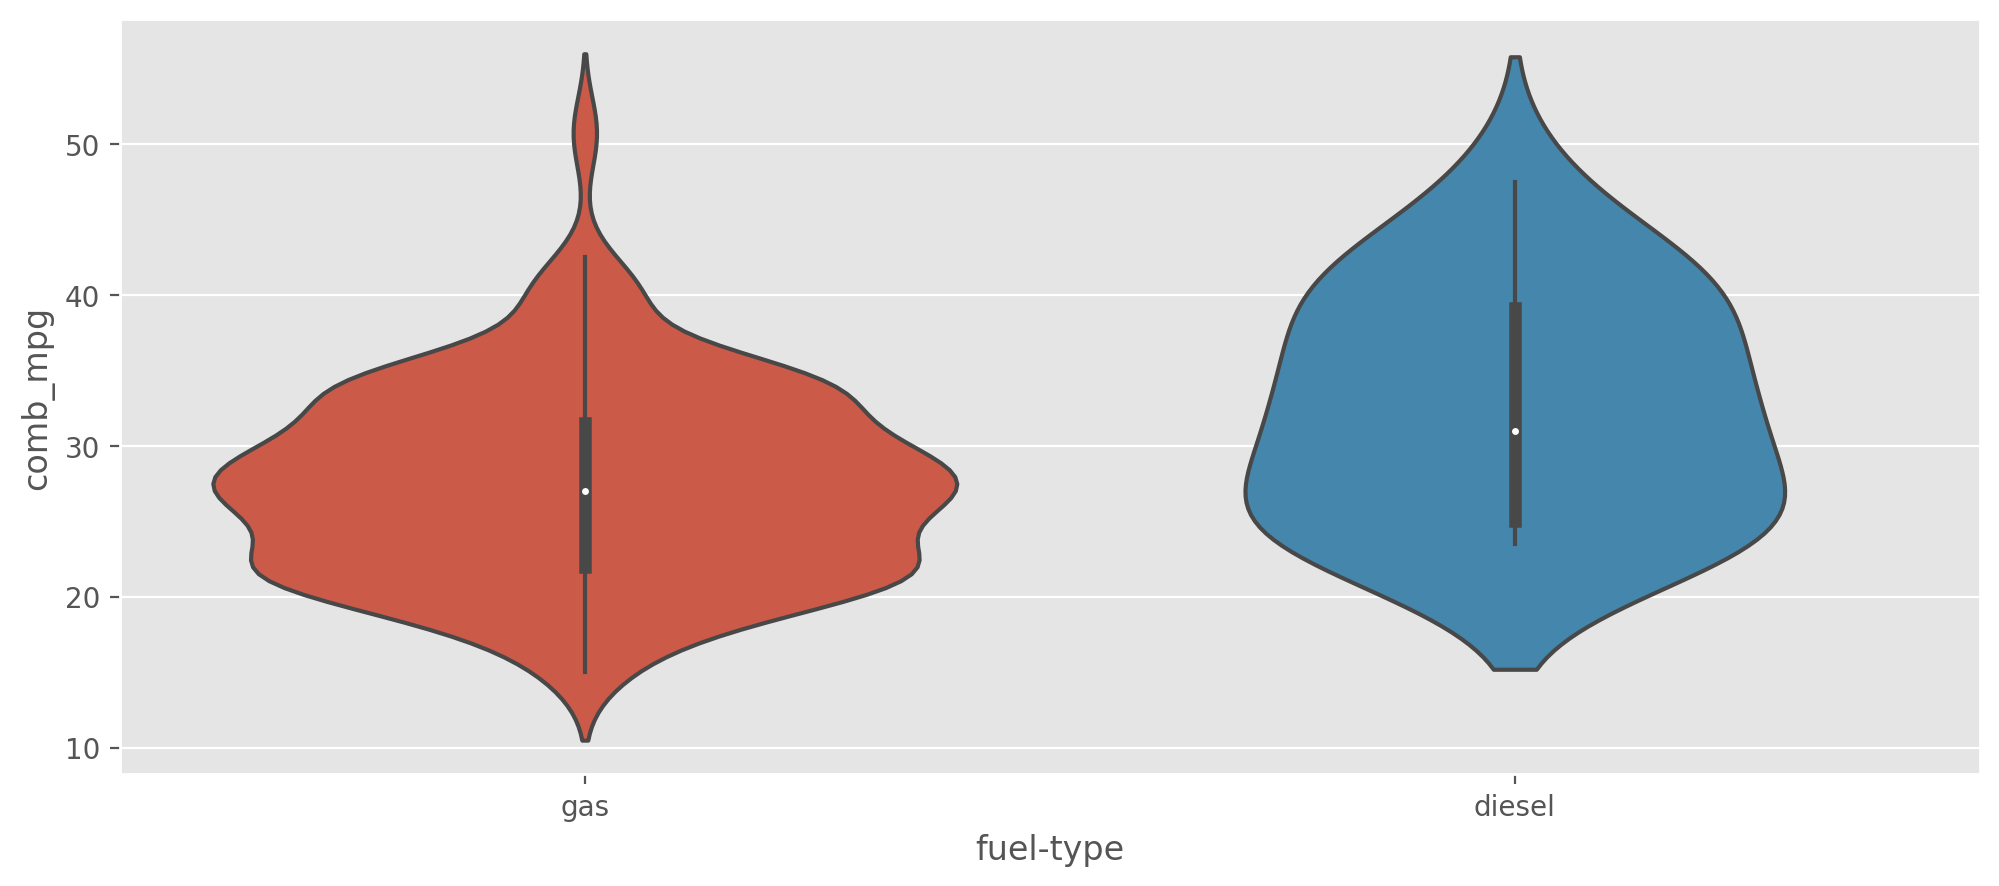

In [43]:
plt.figure(figsize = (12,5), dpi = 200)
sns.violinplot('fuel-type','comb_mpg', data = auto)

<AxesSubplot:xlabel='body-style', ylabel='price'>

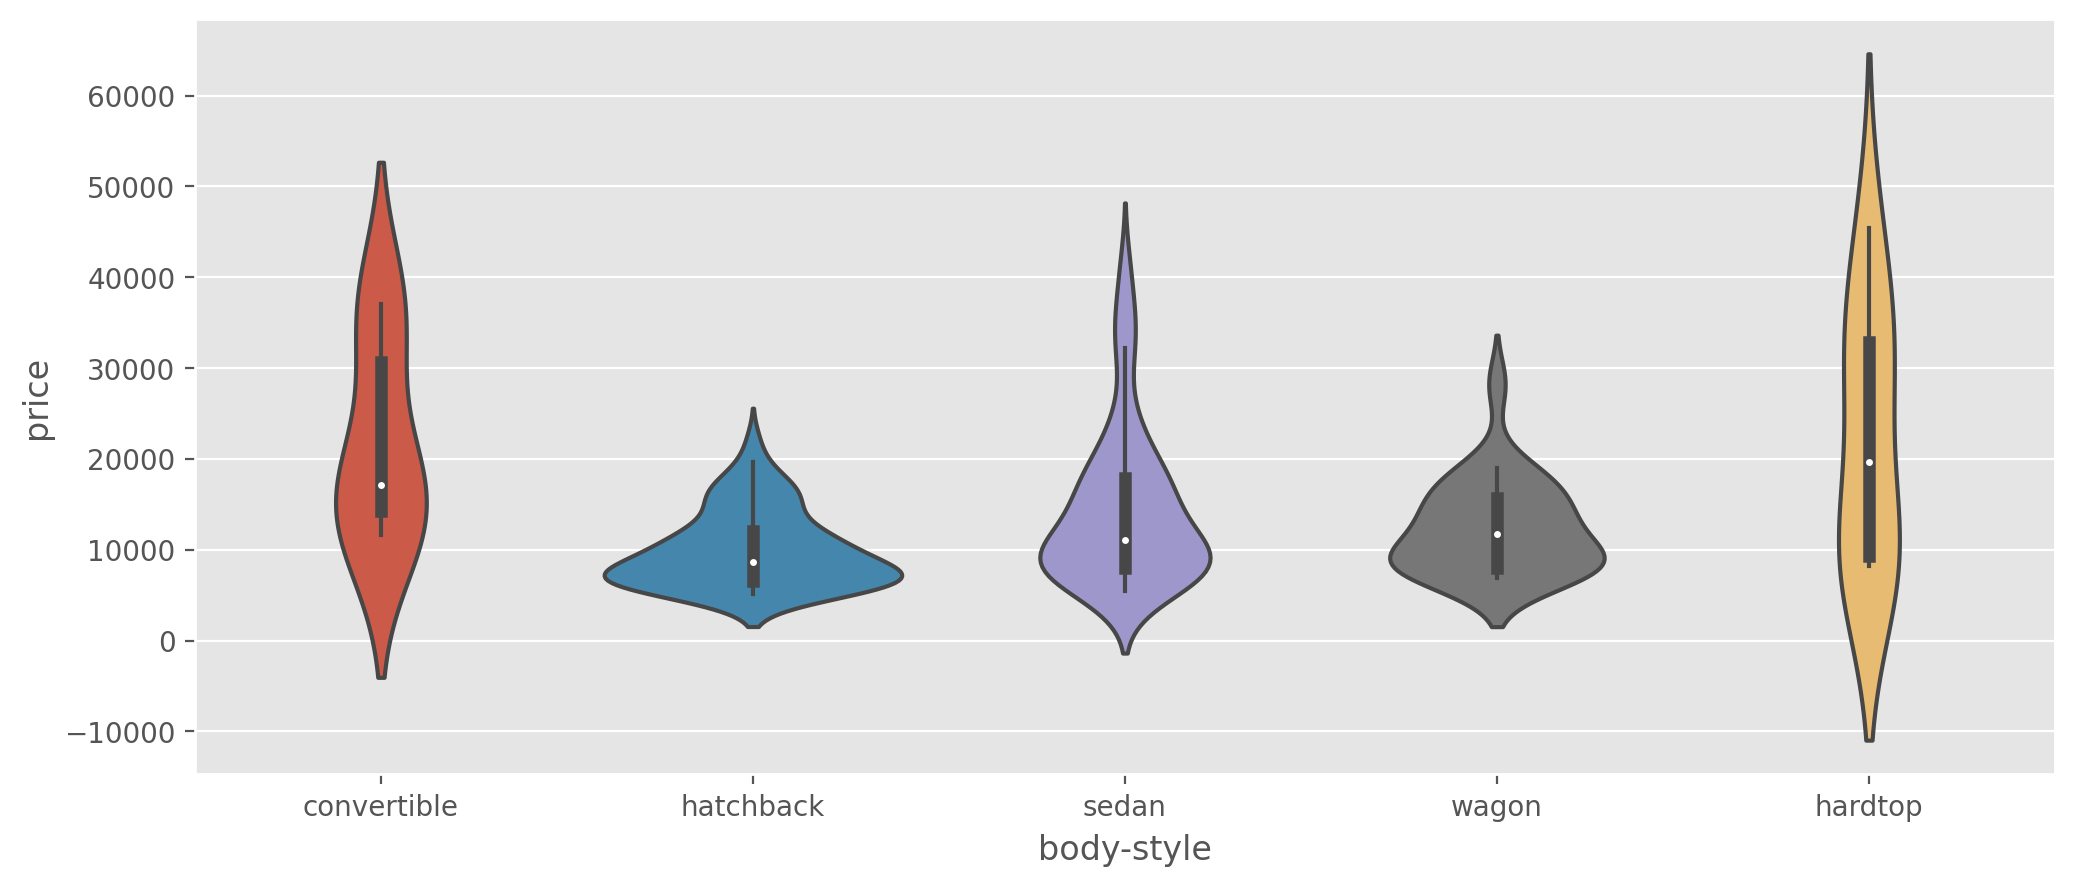

In [44]:
plt.figure(figsize = (12,5), dpi = 200)
sns.violinplot('body-style','price', data = auto)

---
## heatmap

In [45]:
auto.corr()

symboling  wheel-base    length     width    height  \
symboling           1.000000   -0.531954 -0.357612 -0.232919 -0.541038   
wheel-base         -0.531954    1.000000  0.874587  0.795144  0.589435   
length             -0.357612    0.874587  1.000000  0.841118  0.491029   
width              -0.232919    0.795144  0.841118  1.000000  0.279210   
height             -0.541038    0.589435  0.491029  0.279210  1.000000   
curb-weight        -0.227691    0.776386  0.877728  0.867032  0.295572   
engine-size        -0.105790    0.569329  0.683360  0.735433  0.067149   
compression-ratio  -0.178515    0.249786  0.158414  0.181129  0.261214   
horsepower          0.071622    0.352297  0.555003  0.642482 -0.110711   
peak-rpm            0.274573   -0.361052 -0.287325 -0.219957 -0.322272   
city-mpg           -0.035823   -0.470414 -0.670909 -0.642704 -0.048640   
highway-mpg         0.034606   -0.544082 -0.704662 -0.677218 -0.107358   
price              -0.082391    0.584642  0.690628  0.751265  0.135486   
comb_mpg            0.000297   -0.511871 -0.693200 -0.665184 -0.079321   

                   curb-weight  engine-size  compression-ratio  horsepower  \
symboling            -0.227691    -0.105790          -0.178515    0.071622   
wheel-base            0.776386     0.569329           0.249786    0.352297   
length                0.877728     0.683360           0.158414    0.555003   
width                 0.867032     0.735433           0.181129    0.642482   
height                0.295572     0.067149           0.261214   -0.110711   
curb-weight           1.000000     0.850594           0.151362    0.751034   
engine-size           0.850594     1.000000           0.028971    0.810773   
compression-ratio     0.151362     0.028971           1.000000   -0.205874   
horsepower            0.751034     0.810773          -0.205874    1.000000   
peak-rpm             -0.266306    -0.244618          -0.436221    0.130971   
city-mpg             -0.757414    -0.653658           0.324701   -0.803620   
highway-mpg          -0.797465    -0.677470           0.265201   -0.770908   
price                 0.834415     0.872335           0.071107    0.810533   
comb_mpg             -0.783584    -0.670689           0.296318   -0.792399   

                   peak-rpm  city-mpg  highway-mpg     price  comb_mpg  
symboling          0.274573 -0.035823     0.034606 -0.082391  0.000297  
wheel-base        -0.361052 -0.470414    -0.544082  0.584642 -0.511871  
length            -0.287325 -0.670909    -0.704662  0.690628 -0.693200  
width             -0.219957 -0.642704    -0.677218  0.751265 -0.665184  
height            -0.322272 -0.048640    -0.107358  0.135486 -0.079321  
curb-weight       -0.266306 -0.757414    -0.797465  0.834415 -0.783584  
engine-size       -0.244618 -0.653658    -0.677470  0.872335 -0.670689  
compression-ratio -0.436221  0.324701     0.265201  0.071107  0.296318  
horsepower         0.130971 -0.803620    -0.770908  0.810533 -0.792399  
peak-rpm           1.000000 -0.113788    -0.054257 -0.101649 -0.083839  
city-mpg          -0.113788  1.000000     0.971337 -0.686571  0.992434  
highway-mpg       -0.054257  0.971337     1.000000 -0.704692  0.993174  
price             -0.101649 -0.686571    -0.704692  1.000000 -0.700811  
comb_mpg          -0.083839  0.992434     0.993174 -0.700811  1.000000

<AxesSubplot:>

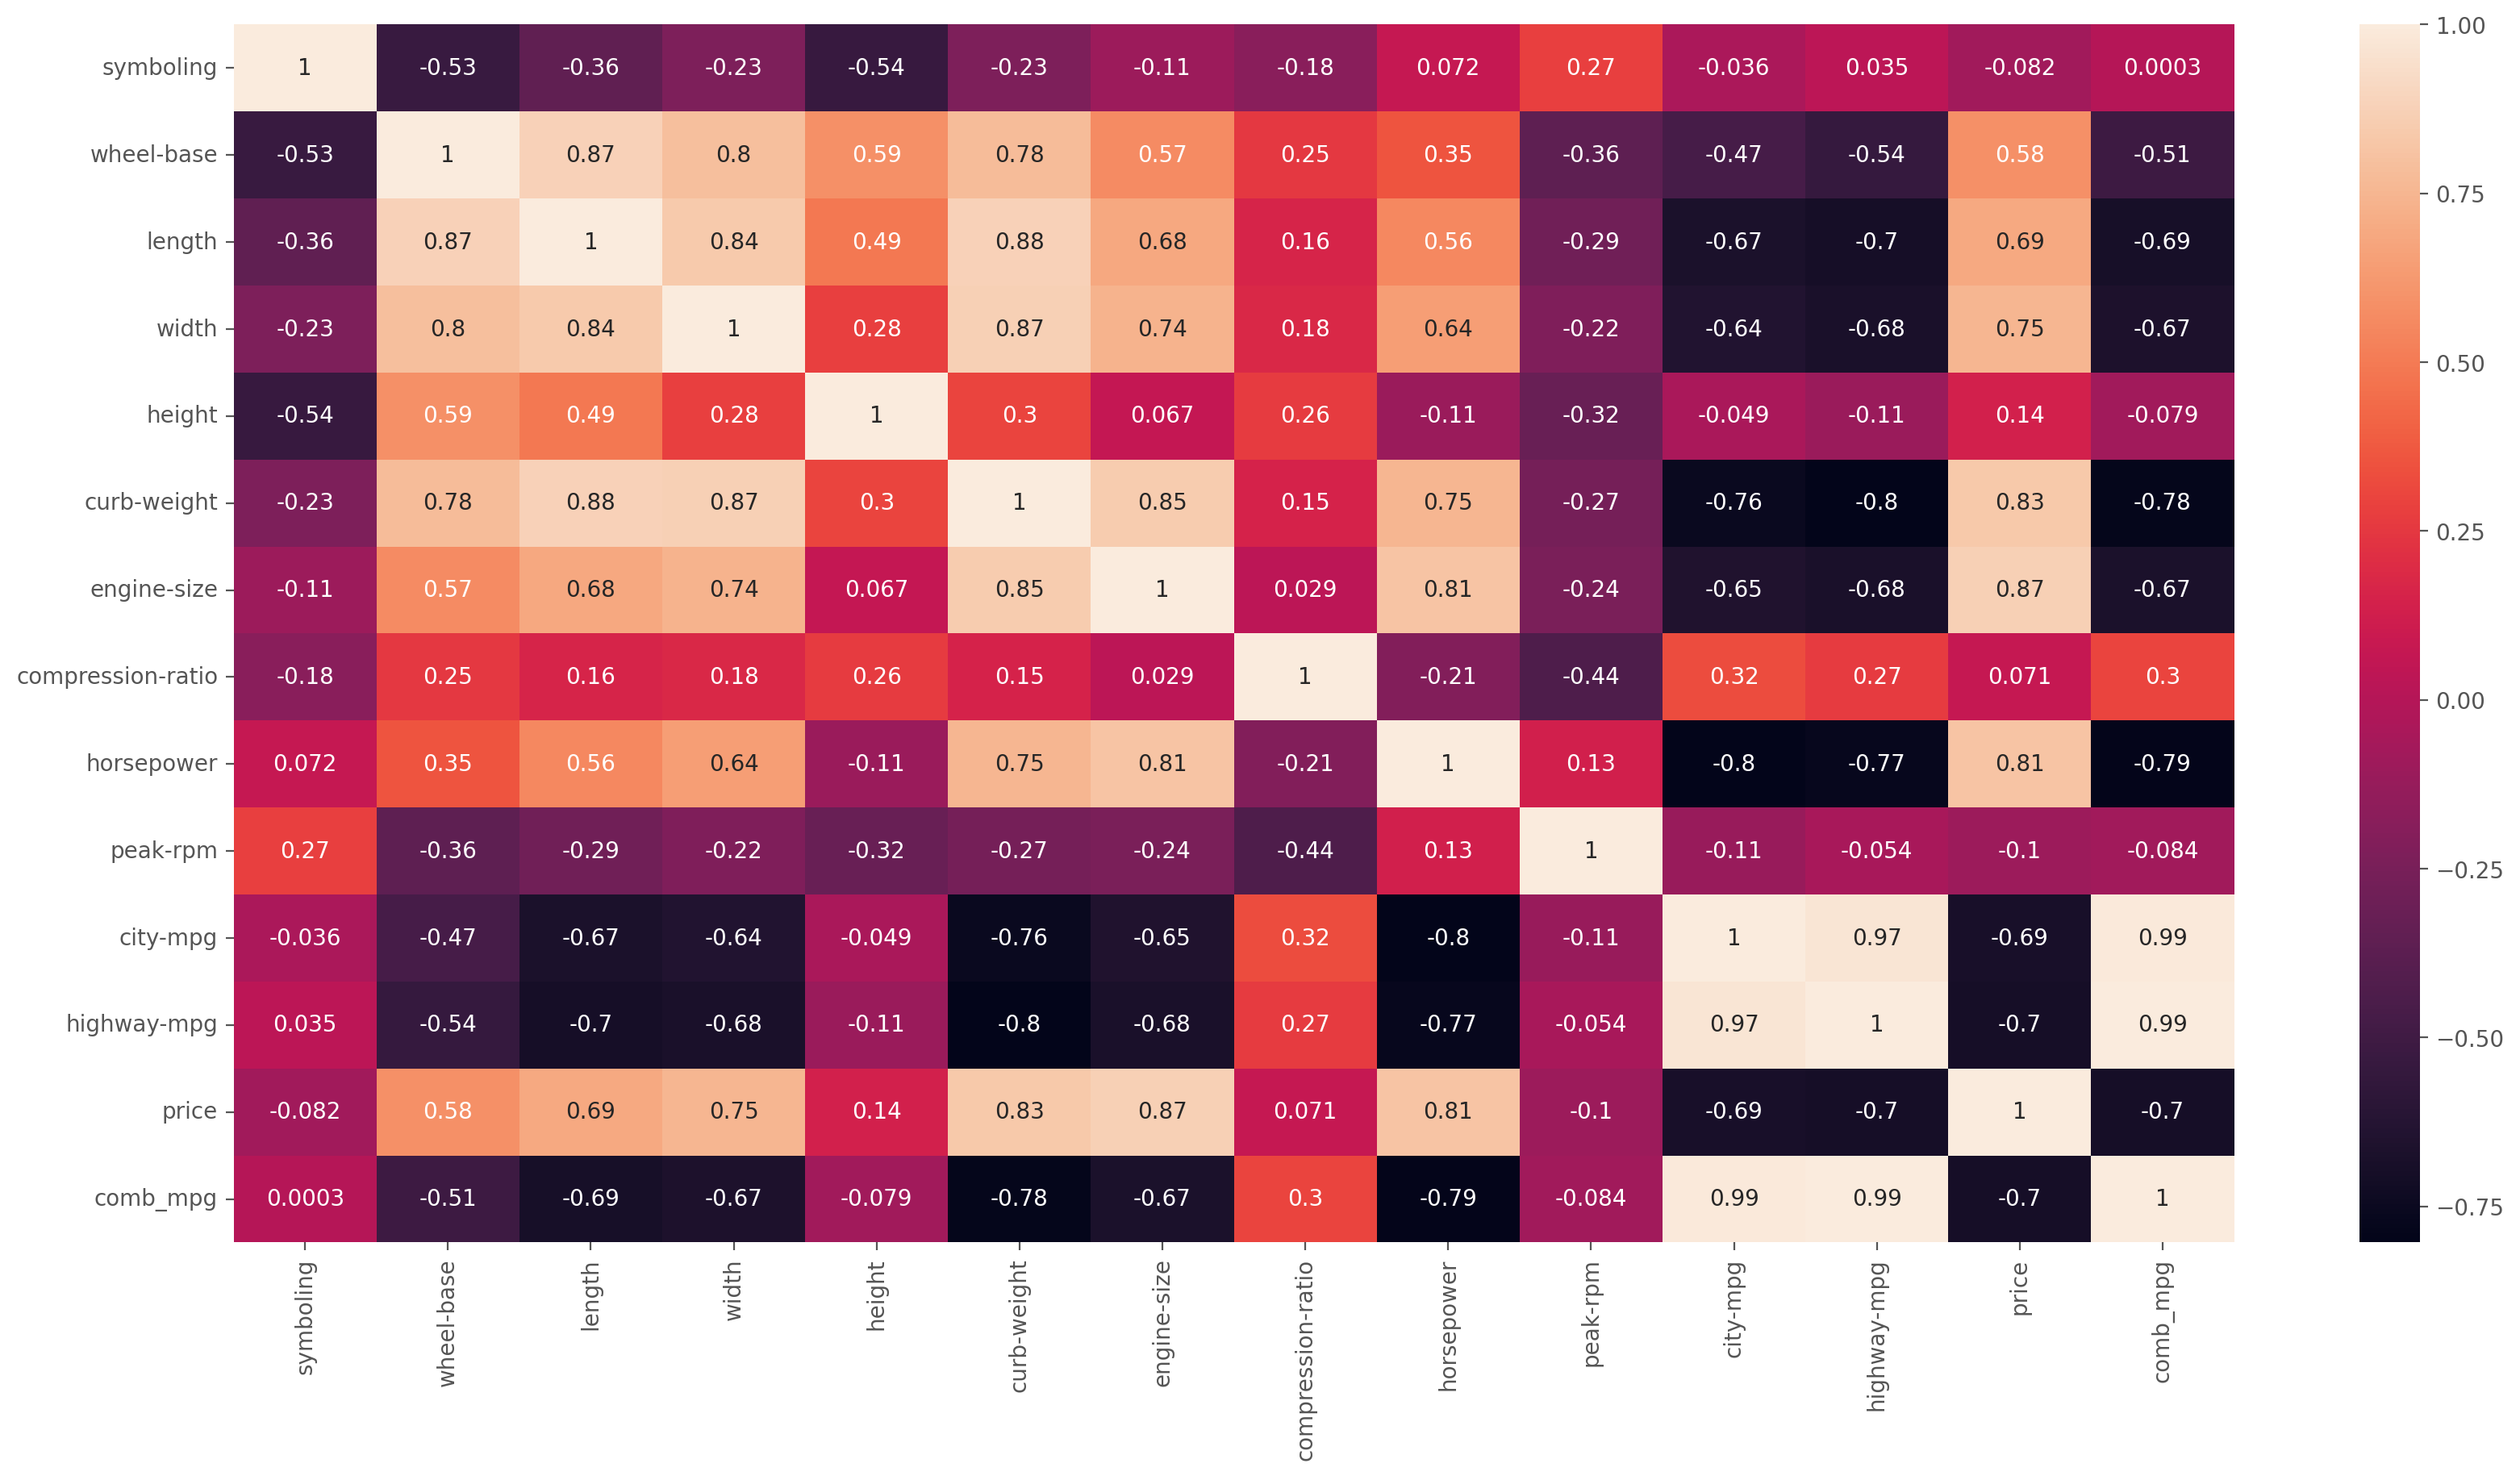

In [46]:
plt.figure(figsize = (20,10), dpi = 200)
sns.heatmap(auto.corr(), annot = True)

In [47]:
cols = ['engine-size', 'curb-weight', 'city-mpg', 'highway-mpg', 'comb_mpg', 'horsepower', 'peak-rpm', 'price']
auto[cols].corr()

engine-size  curb-weight  city-mpg  highway-mpg  comb_mpg  \
engine-size     1.000000     0.850594 -0.653658    -0.677470 -0.670689   
curb-weight     0.850594     1.000000 -0.757414    -0.797465 -0.783584   
city-mpg       -0.653658    -0.757414  1.000000     0.971337  0.992434   
highway-mpg    -0.677470    -0.797465  0.971337     1.000000  0.993174   
comb_mpg       -0.670689    -0.783584  0.992434     0.993174  1.000000   
horsepower      0.810773     0.751034 -0.803620    -0.770908 -0.792399   
peak-rpm       -0.244618    -0.266306 -0.113788    -0.054257 -0.083839   
price           0.872335     0.834415 -0.686571    -0.704692 -0.700811   

             horsepower  peak-rpm     price  
engine-size    0.810773 -0.244618  0.872335  
curb-weight    0.751034 -0.266306  0.834415  
city-mpg      -0.803620 -0.113788 -0.686571  
highway-mpg   -0.770908 -0.054257 -0.704692  
comb_mpg      -0.792399 -0.083839 -0.700811  
horsepower     1.000000  0.130971  0.810533  
peak-rpm       0.130971  1.000000 -0.101649  
price          0.810533 -0.101649  1.000000

<AxesSubplot:>

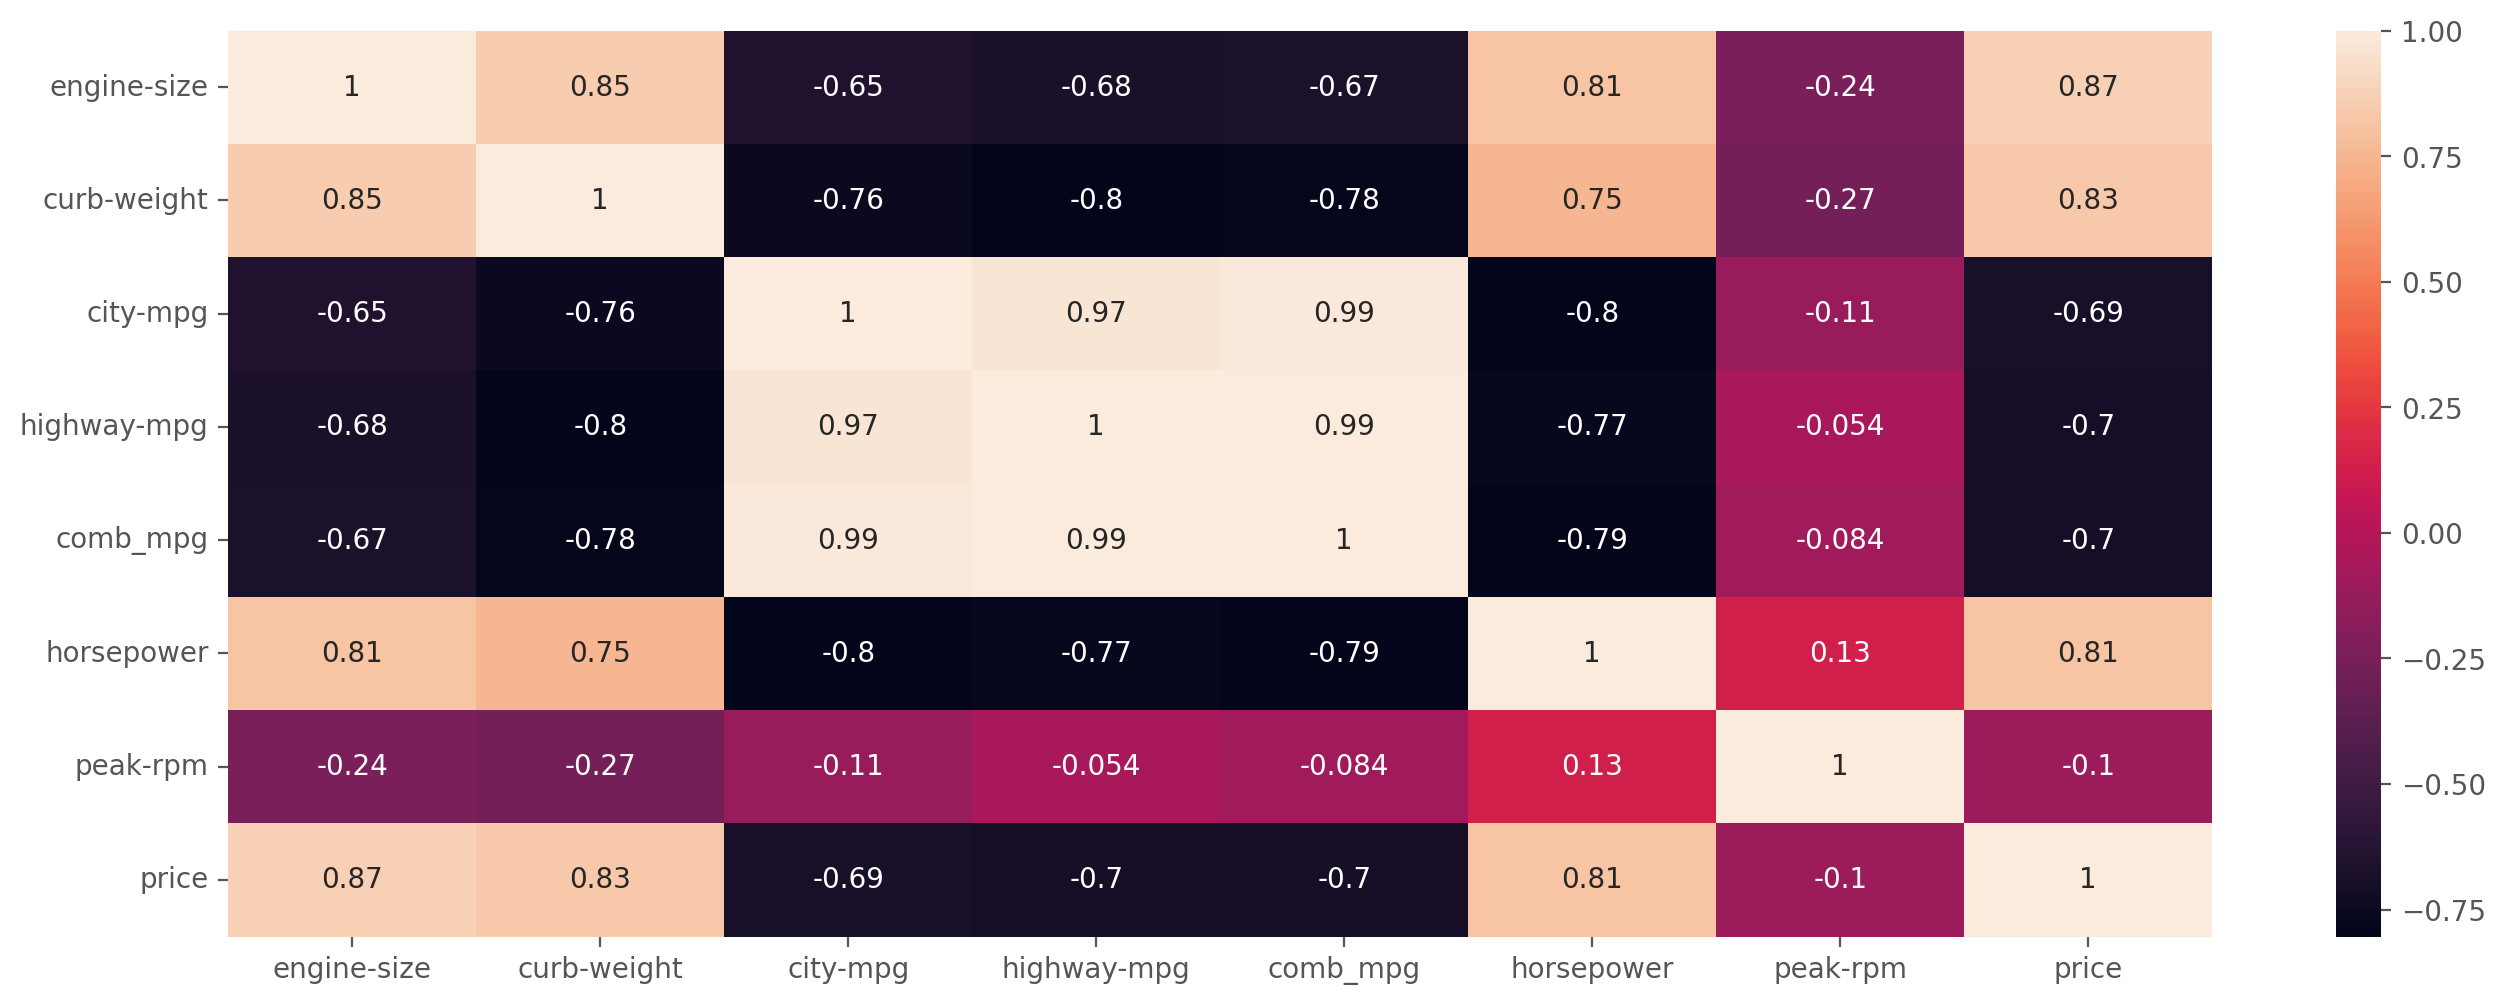

In [48]:
plt.figure(figsize = (16,6), dpi = 200)
sns.heatmap(auto[cols].corr(), annot = True)

## Distplot
- Used to plot distribution of a continuous numerical variable

<AxesSubplot:xlabel='price', ylabel='Density'>

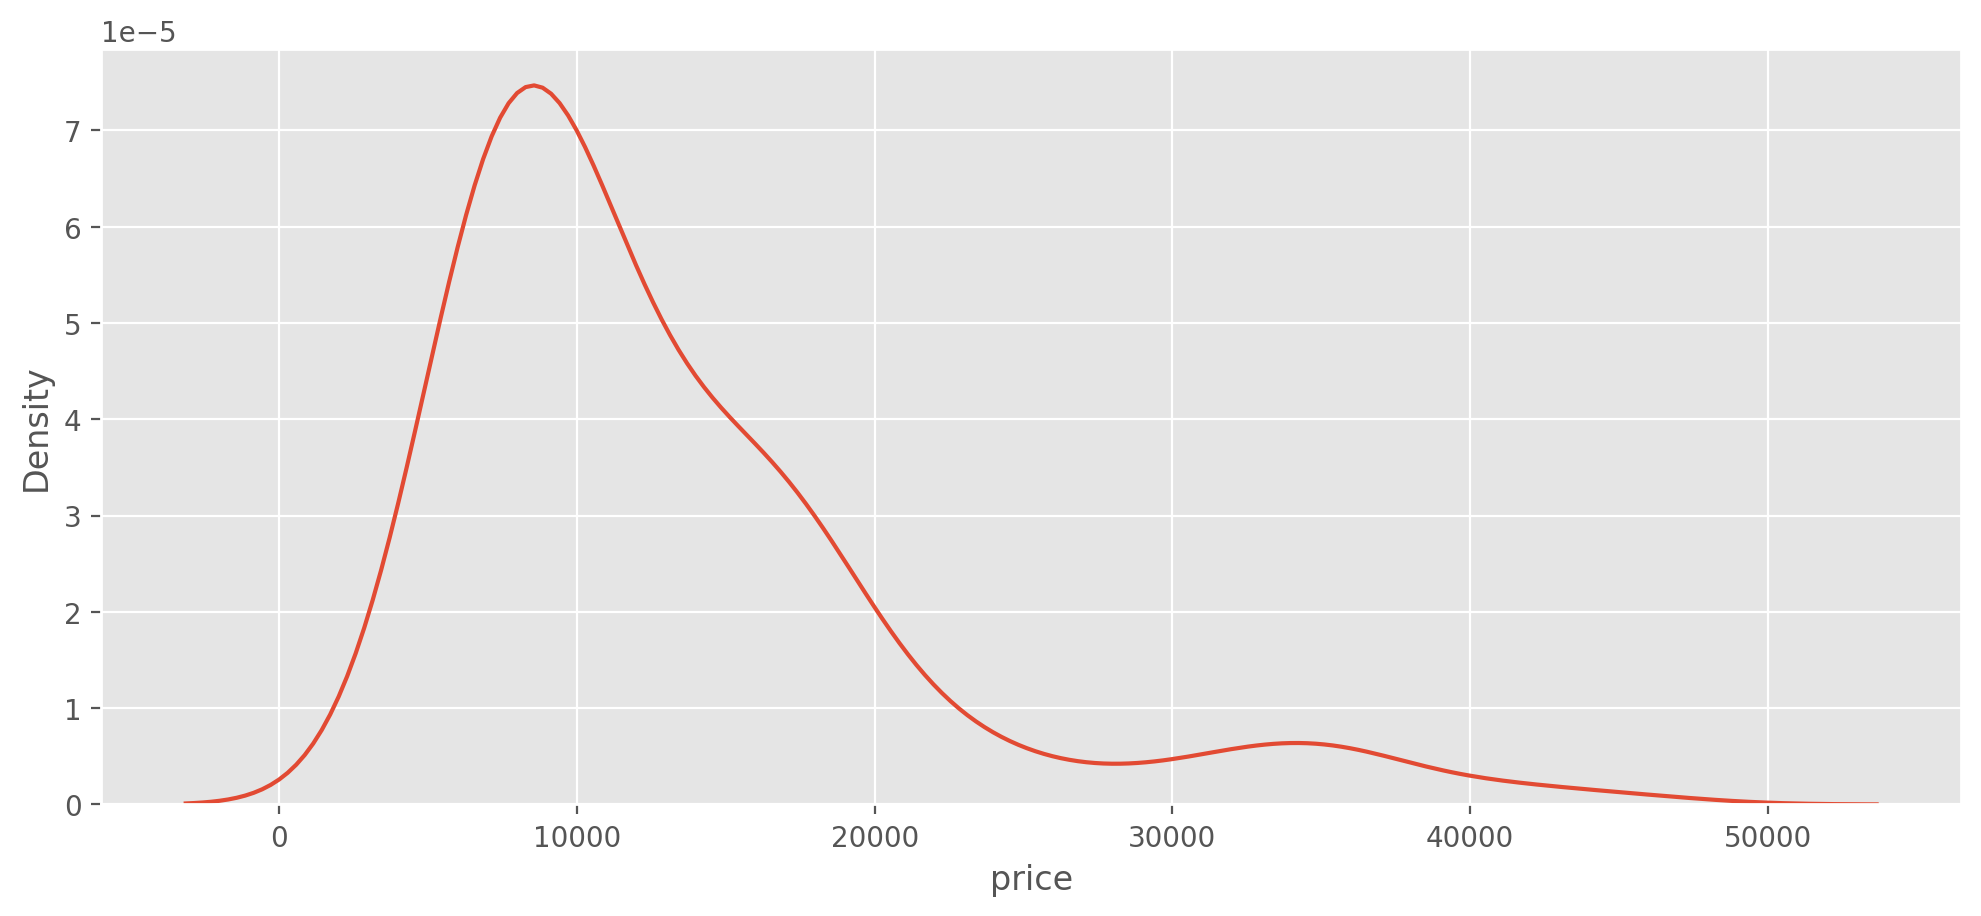

In [49]:
plt.figure(figsize = (12,5), dpi = 200)
sns.distplot(auto.price, hist = False)

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

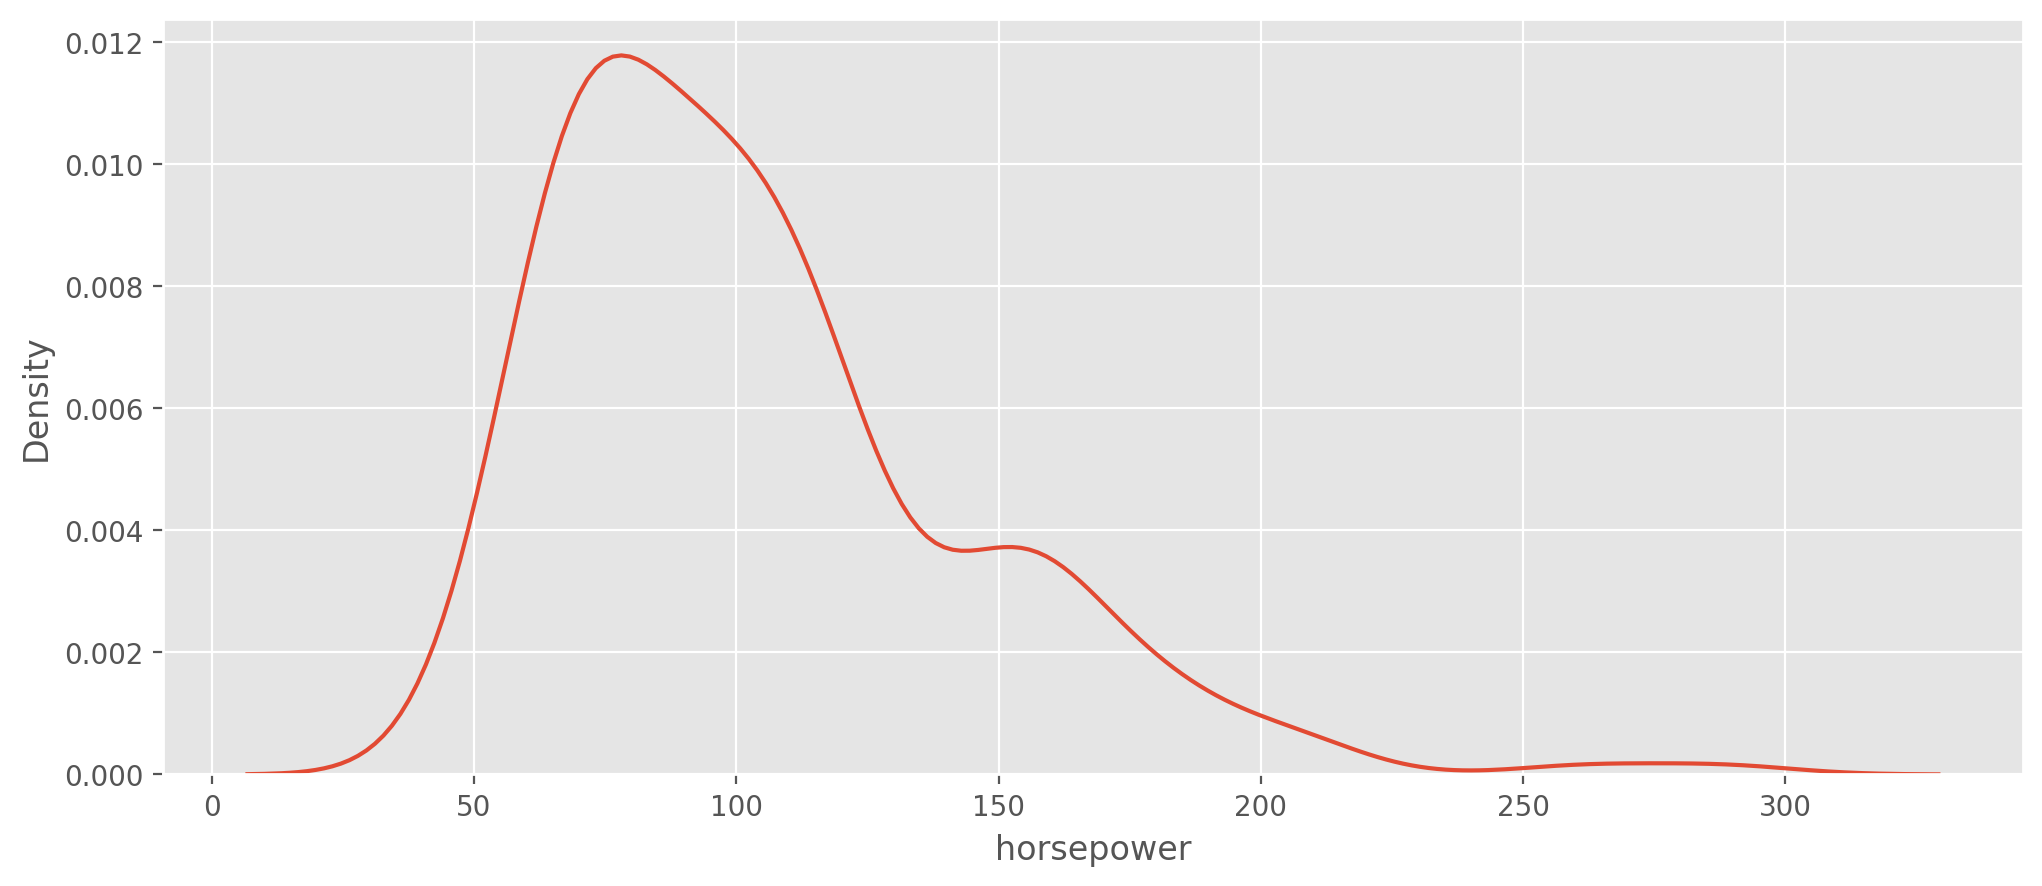

In [50]:
plt.figure(figsize = (12,5), dpi = 200)
sns.distplot(auto.horsepower, hist = False)

----
----

## Pairplot

<Figure size 6000x4000 with 0 Axes>

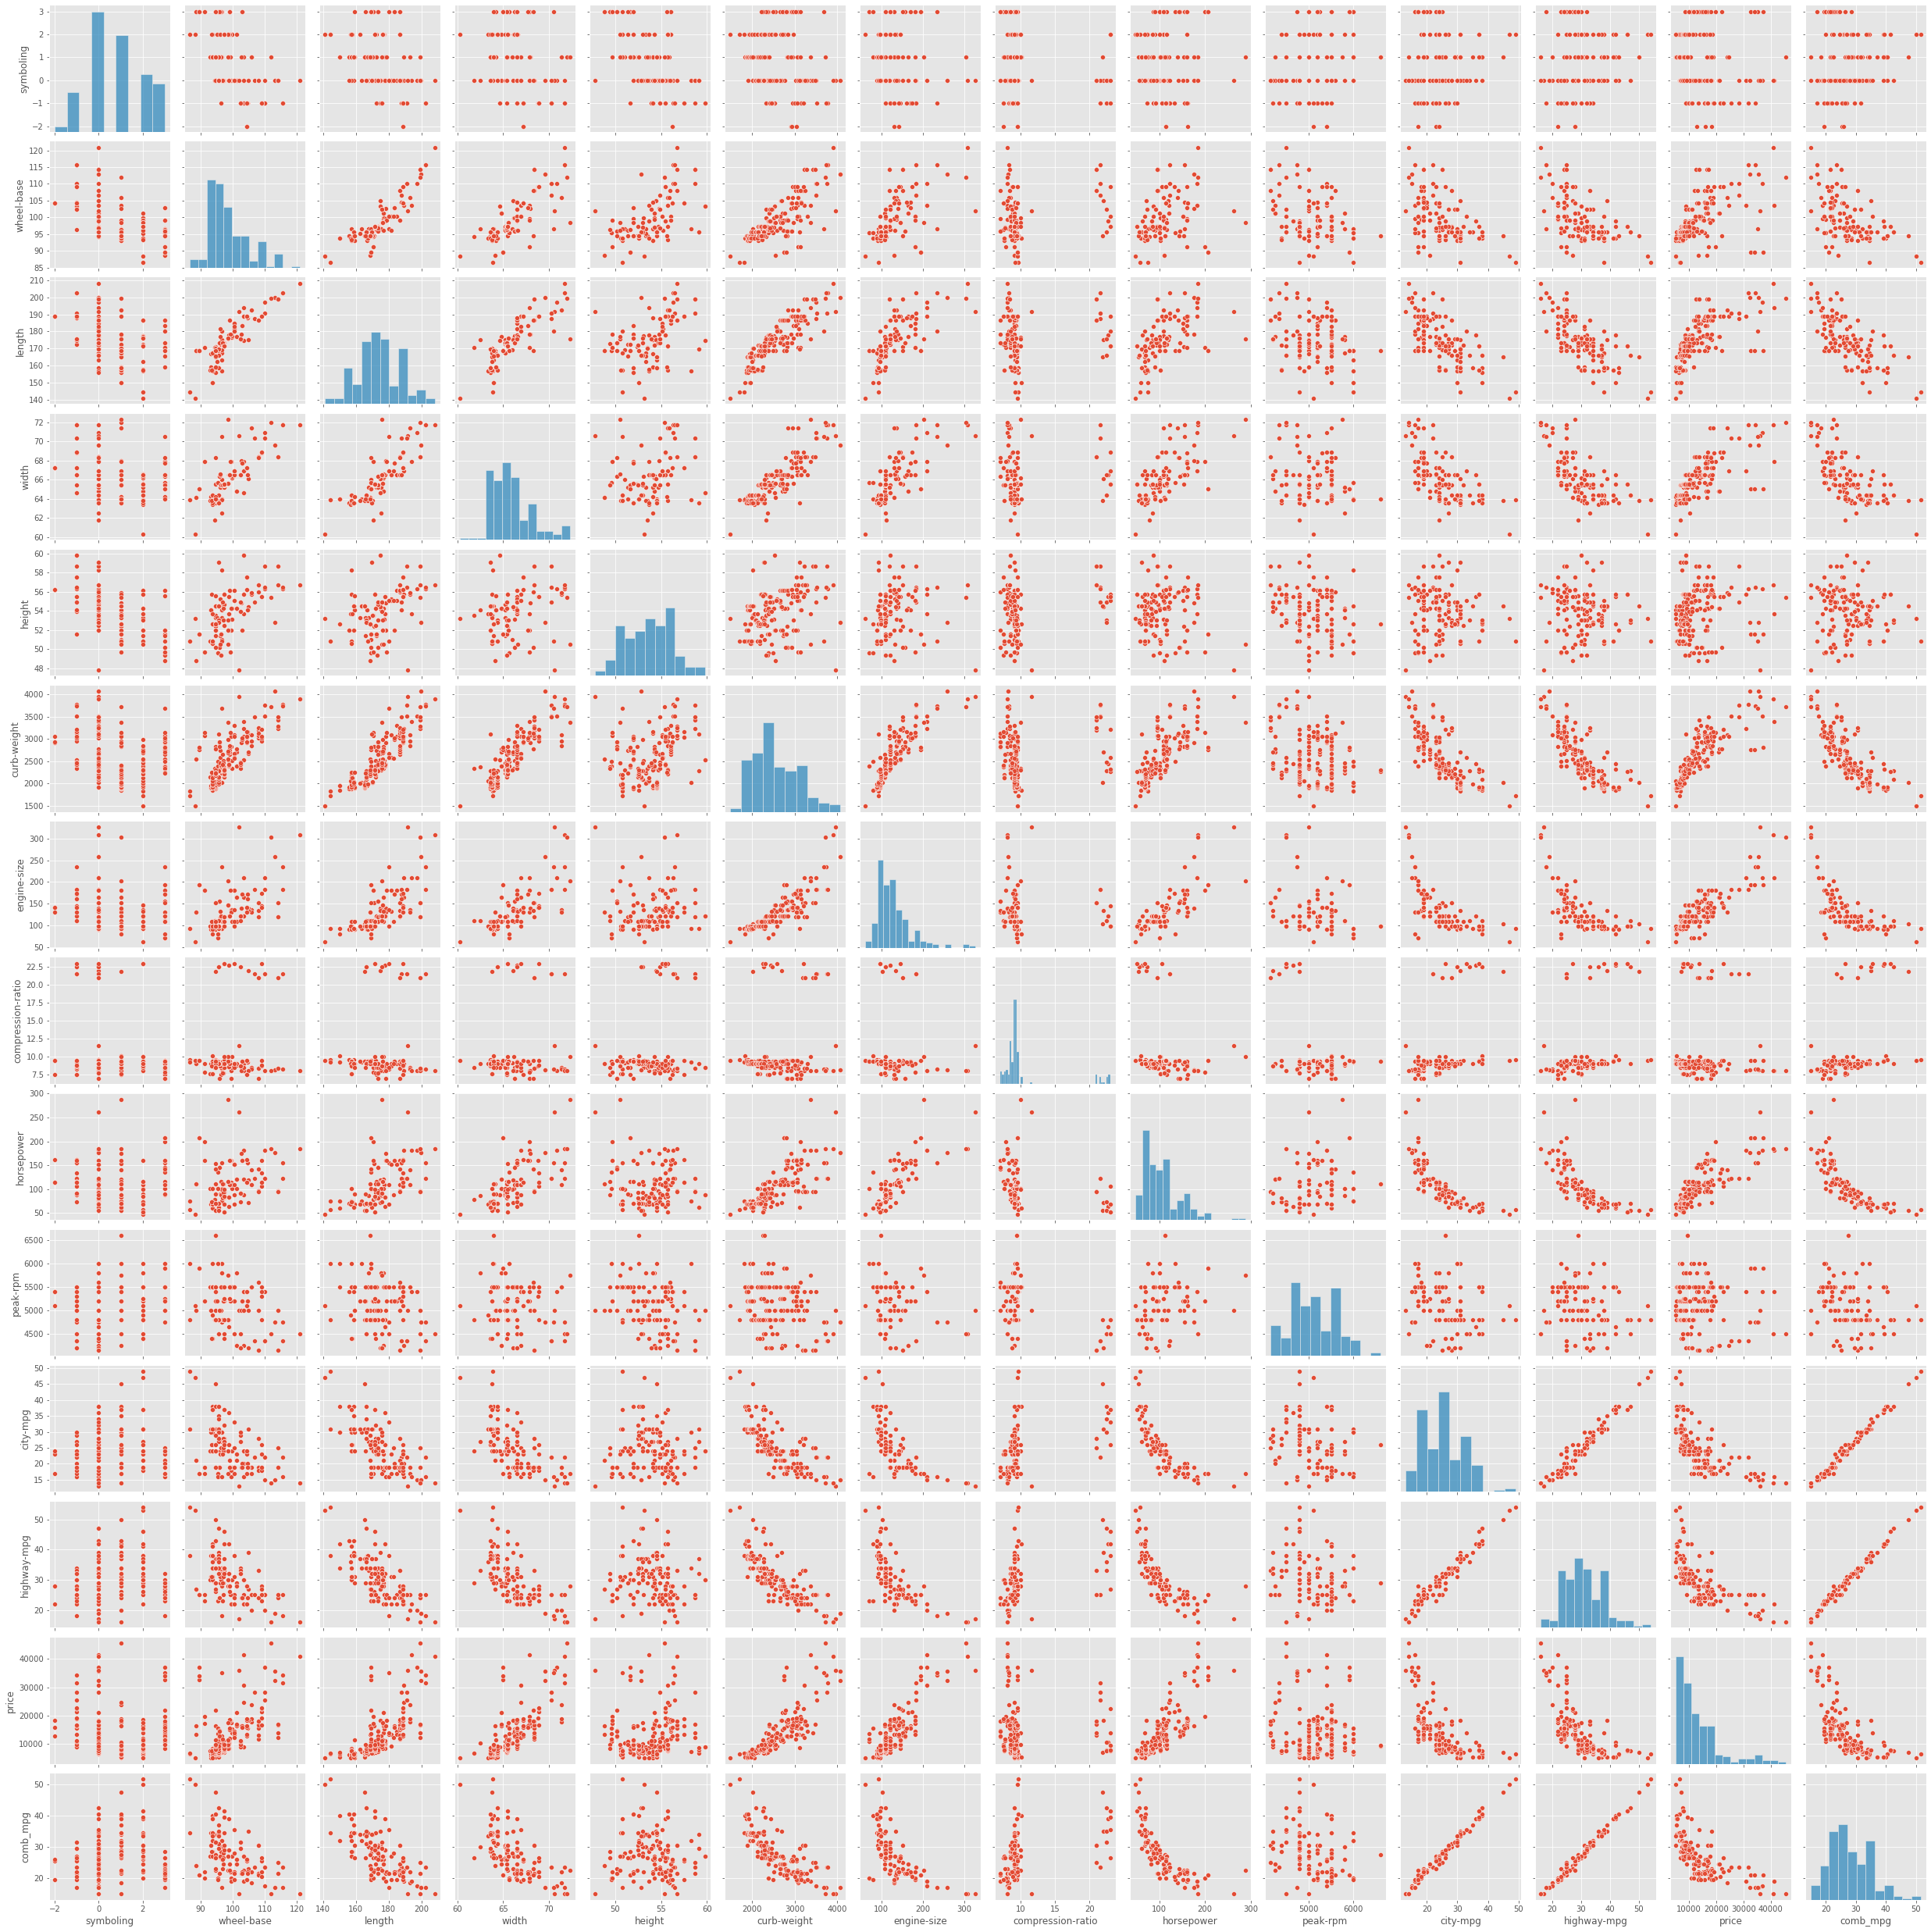

In [51]:
plt.figure(dpi = 1000)
sns.pairplot(auto)

<Figure size 432x288 with 0 Axes>

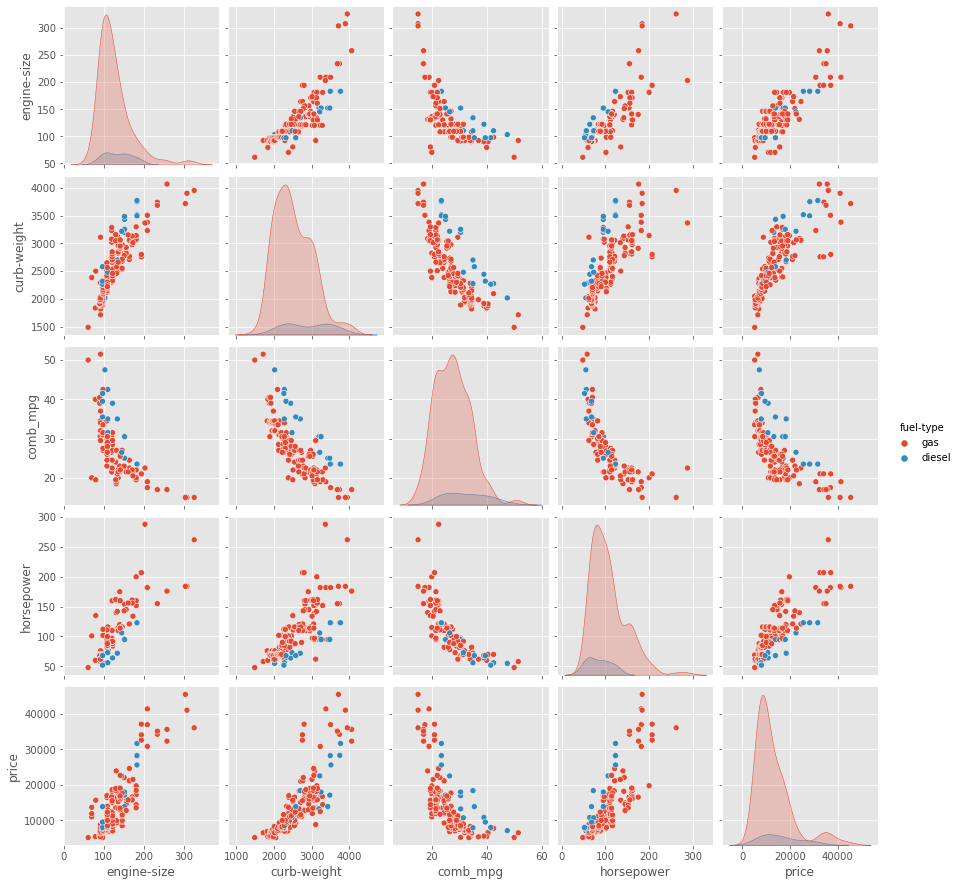

In [57]:
cols = ['engine-size', 'curb-weight', 'comb_mpg', 'horsepower', 'price', 'fuel-type']
plt.figure()
sns.pairplot(auto[cols], hue = 'fuel-type')

<Figure size 432x288 with 0 Axes>

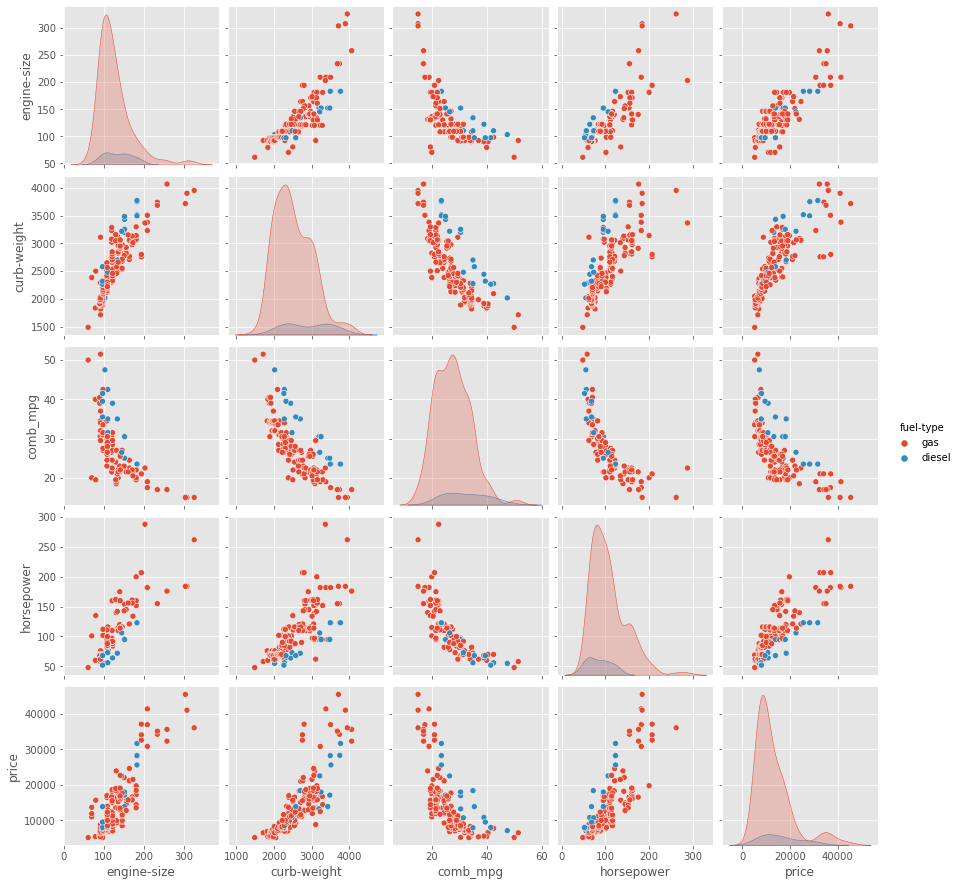

In [58]:
# Saving a figure
cols = ['engine-size', 'curb-weight', 'comb_mpg', 'horsepower', 'price', 'fuel-type']
plt.figure()
sns.pairplot(auto[cols], hue = 'fuel-type')
plt.savefig('pairplot', dpi = 1000)

### Relplot

<Figure size 3000x2000 with 0 Axes>

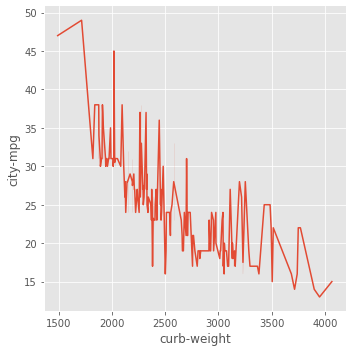

In [59]:
plt.figure(dpi = 500)
sns.relplot('curb-weight', 'city-mpg', data = auto, kind = 'line')

<Figure size 3000x2000 with 0 Axes>

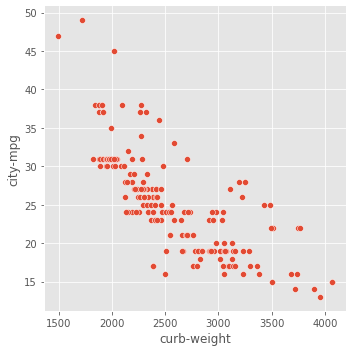

In [60]:
plt.figure(dpi = 500)
sns.relplot('curb-weight', 'city-mpg', data = auto, kind = 'scatter')

<Figure size 3000x2000 with 0 Axes>

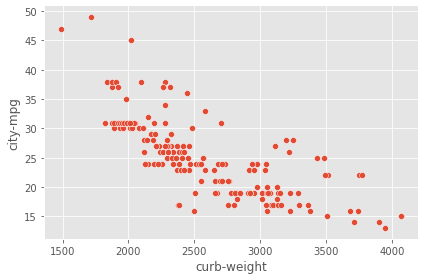

In [64]:
plt.figure(dpi = 500)
sns.relplot('curb-weight', 'city-mpg', data = auto, kind = 'scatter', height = 4, aspect = 1.5)

<Figure size 3000x2000 with 0 Axes>

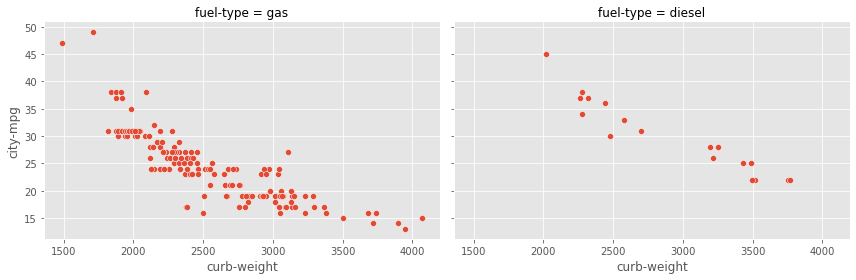

In [65]:
plt.figure(dpi = 500)
sns.relplot('curb-weight', 'city-mpg', data = auto, kind = 'scatter', height = 4, aspect = 1.5, col = 'fuel-type')

<Figure size 3000x2000 with 0 Axes>

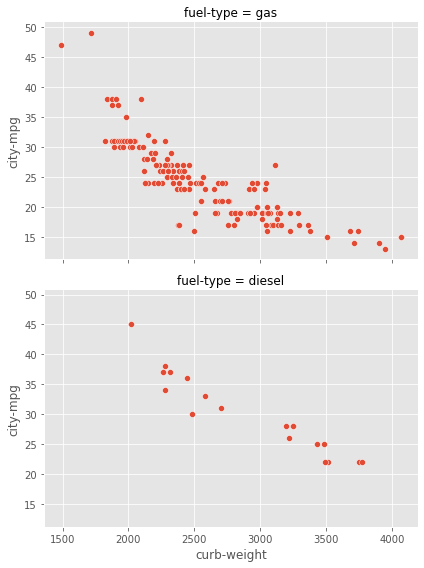

In [66]:
plt.figure(dpi = 500)
sns.relplot('curb-weight', 'city-mpg', data = auto, kind = 'scatter', height = 4, aspect = 1.5, row = 'fuel-type')

<Figure size 3000x2000 with 0 Axes>

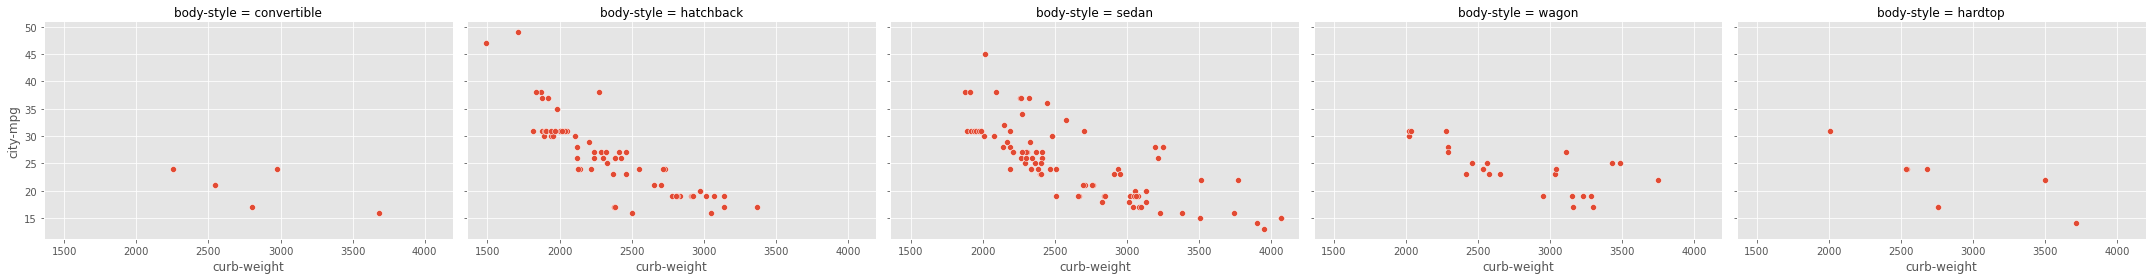

In [67]:
plt.figure(dpi = 500)
sns.relplot('curb-weight', 'city-mpg', data = auto, kind = 'scatter', height = 4, aspect = 1.5, col = 'body-style')

<Figure size 3000x2000 with 0 Axes>

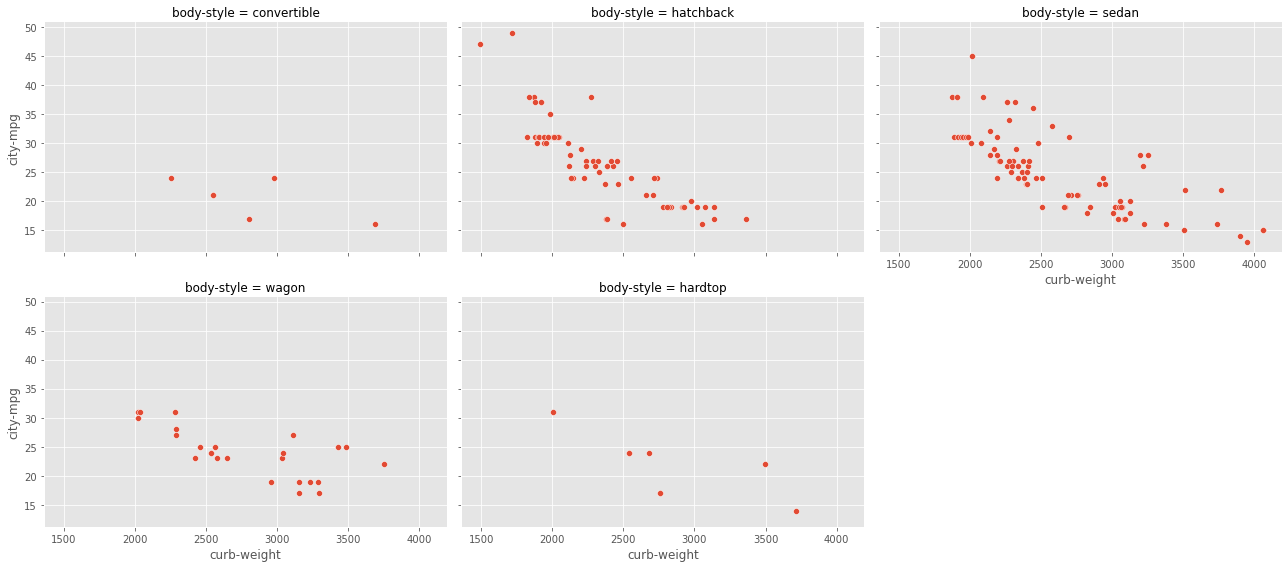

In [68]:
plt.figure(dpi = 500)
sns.relplot('curb-weight', 'city-mpg', data = auto, kind = 'scatter', height = 4, aspect = 1.5, col = 'body-style', col_wrap = 3)

<Figure size 3000x2000 with 0 Axes>

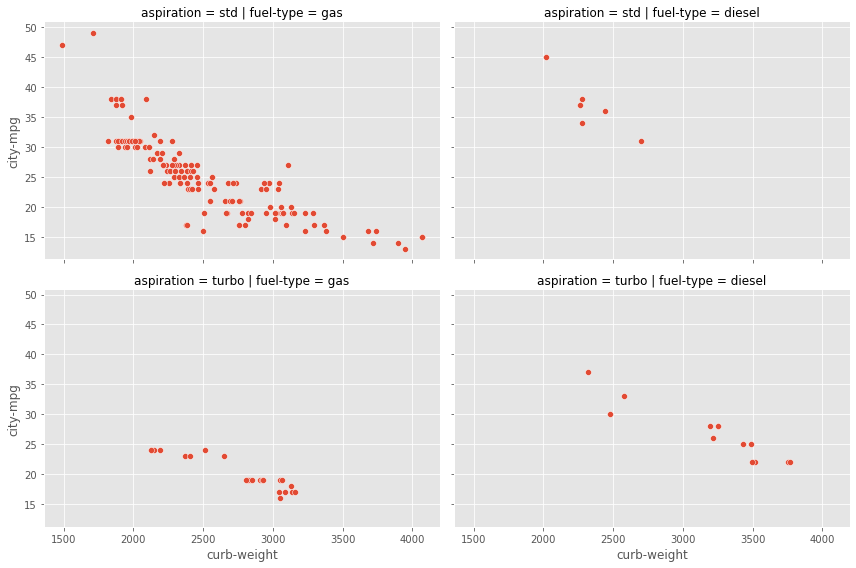

In [69]:
plt.figure(dpi = 500)
sns.relplot('curb-weight', 'city-mpg', data = auto, kind = 'scatter', height = 4, aspect = 1.5, col = 'fuel-type', row = 'aspiration')

----
### Creating subplots

<AxesSubplot:ylabel='horsepower'>

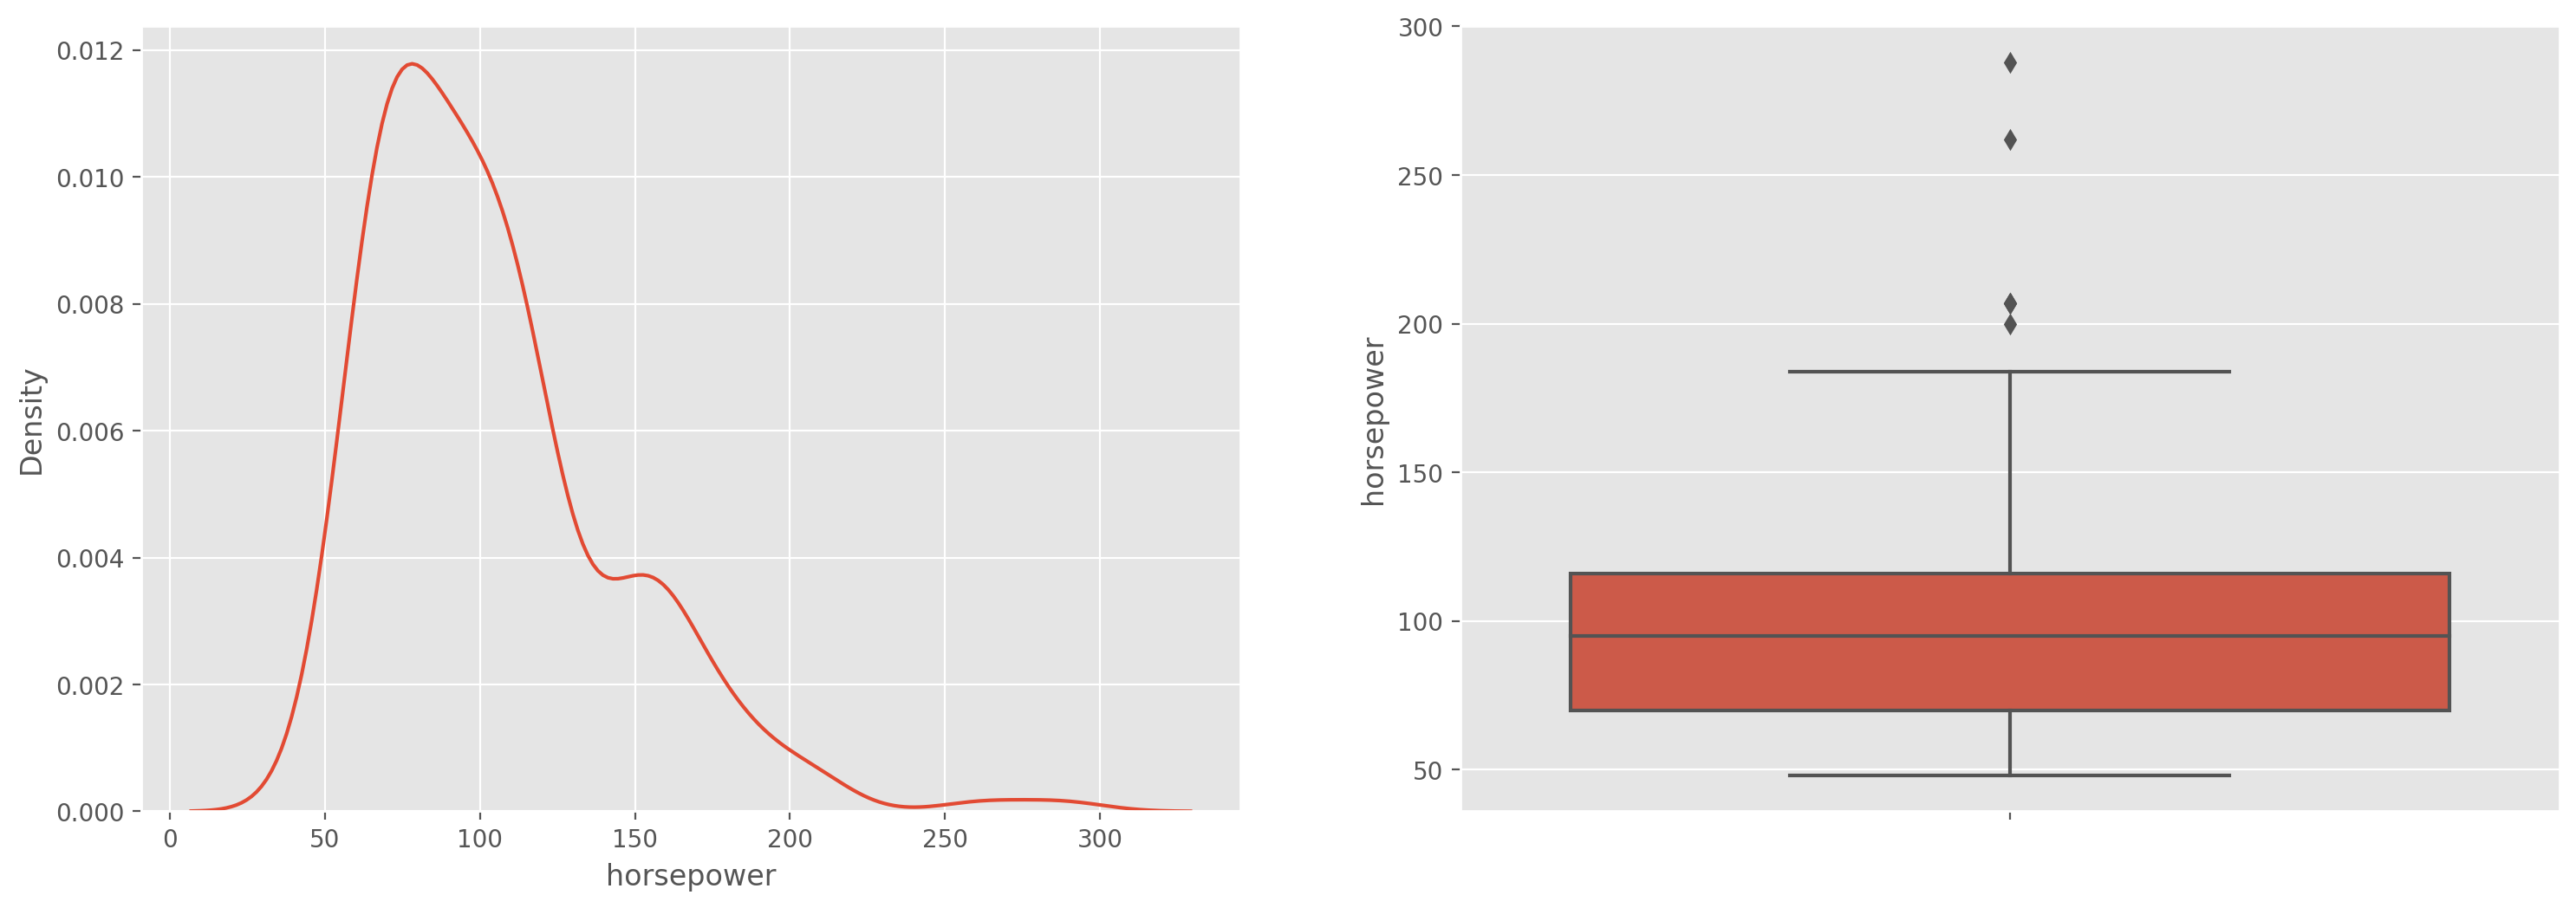

In [70]:
plt.figure(figsize = (18,6), dpi = 200)

plt.subplot(1,2,1)
sns.distplot(auto.horsepower, hist = False)
plt.subplot(1,2,2)
sns.boxplot(y = auto.horsepower)

<AxesSubplot:xlabel='body-style', ylabel='price'>

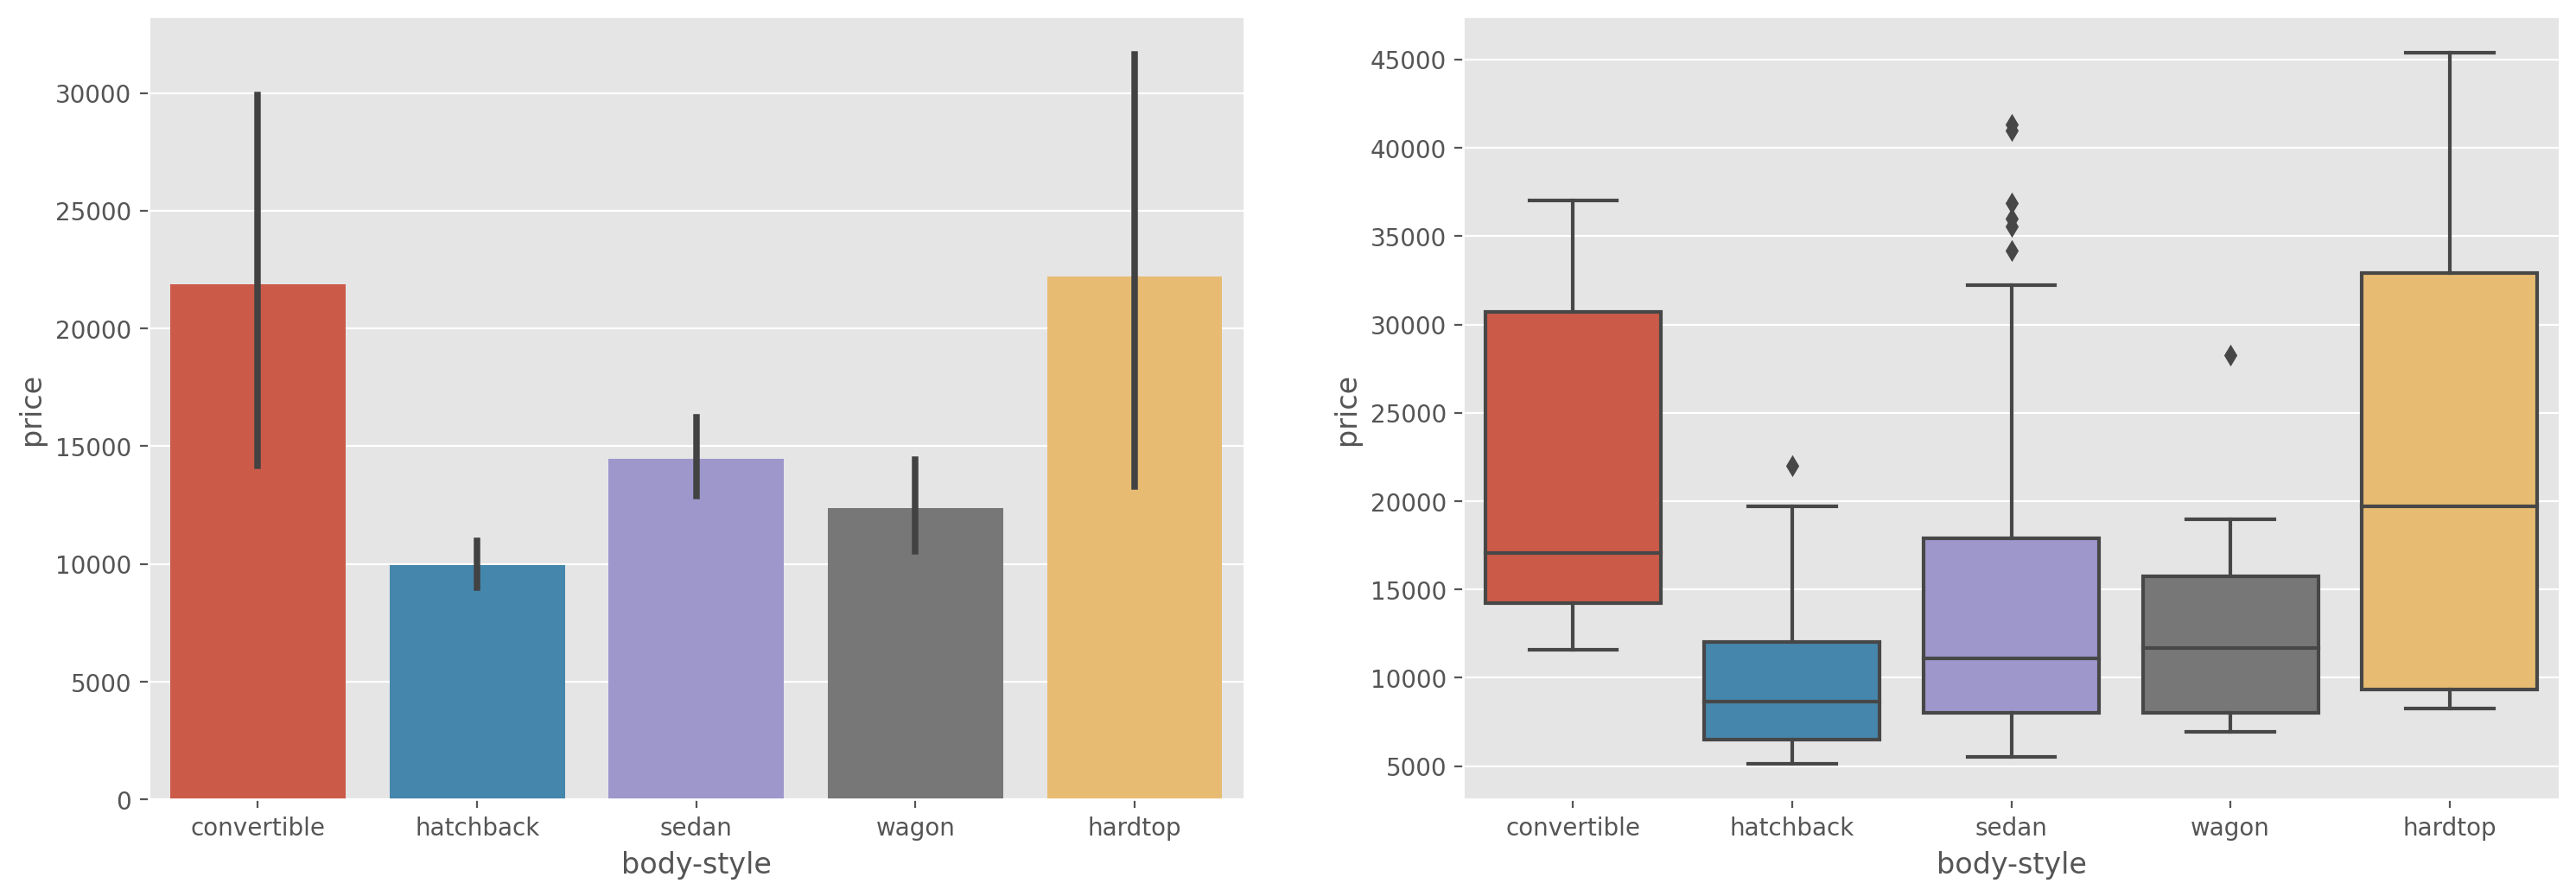

In [71]:
plt.figure(figsize = (18,6), dpi = 200)

plt.subplot(1,2,1)
sns.barplot(auto['body-style'], auto['price'])
plt.subplot(1,2,2)
sns.boxplot(auto['body-style'], auto['price'])

<AxesSubplot:xlabel='aspiration', ylabel='price'>

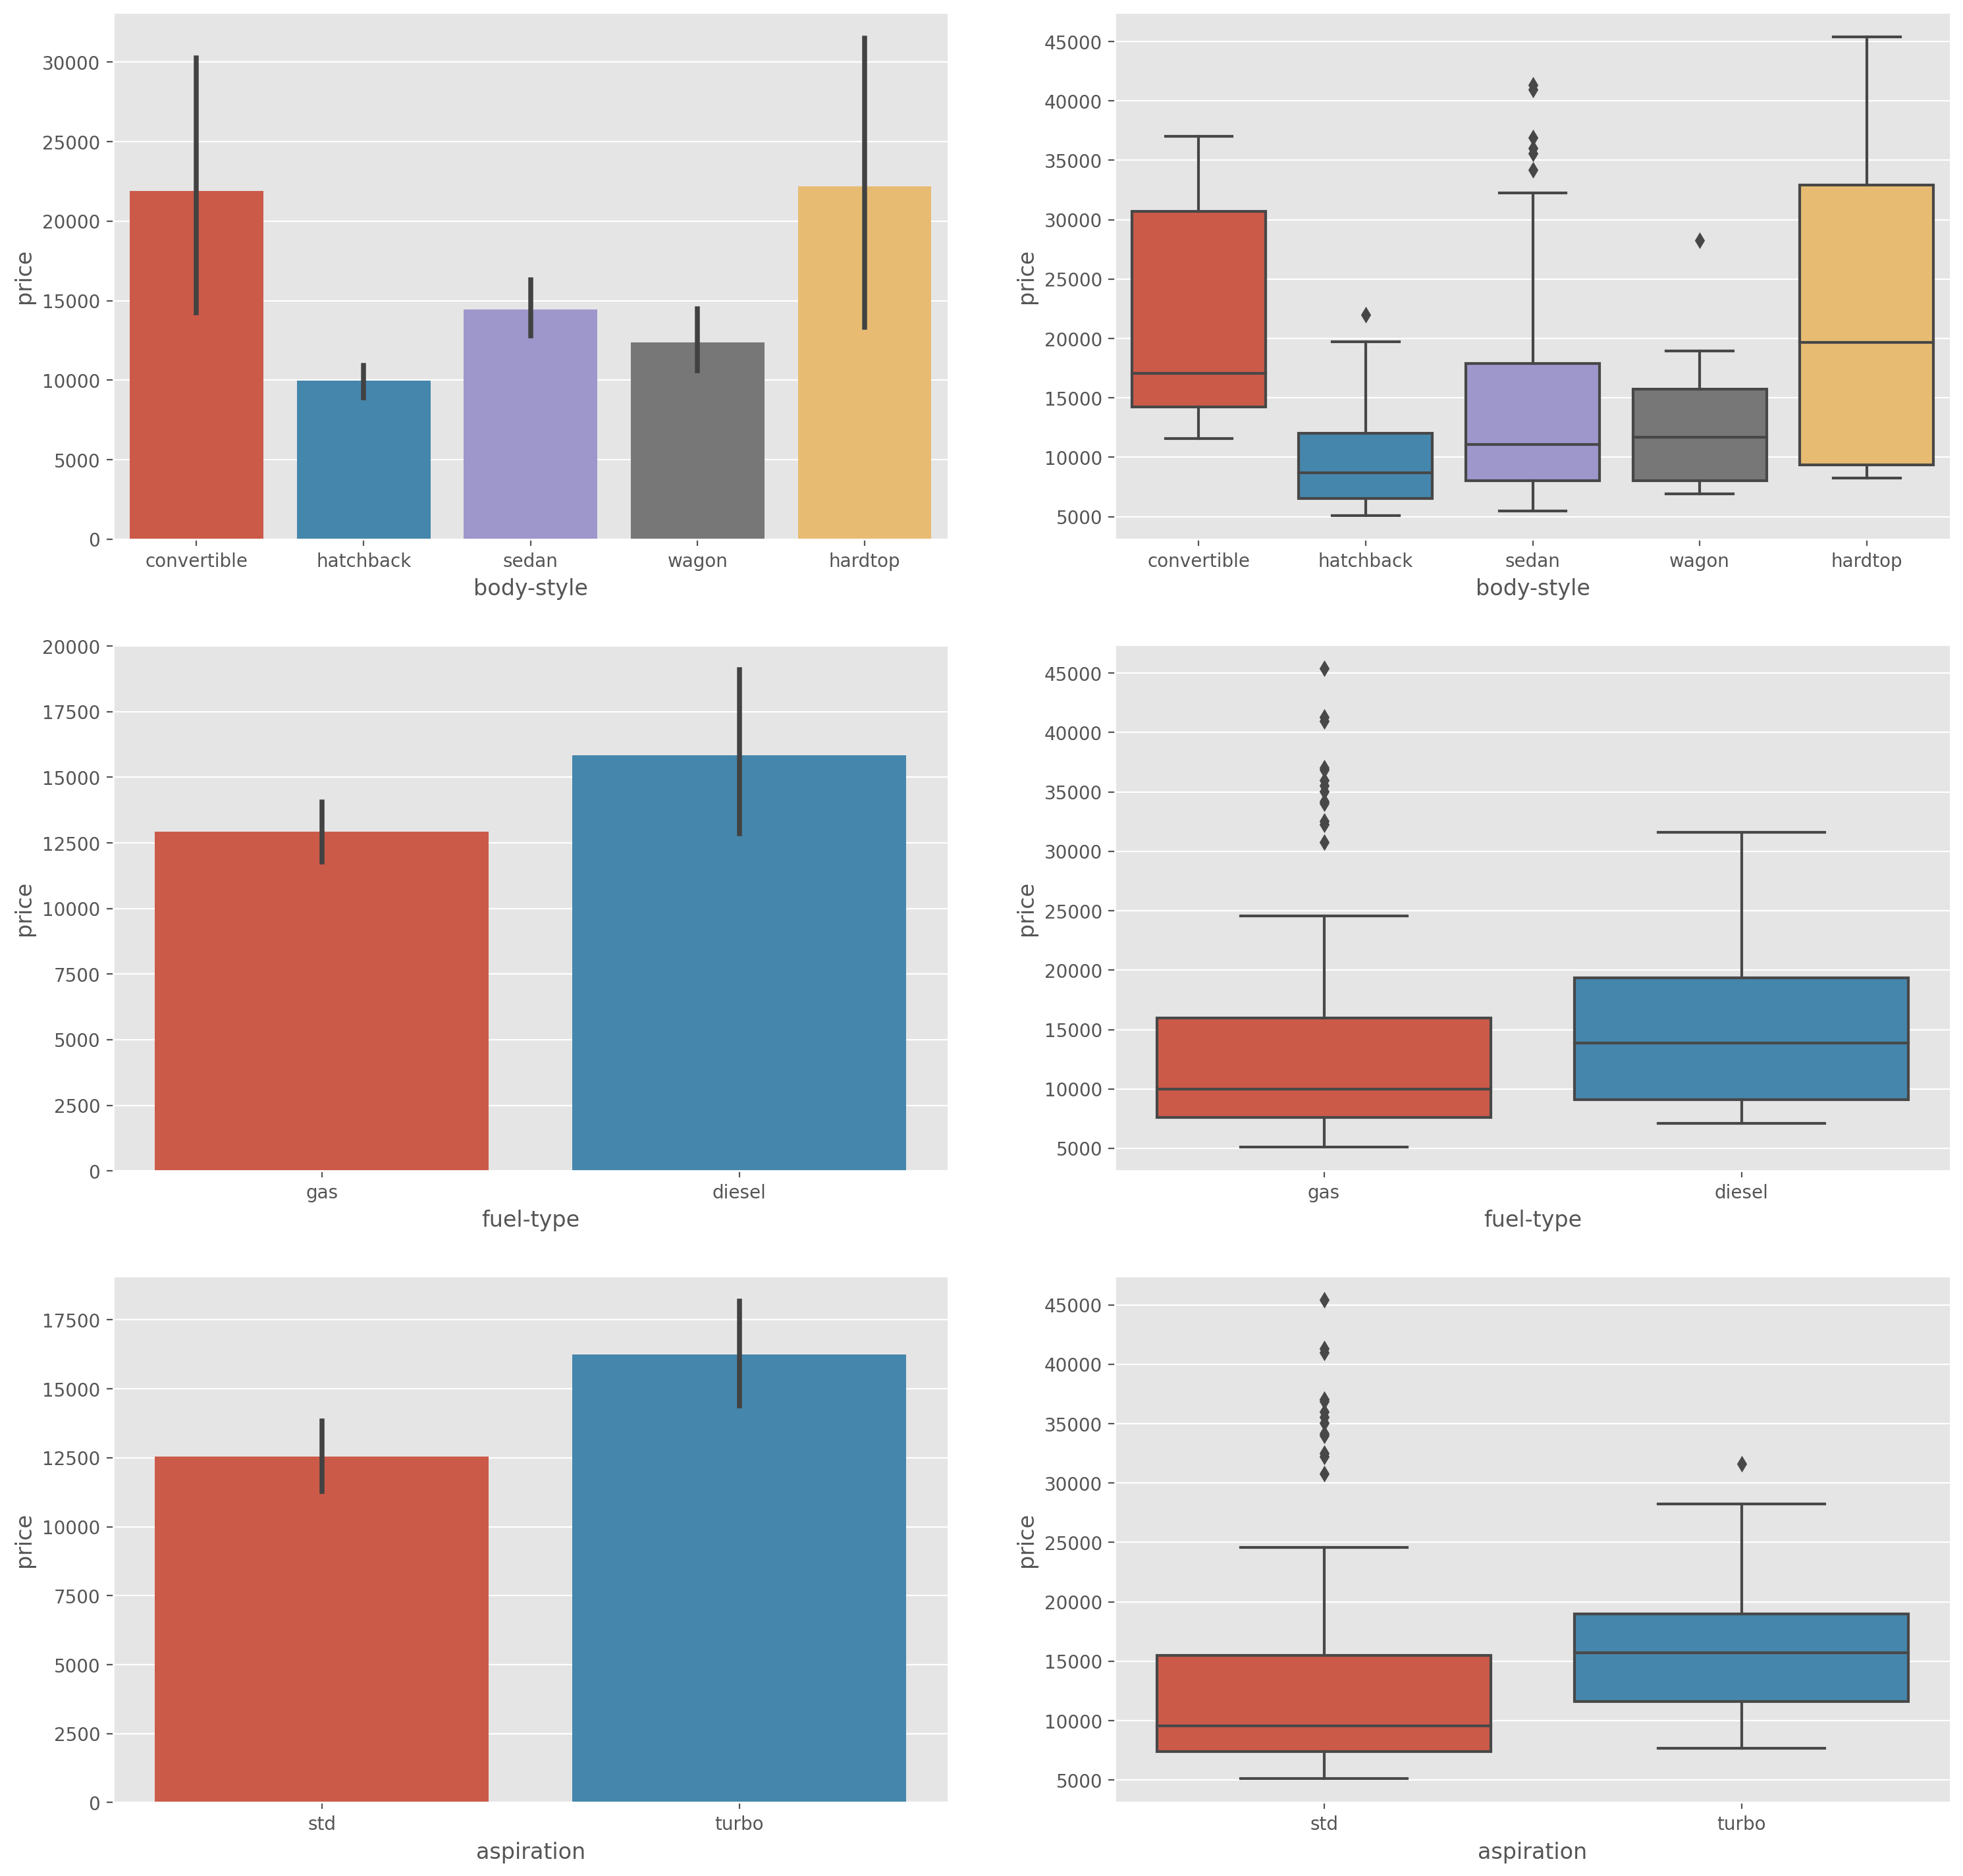

In [72]:
plt.figure(figsize = (18,18), dpi = 200)

plt.subplot(3,2,1)
sns.barplot(auto['body-style'], auto['price'])
plt.subplot(3,2,2)
sns.boxplot(auto['body-style'], auto['price'])

plt.subplot(3,2,3)
sns.barplot(auto['fuel-type'], auto['price'])
plt.subplot(3,2,4)
sns.boxplot(auto['fuel-type'], auto['price'])

plt.subplot(3,2,5)
sns.barplot(auto['aspiration'], auto['price'])
plt.subplot(3,2,6)
sns.boxplot(auto['aspiration'], auto['price'])

# ===============================================
# Visualizations Uses

- **Univariate : Single Feature**
    - Numerical : distplot, boxplot, violinplot
    - Categorical : countplot, piechart

- **Bivariate : Two Features**
    - Numerical - Numerical : lineplot, scatterplot
    - Numerical - Categorical : barplot, boxplot, violinplot
    - Categorical - Categorical : Countplot with hue

<AxesSubplot:ylabel='price'>

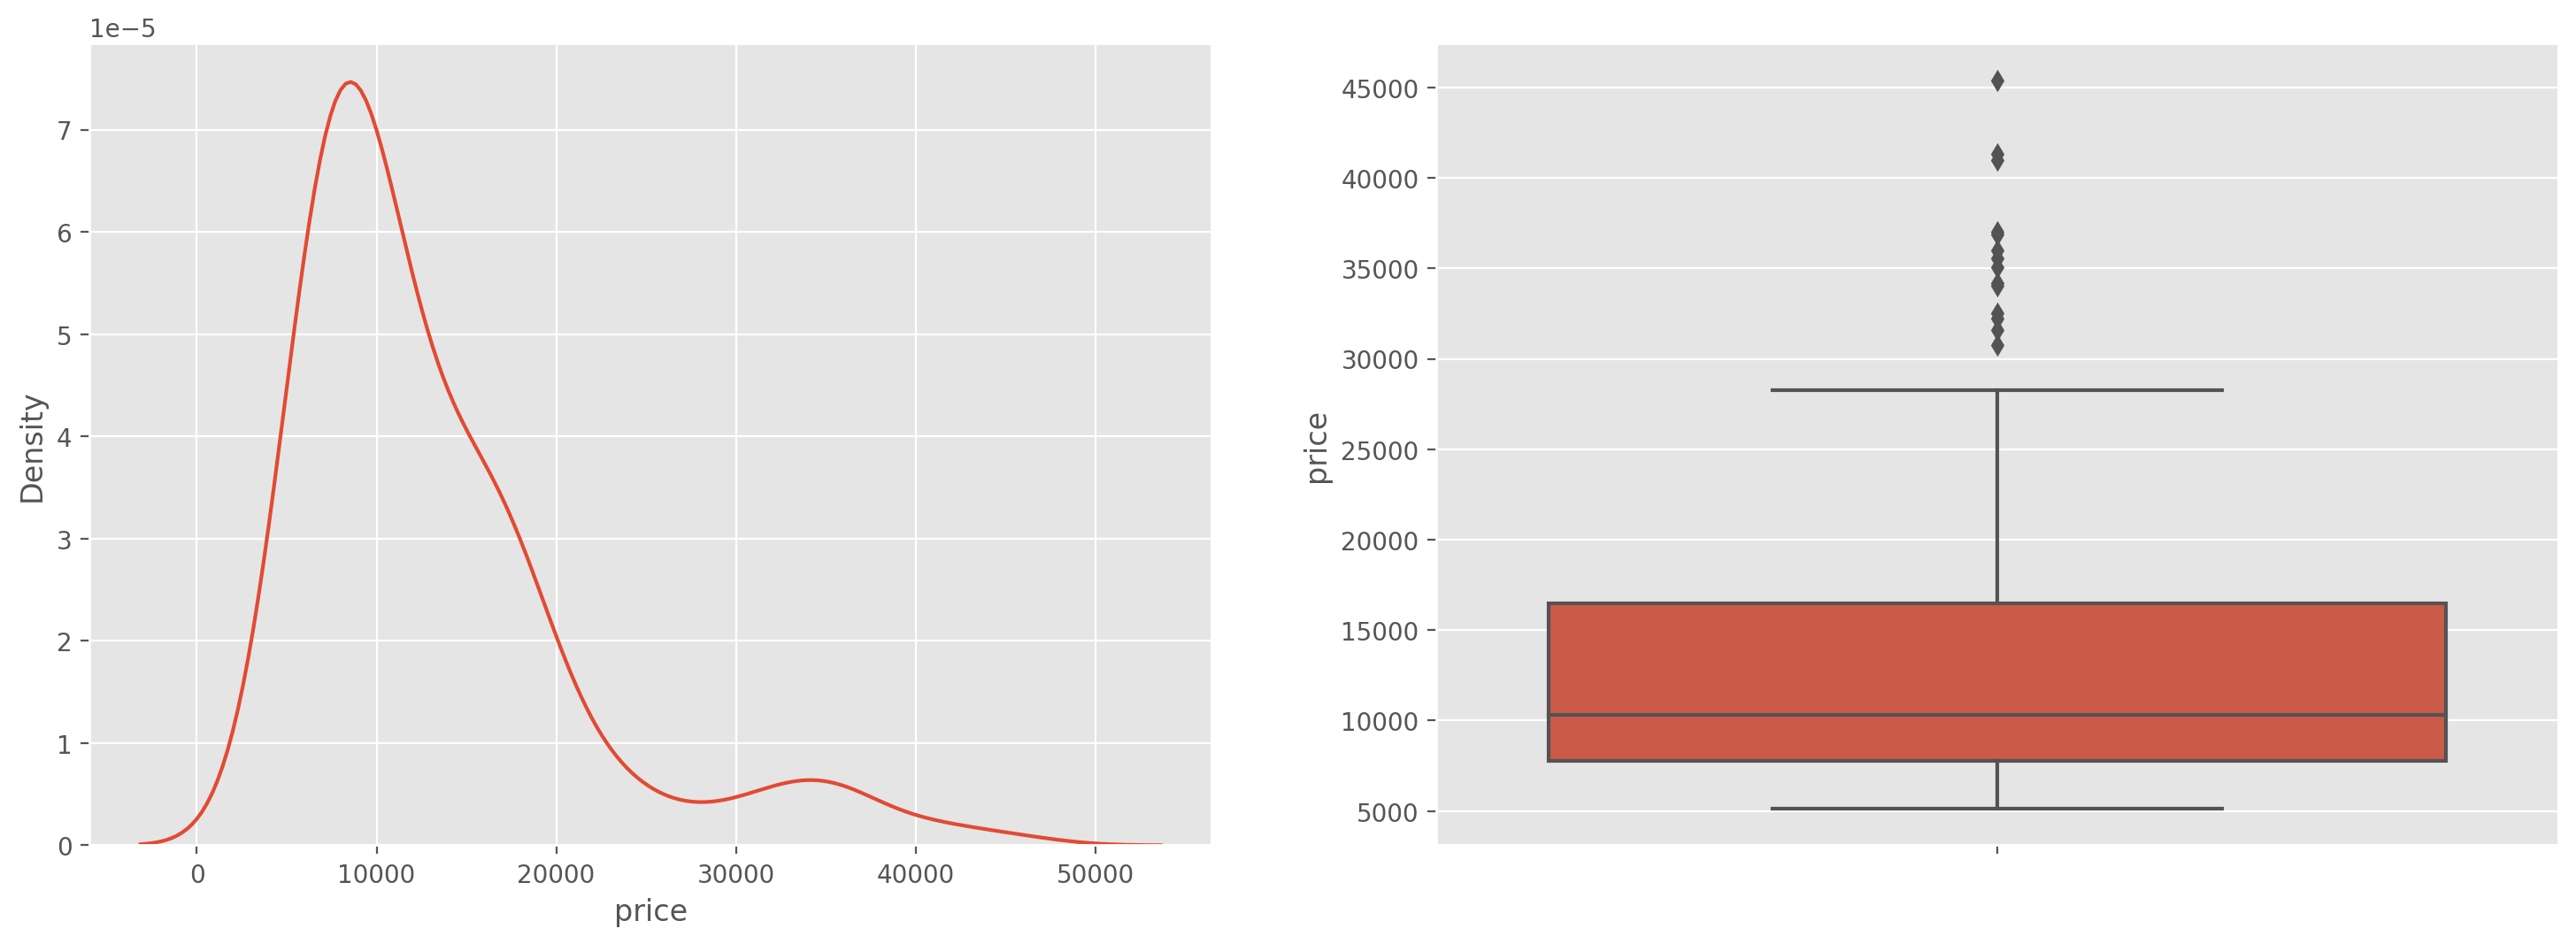

In [73]:
# Univariate : Numerical
plt.figure(figsize = (18,6), dpi = 200)

plt.subplot(1,2,1)
sns.distplot(auto.price, hist = False)
plt.subplot(1,2,2)
sns.boxplot(y = auto.price)

<AxesSubplot:xlabel='body-style', ylabel='count'>

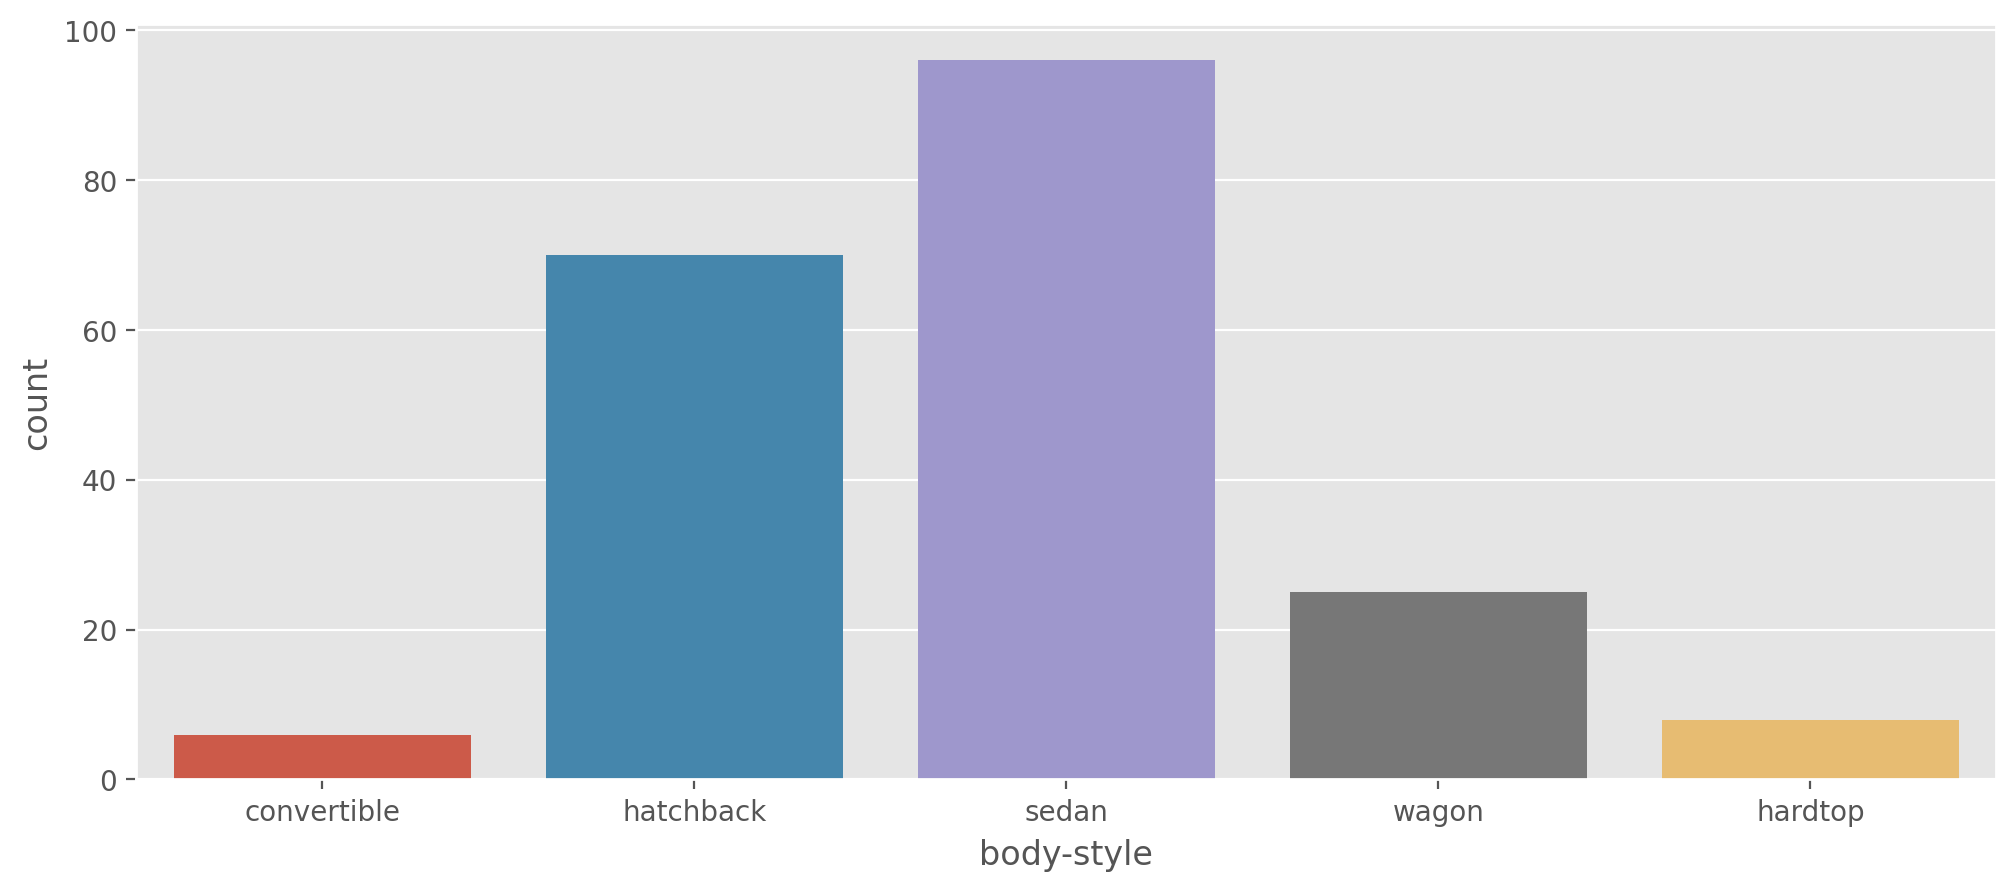

In [74]:
# Univariate : Categorical
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot('body-style', data = auto)

<AxesSubplot:xlabel='engine-size', ylabel='horsepower'>

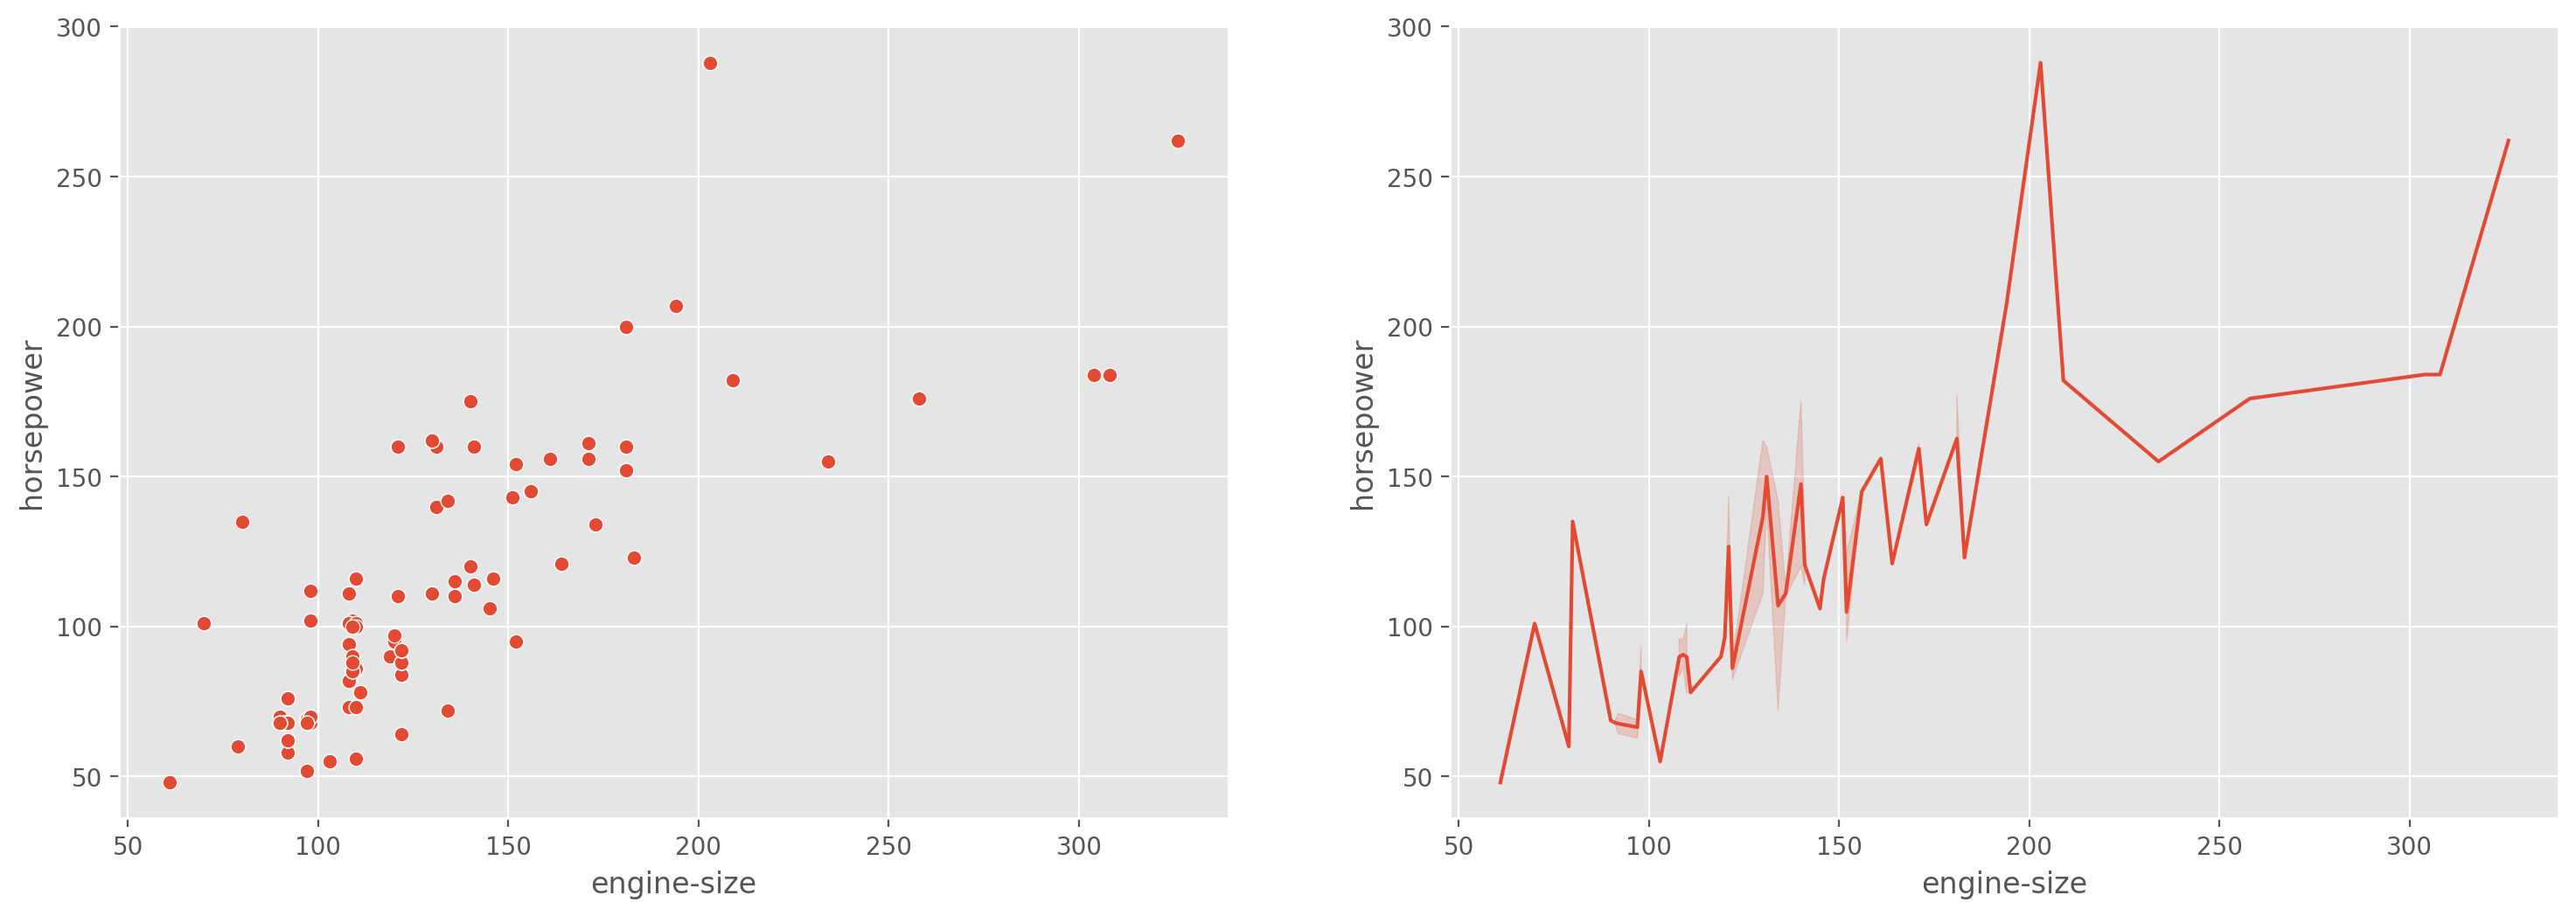

In [76]:
# Bivariate : Numerical- Numerical
plt.figure(figsize = (18,6), dpi = 200)
plt.subplot(1,2,1)
sns.scatterplot('engine-size', 'horsepower', data = auto)
plt.subplot(1,2,2)
sns.lineplot('engine-size', 'horsepower', data = auto)

<AxesSubplot:xlabel='body-style', ylabel='price'>

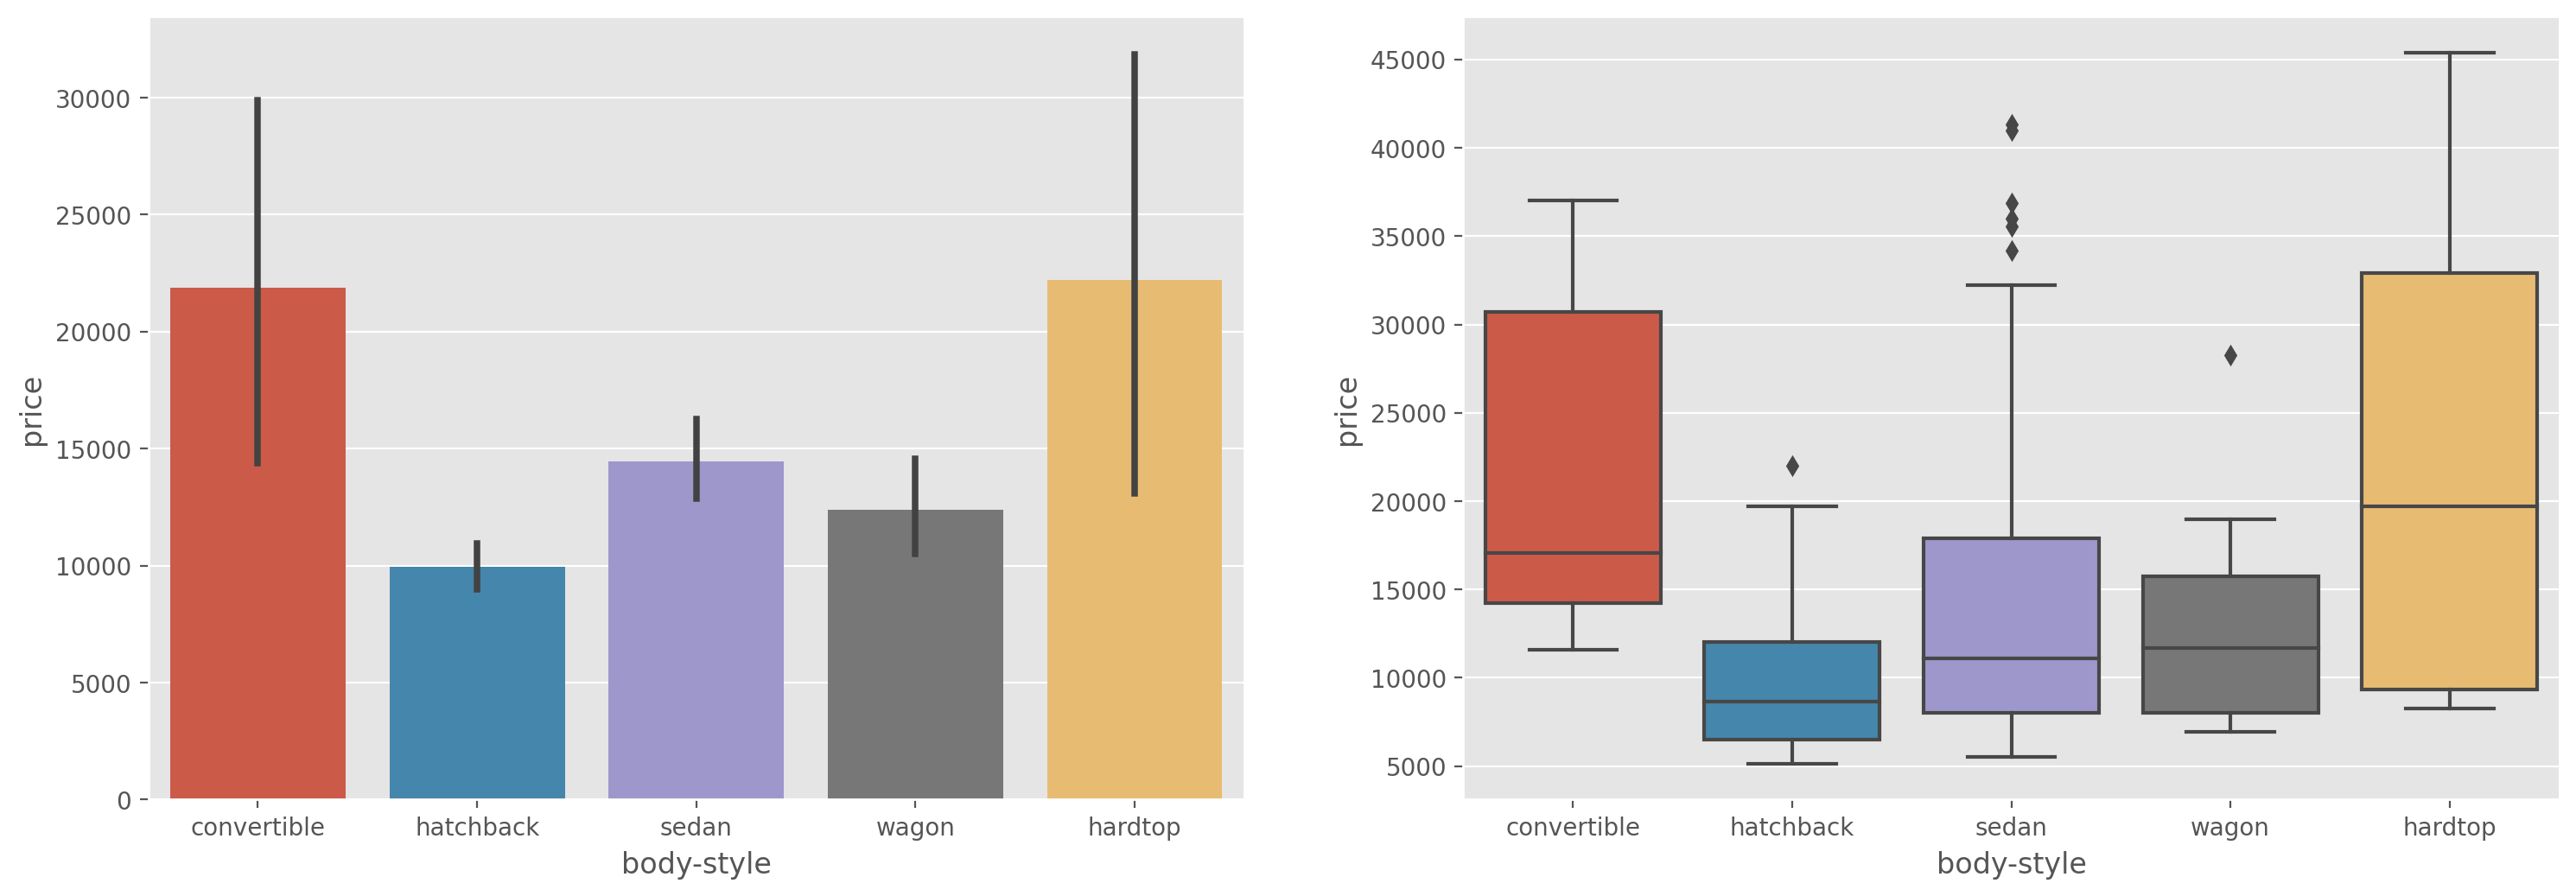

In [78]:
# Bivariate : Numerical- Categorical
plt.figure(figsize = (18,6), dpi = 200)
plt.subplot(1,2,1)
sns.barplot('body-style', 'price', data = auto)
plt.subplot(1,2,2)
sns.boxplot('body-style', 'price', data = auto)

<AxesSubplot:xlabel='fuel-type', ylabel='count'>

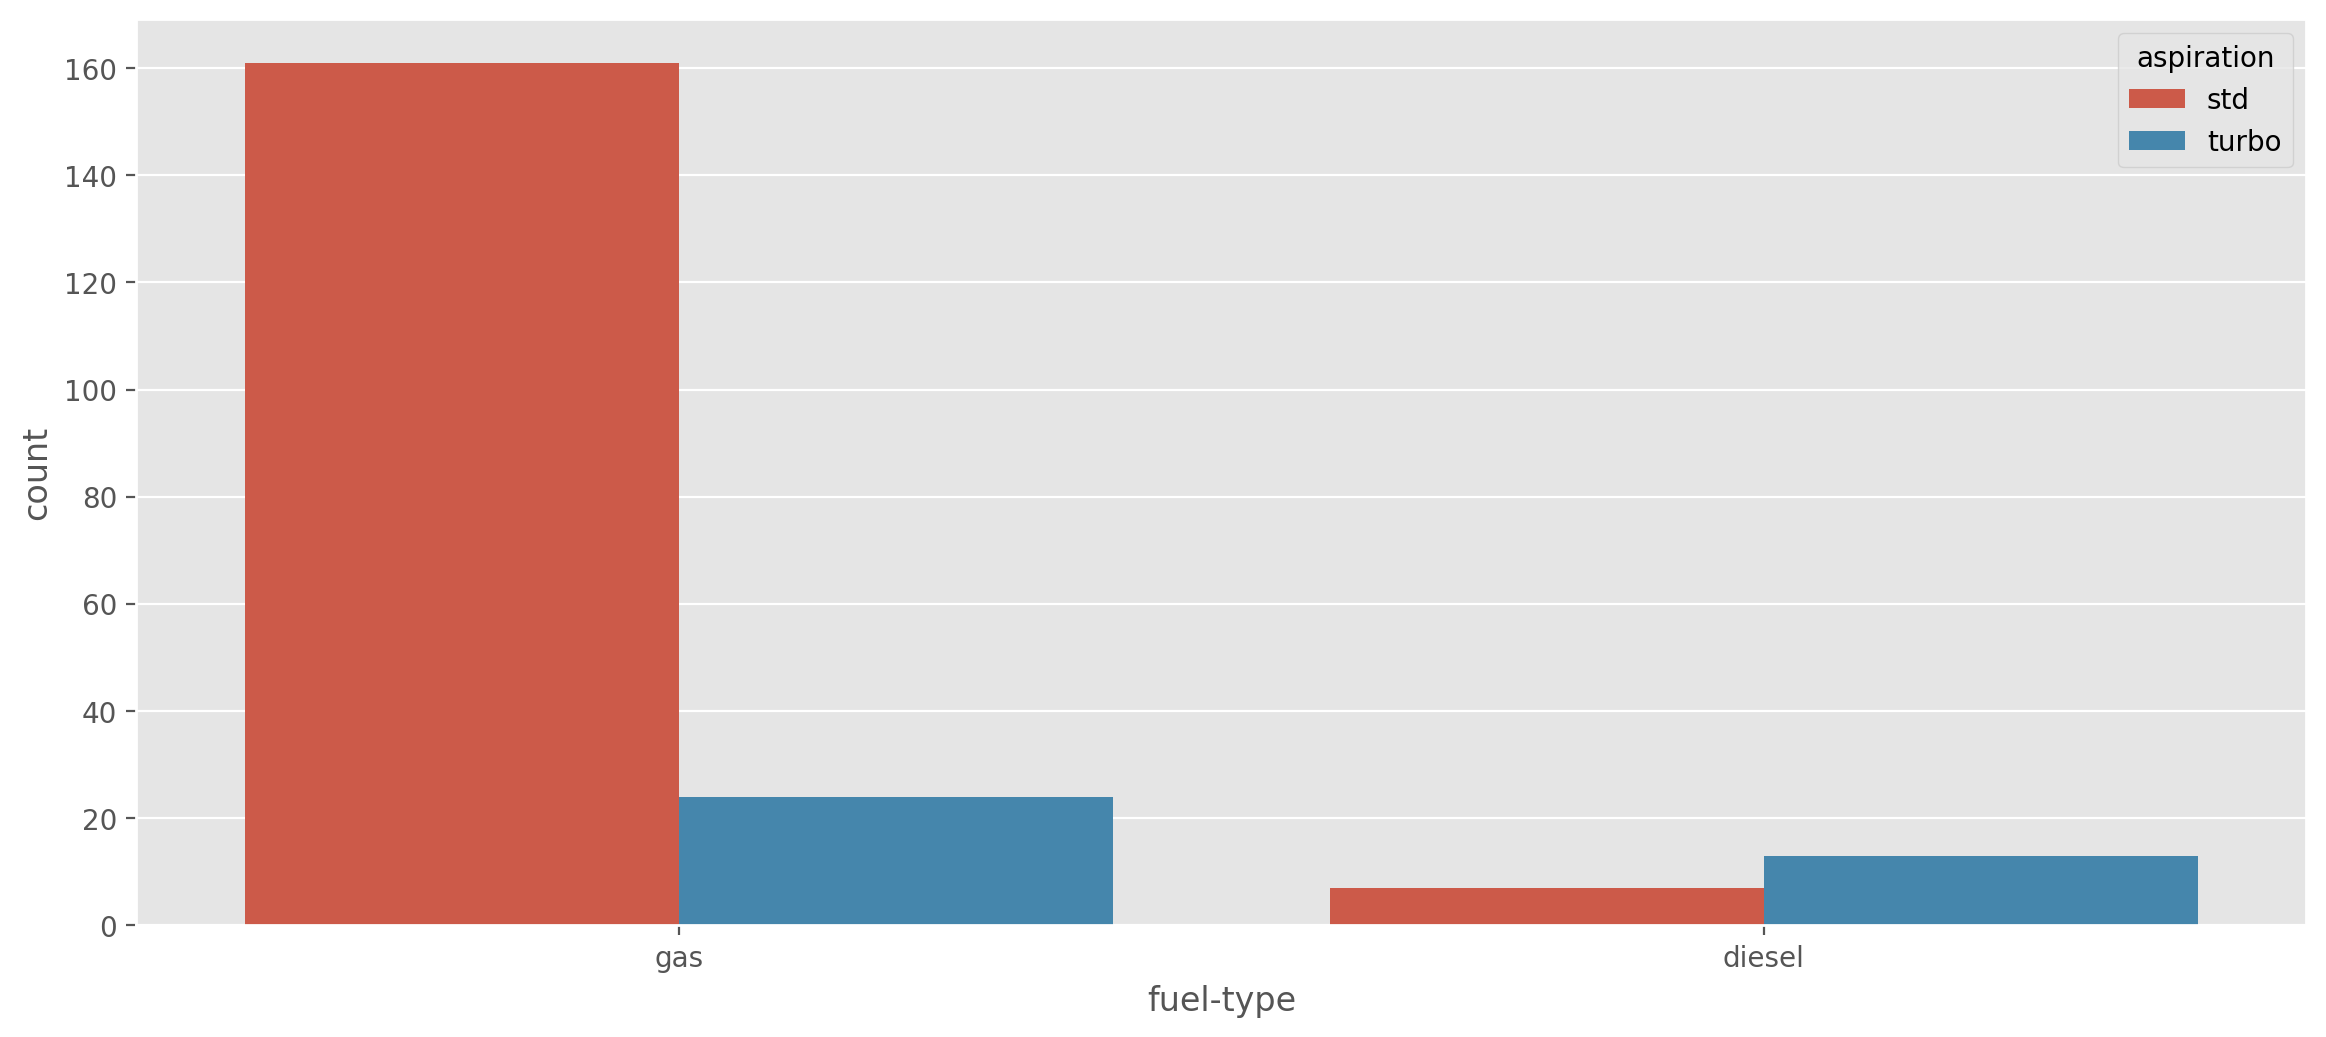

In [80]:
# Bivariate : Categorical- Categorical
plt.figure(figsize = (14,6), dpi = 200)
sns.countplot('fuel-type', hue = 'aspiration', data = auto)

# =======================================================
---
---
# Descriptive Statistics
- **Measures of central Tendency**
    - Mean
    - Median
    - Mode
<br>
<br>
- **Measures of dispersion**
    - Range
    - Standard Deviation
    - Variance
    - Quartiles
<br>
<br>
- **Outliers and Ourlier Detection**
    - Outliers
    - Effect of outliers
    - Boxplot
    - Z scores
<br>
<br>
- **Skewness**
<br>
<br>
- **Covariance and Correlation**
<br>
<br>
---
#### Visualizations
    - Lineplot
    - Scatterplot
    - Barplot
    - Boxplot
    - Violinplot
    - Distplot
    - Countplot
    - Histogram
    - Piechart
    - Heatmap